## **ANÁLISE DOS LOTES INSERIDOS NO SISZON NO PRIMEIRO QUADRIMESTRE DE 2021**

## SOBRE O PROJETO
As análises contidas neste notebook fazem parte do projeto desenvolvido pela a Divisão de Sistema de Informações sobre Zoneamento (SISZON - DEUSO). O dataset são dados reais, disponíveis no banco de dados do SISZON, contendo informações de lotes "brancos" (como chamamos os novos lotes disponiveis para atualização do zoneamento) do Primeiro Quadrimestre de 2021. O foco da análise será a relação dos novos lotes por Zona e Subpreefeitura do município de São Paulo.

## LÓGICA DE ANÁLISE
Para facilitar o entendimento da análise, este projeto foi desenvolvido por uma metodologia que envolve: modelação de dados/tabelas e mapas no Software Livre QGIS e os Gráficos no Colab código Python.

Na metodologia você encontra por escrito quais foram as conclusões tiradas através da exploração dos dados e data visualization. Neste notebook será encontrado o data visualization e nos códigos também há o maior número de comentários possíveis, facilitando o entendimento do raciocínio no desenvolvimento deste notebook.

**1. Importação de libs e dataset**

##IMPORTAÇÃO LIBS 

In [1]:
import pandas               as pd #importar a biblioteca pandas 
import seaborn              as sns

import matplotlib
import matplotlib.pyplot    as plt
import matplotlib.cm as cm
import numpy                as np

from datetime               import datetime
from sklearn.preprocessing  import OrdinalEncoder, StandardScaler
from sklearn.cluster        import KMeans
from IPython.display        import IFrame, Image


import warnings
warnings.filterwarnings('ignore')

##IMPORTAÇÃO DATASET

In [2]:
#ler dados em no formato csv direto do drive 
#dados = pd.read_csv("Nomedatabela.csv")



In [3]:
#colocar link do csv exportado do diretório do git entre aspas 
fonte = "https://raw.githubusercontent.com/siszon/PROJETO_BRANCOS_2021/main/LT_MDC_TPC_ED_ZN_TODOS_QUAD01_2021_R01.csv" 
 #ler dados em no formato csv
dados = pd.read_csv(fonte)  

dados.head() 

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
0,"RUA CON VICENTE MIGUEL MARINO, , SAO PAULO, SA...",20008077810000088,20,8,77810,0,88,SE,SCE,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5267546","-46,651648",0
1,"RUA CON VICENTE MIGUEL MARINO, , SAO PAULO, SA...",20008077810000089,20,8,77810,0,89,SE,SCE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5267546","-46,651648",0
2,"RUA MAEST CARDIM, 1153, SAO PAULO, SAO PAULO, ...",38013042447000209,38,13,42447,0,209,SE,BVI,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5711436","-46,6418921",0
3,"AV DA LIBERDADE, 1000, SAO PAULO, SAO PAULO, ...",33006118184000455,33,6,118184,0,455,SE,LIB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,561321","-46,639079",0
4,"RUA MARTINHO PRADO, 128, SAO PAULO, SAO PAULO,...",6020136140001095,6,20,136140,0,1095,SE,REP,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5508137","-46,6456471",0


In [4]:
#ordenar tabela com base em uma coluna, no caso foi pela sub 
dados = dados.sort_values("SGL_SUBP_E", ascending=True) 


**2. Exploração do dataset:**

O objetivo é entender o tamanho do dataset, identificar se há dados faltantes, selecionar apenas as colunas que serão, a princípio, necessárias para a análise. Sendo elas: Subprefeitura; Zoneamento; Macroárea; Situação do Lote;

##EXPLORAÇÃO DO DATASET 

In [5]:
#total de linhas e colunas 
dados.shape 

(2703, 70)

In [6]:
#todas as colunas da tabela importada
dados.columns.values

array(['GEOCODE', 'ID', 'COD_SET_ZO', 'COD_QDR_ZO', 'COD_LOG_ZO',
       'COD_CNDM_Z', 'COD_LOTE_Z', 'SGL_SUBP_E', 'SGL_DSTR_E',
       'COD_TSTD_Z', 'IND_VRFC_E', 'IND_EXCL_I', 'SGL_ZONA_0',
       'COD_PRMR_0', 'SGL_LNDR_0', 'COD_TIP_LE', 'COD_LEGC_0',
       'ANO_LEGC_0', 'IND_ADCA_C', 'SGL_ZONA_1', 'COD_PRMR_1',
       'SGL_LNDR_1', 'COD_TIP__1', 'COD_LEGC_1', 'ANO_LEGC_1',
       'SGL_ZONA_2', 'COD_PRMR_2', 'SGL_LNDR_2', 'COD_TIP__2',
       'COD_LEGC_2', 'ANO_LEGC_2', 'SGL_ZONA_3', 'COD_PRMR_3',
       'SGL_LNDR_3', 'COD_TIP__3', 'COD_LEGC_3', 'ANO_LEGC_3',
       'SGL_ZONA_4', 'COD_PRMR_4', 'SGL_LNDR_4', 'COD_TIP__4',
       'COD_LEGC_4', 'ANO_LEGC_4', 'SGL_ZONA_5', 'COD_PRMR_5',
       'SGL_LNDR_5', 'COD_TIP__5', 'COD_LEGC_5', 'ANO_LEGC_5',
       'COD_AREA_C', 'COD_AREA_L', 'COD_END_LO', 'COD_NUM_PO', 'COD_SIT',
       'VALOR_MET_', 'VALOR_ME_1', 'NUM_PAV', 'SGL_ZON_UR', 'ANO_CONST',
       'IND_EXCL_O', 'TXT_OBS_01', 'NOME_CID_E', 'NOME_EST_E',
       'NOME_PAIS_', 'REG_LIM_A

In [7]:
# Verificando o tipo de dado
dados.dtypes

GEOCODE       object
ID             int64
COD_SET_ZO     int64
COD_QDR_ZO     int64
COD_LOG_ZO     int64
               ...  
COD_QUAD       int64
COD_ANO        int64
Lat_Y_        object
Long_X_       object
COND           int64
Length: 70, dtype: object

In [8]:
# Verificando valores nulos
dados.isna().sum()

GEOCODE        0
ID             0
COD_SET_ZO     0
COD_QDR_ZO     0
COD_LOG_ZO     0
              ..
COD_QUAD       0
COD_ANO        0
Lat_Y_        30
Long_X_       30
COND           0
Length: 70, dtype: int64

In [9]:
#estrutura de uma série do bandas, coluna da esquerda é o index do arquivo 
dados["SGL_ZONA_0"]

1019      ZM
1000      ZM
1094      ZM
1095      ZM
967      ZMA
        ... 
402       ZC
866       ZM
282     ZEUP
872       ZM
748       ZC
Name: SGL_ZONA_0, Length: 2703, dtype: object

In [10]:
#para puxar a lista é necessário colocar dois colchetes 
dados[["SGL_ZONA_0", "SGL_SUBP_E"]] 

,SGL_ZONA_0,SGL_SUBP_E
1019,ZM,AD
1000,ZM,AD
1094,ZM,AD
1095,ZM,AD
967,ZMA,AD
...,...,...
402,ZC,VP
866,ZM,VP
282,ZEUP,VP
872,ZM,VP


In [11]:
dados["SGL_SUBP_E"]

1019    AD
1000    AD
1094    AD
1095    AD
967     AD
        ..
402     VP
866     VP
282     VP
872     VP
748     ZC
Name: SGL_SUBP_E, Length: 2703, dtype: object

In [12]:
#unique para pesquisar quais subs eu tenho dentro da minha tabela 
dados["SGL_SUBP_E"].unique() 

array(['AD', 'AR', 'BP', 'BT', 'CL', 'CT', 'CV', 'EM', 'FO', 'GU', 'IP',
       'IQ', 'IT', 'JA', 'JT', 'LA', 'MB', 'MG', 'MO', 'MP', 'PA', 'PE',
       'PI', 'PJ', 'PR', 'SA', 'SB', 'SE', 'SM', 'SO', 'ST', 'VM', 'VP',
       'ZC'], dtype=object)

In [13]:
dados.query("SGL_SUBP_E == 'ZC'")["SGL_SUBP_E"]

748    ZC
Name: SGL_SUBP_E, dtype: object

In [14]:
#Selecionar linha especifica atravez do index 
dados.loc[[748]]

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
748,"RUA DOIS DE JANEIRO, 131, SAO PAULO, SAO PAULO...",59227059714000108,59,227,59714,0,108,ZC,PEN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,520723","-46,5273683",0


In [15]:
#alterando a informação errada de uma campo do dataframe
dados['SGL_SUBP_E'].replace('ZC', 'PE', inplace=True) #o inplace altera oficialmente, sem ele você só visualiza 

In [16]:
dados.loc[[748]]

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
748,"RUA DOIS DE JANEIRO, 131, SAO PAULO, SAO PAULO...",59227059714000108,59,227,59714,0,108,PE,PEN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,520723","-46,5273683",0


In [17]:
dados["SGL_SUBP_E"].unique() 

array(['AD', 'AR', 'BP', 'BT', 'CL', 'CT', 'CV', 'EM', 'FO', 'GU', 'IP',
       'IQ', 'IT', 'JA', 'JT', 'LA', 'MB', 'MG', 'MO', 'MP', 'PA', 'PE',
       'PI', 'PJ', 'PR', 'SA', 'SB', 'SE', 'SM', 'SO', 'ST', 'VM', 'VP'],
      dtype=object)

In [18]:
dados.query("SGL_SUBP_E == 'BP'")["SGL_SUBP_E"]
dados['SGL_SUBP_E'].replace('BP', 'VP', inplace=True)

In [19]:
#quantidade de subs que eu tenho dentro da tabela 
len(dados["SGL_SUBP_E"].unique()) 

32

#criar mapa 
import folium
from folium import plugins
import branca
import branca.colormap as cm

m = folium.Map(location=[-23.60, -46.66], 
                 tiles='Stamen Toner', zoom_start=12)

colormap = cm.LinearColormap(colors=['darkblue', 'blue', 'cyan', 'yellow', 'orange', 'red'])

for i, imovel in dados.iterrows():
  folium.CircleMarker(
    location=[dados.Lat_Y_, dados.Long_X_],
    color=colormap(imovel.dados),
    fill=True,
    fill_color=colormap(imovel.dados),
).add_to(m)

colormap.add_to(m)

m

In [20]:
#criando lista de coordenadas 
coordenadas= []
for lat, lng in zip(dados.Lat_Y_,dados.Long_X_):
  coordenadas.append((lat, lng))

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 1019 to 748
Data columns (total 70 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GEOCODE     2703 non-null   object 
 1   ID          2703 non-null   int64  
 2   COD_SET_ZO  2703 non-null   int64  
 3   COD_QDR_ZO  2703 non-null   int64  
 4   COD_LOG_ZO  2703 non-null   int64  
 5   COD_CNDM_Z  2703 non-null   int64  
 6   COD_LOTE_Z  2703 non-null   int64  
 7   SGL_SUBP_E  2703 non-null   object 
 8   SGL_DSTR_E  2702 non-null   object 
 9   COD_TSTD_Z  2697 non-null   object 
 10  IND_VRFC_E  2703 non-null   object 
 11  IND_EXCL_I  2618 non-null   object 
 12  SGL_ZONA_0  2703 non-null   object 
 13  COD_PRMR_0  2703 non-null   int64  
 14  SGL_LNDR_0  0 non-null      float64
 15  COD_TIP_LE  2531 non-null   object 
 16  COD_LEGC_0  2703 non-null   int64  
 17  ANO_LEGC_0  2703 non-null   int64  
 18  IND_ADCA_C  2703 non-null   object 
 19  SGL_ZONA_1  2702 non-null

In [22]:
#mapa = folium.Map(location=[-23.60, -46.66], 
                 #tiles='Stamen Toner', zoom_start=12)

In [23]:
#mapa.add_child(plugins.HeatMap(coordenadas))

In [24]:
dados["SGL_SUBP_E"].value_counts()

CT    791
IQ    151
PE    142
JT    134
ST    125
SM    116
IT    103
PJ    102
BT    100
MO     81
MG     69
CL     67
VP     67
AR     59
CV     58
EM     57
SA     55
AD     52
PI     51
MP     48
IP     46
SE     35
VM     32
LA     28
MB     28
SO     25
SB     24
JA     18
GU     18
FO     16
PR      4
PA      1
Name: SGL_SUBP_E, dtype: int64

In [25]:
#ordenar de acordo com o index 
dados["SGL_SUBP_E"].value_counts().sort_index() 

AD     52
AR     59
BT    100
CL     67
CT    791
CV     58
EM     57
FO     16
GU     18
IP     46
IQ    151
IT    103
JA     18
JT    134
LA     28
MB     28
MG     69
MO     81
MP     48
PA      1
PE    142
PI     51
PJ    102
PR      4
SA     55
SB     24
SE     35
SM    116
SO     25
ST    125
VM     32
VP     67
Name: SGL_SUBP_E, dtype: int64

In [26]:
dados["SGL_ZONA_0"].value_counts() #quantidades que a zona aparece na tabela 

99         897
ZM         739
ZEIS-1     296
ZC         197
ZEU        170
ZMA        111
ZEUP        69
ZPI-1       34
ZEIS-5      33
ZEIS-3      28
ZERA        21
ZEM          9
ZER 1        9
ZPI-2        8
ZER-1        8
ZCA          8
ZEIS-2       8
ZDE-2        8
ZER-2        6
ZCOR-2       6
ZEMP         5
ZPDS         5
ZDE-1        5
ZEPAM        4
ZMa          3
ZEP          2
ZC-ZEIS      2
ZCa          2
ZPR          2
ZCOR-1       2
ZCOR-3       2
ZMIS         1
ZEUA         1
AC-1         1
ZEUPA        1
Name: SGL_ZONA_0, dtype: int64

In [27]:
dados["SGL_ZONA_1"].value_counts()

QA        2671
ZEPAM        7
ZEIS-5       6
ZEPEC        4
ZM           3
ZPDS         3
ZEIS-1       3
ZMA          2
ZEIS-3       2
ZCOR-3       1
Name: SGL_ZONA_1, dtype: int64

In [28]:
dados["COD_SIT"].value_counts()

D    2184
R     254
Name: COD_SIT, dtype: int64

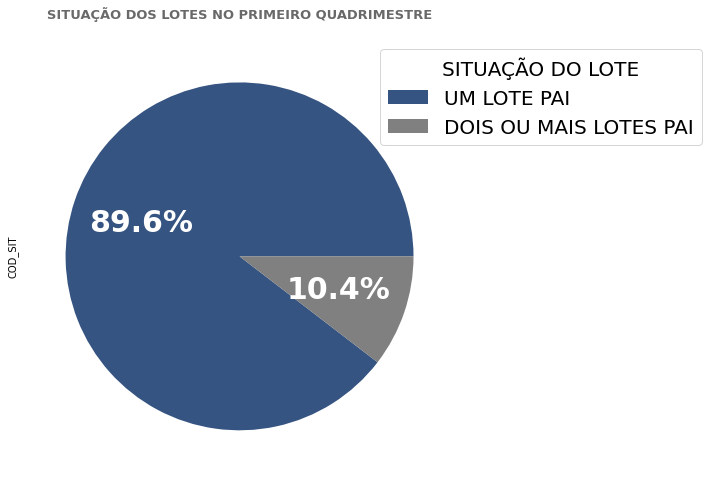

In [29]:
dados["COD_SIT"].value_counts().plot.pie(figsize=(10,8),autopct='%1.1f%%', colors = ['#365481', 'grey'], textprops=dict(color="w",fontweight = 'bold', fontsize = 30 ))
s3 = plt.title('SITUAÇÃO DOS LOTES NO PRIMEIRO QUADRIMESTRE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
s3 = sns.despine(bottom = True, left=True)
s3 = plt.legend(title= "SITUAÇÃO DO LOTE",  title_fontsize = 20, loc=2, labels=['UM LOTE PAI','DOIS OU MAIS LOTES PAI'], bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize = 20)

## ANÁLISE DE DADOS 

**3. Análise da qualidade dos dados:**

Primeira análise para entender melhor o dataset e os dados gerais que serão trabalhados por Quarimestre. A familiaridade com o dataset auxiliará na formação de hipóteses no próximo passo, este com as análises focadas nas Subprefeituras.

**3.1 Total de Lotes por Subprefeitura no Primeiro Quadrimestre de 2021.**

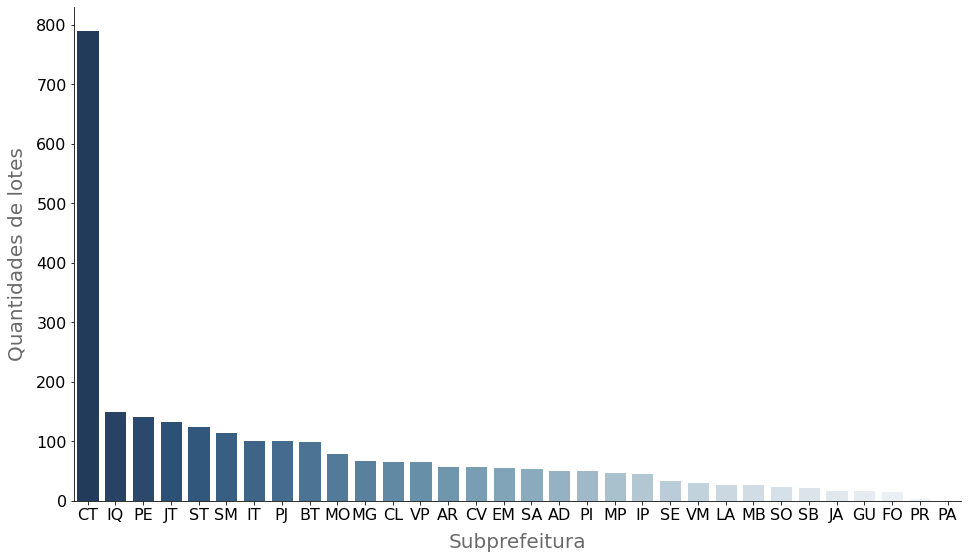

In [30]:
plt.figure(figsize=(35, 20))
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
tq1 = plt.subplot(2, 2, 3)
tq1 = sns.set_theme(style="darkgrid")
tq1 = sns.countplot(x = 'SGL_SUBP_E', data = dados, order=dados['SGL_SUBP_E'].value_counts().index, orient='h',
                    palette = 'Blues_r',  saturation=0.5, dodge = False) # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
tq1 = sns.despine(bottom = False, left=False)
tq1 = plt.xlabel('Subprefeitura', color = 'dimgrey', labelpad = 10, fontsize = 20)
tq1 = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 20)

**3.1.1 Total de Zonas no Primeiro Quadrimestre de 2021**

In [31]:
dados = dados.sort_values("SGL_ZONA_0", ascending=True)  #ordenar tabela com base em uma coluna, no caso foi pela zona 


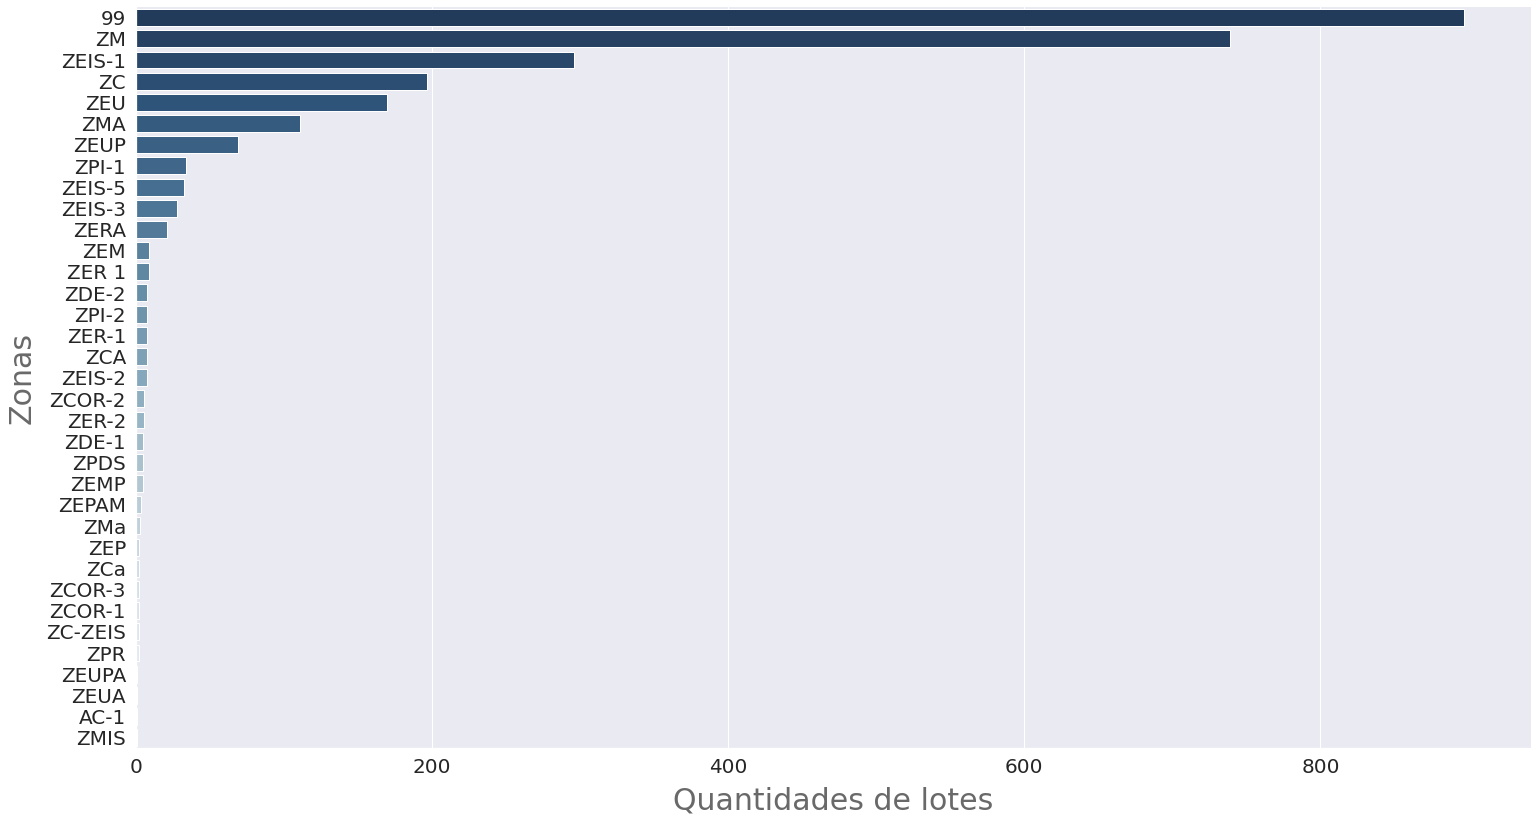

In [32]:
plt.figure(figsize=(55, 30))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
tz = plt.subplot(2, 2, 4)
tz = sns.set_theme(style="darkgrid")
tz = sns.countplot(y = 'SGL_ZONA_0', data = dados, order=dados['SGL_ZONA_0'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
tz = sns.despine(bottom = False, left=False)
tz = plt.xlabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 30)
tz = plt.ylabel('Zonas', color = 'dimgrey', labelpad = 10, fontsize = 30)


**3.1.2 Lotes com observações**

In [33]:
dados["TXT_OBS_01"].unique() 

array([nan, 'ZEPEC-AUE.', 'RESOLUCAO SMUL.AOC.CTLU/004/2018.',
       'RESOLUCAO SMDU.AOC.CTLU/004/2018.', 'ZEPEC-BIR.',
       'LOTE NAO ENCONTRADO.'], dtype=object)

In [34]:
#ajustar erro de escrita nas observações 
dados.query("TXT_OBS_01 == 'RESOLUCAO SMUL.AOC.CTLU/004/2018.'")["TXT_OBS_01"]
dados['TXT_OBS_01'].replace('RESOLUCAO SMUL.AOC.CTLU/004/2018.', 'RESOLUCAO SMDU.AOC.CTLU/004/2018.', inplace=True)

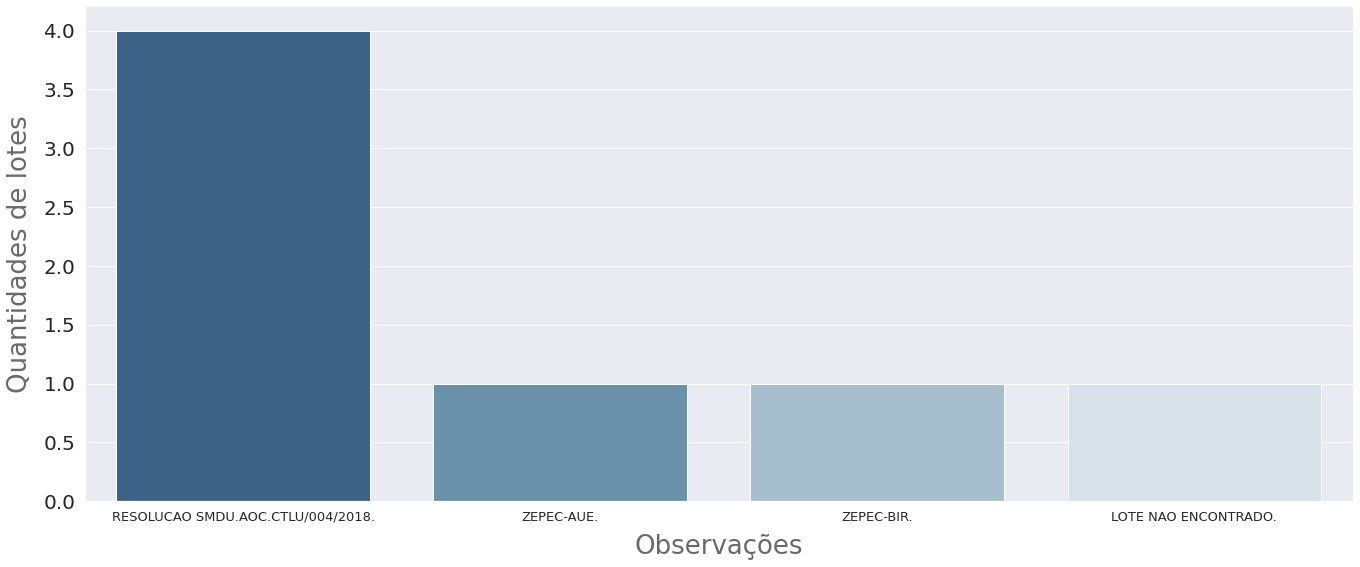

In [35]:
plt.figure(figsize=(50, 20))
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 20
lobs = plt.subplot(2, 2, 3)
lobs = sns.set_theme(style="whitegrid")
lobs = sns.countplot(x = 'TXT_OBS_01', data = dados, order=dados['TXT_OBS_01'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
lobs = sns.despine(bottom = False, left=False)
lobs = plt.xlabel('Observações', color = 'dimgrey', labelpad = 10, fontsize = 26)
lobs = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 26)

In [36]:
dados["SGL_ZONA_1"]

1825        QA
1860        QA
1859        QA
1858        QA
1857        QA
         ...  
833         QA
923         QA
924     ZEIS-1
917         QA
2603        QA
Name: SGL_ZONA_1, Length: 2703, dtype: object

In [37]:
dados.query("SGL_ZONA_1 != 'QA'")["SGL_ZONA_1"] #selecionar uma informação da coluna 1= diferente de 

1671    ZEIS-3
1670    ZEIS-3
192         ZM
1669    ZEIS-1
596        ZMA
1568       ZMA
2605        ZM
2594        ZM
487     ZEIS-1
1373      ZPDS
1371      ZPDS
1372      ZPDS
578      ZEPEC
15      ZCOR-3
292      ZEPEC
562      ZEPEC
448      ZEPEC
1124    ZEIS-5
1126    ZEIS-5
1107    ZEIS-5
1112    ZEIS-5
1116    ZEIS-5
1098    ZEIS-5
12         NaN
411      ZEPAM
388      ZEPAM
340      ZEPAM
370      ZEPAM
590      ZEPAM
78       ZEPAM
586      ZEPAM
924     ZEIS-1
Name: SGL_ZONA_1, dtype: object

In [38]:
Duas_Zonas = dados.query("SGL_ZONA_1 != 'QA'")["SGL_ZONA_1"]

In [39]:
Duas_Zonas = dados.query("SGL_ZONA_1 != 'QA'")

In [40]:
len(Duas_Zonas)

32

**3.1.2 Lotes com mais de uma Zona no Primeiro Quadrimestre de 2020**

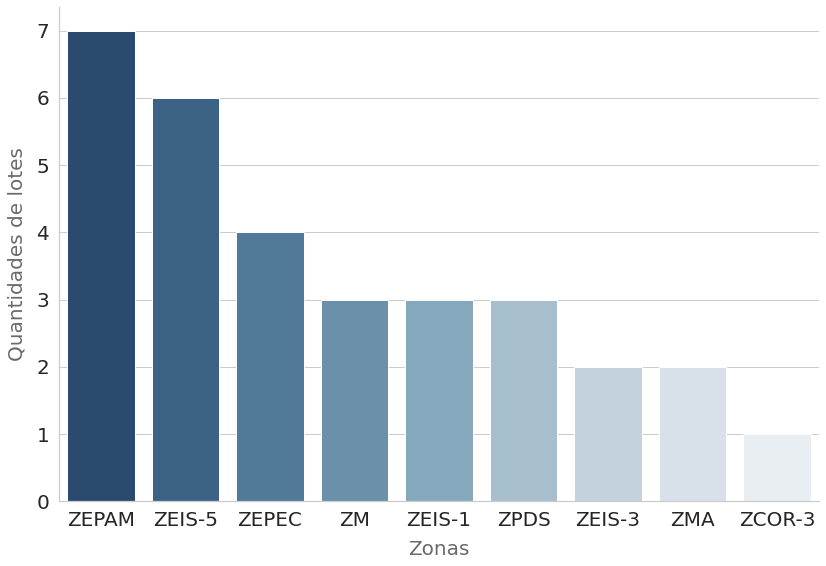

In [41]:
plt.figure(figsize=(30, 20))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
z2 = plt.subplot(2, 2, 3)
z2 = sns.set_theme(style="whitegrid")
z2 = sns.countplot(x = 'SGL_ZONA_1', data = Duas_Zonas, order= Duas_Zonas['SGL_ZONA_1'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
z2 = sns.despine(bottom = False, left=False)
z2 = plt.xlabel('Zonas', color = 'dimgrey', labelpad = 10, fontsize = 20)
z2 = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 20)

In [42]:
dados.query("SGL_ZONA_1 == 'QA'")["SGL_ZONA_1"]. value_counts()

QA    2671
Name: SGL_ZONA_1, dtype: int64

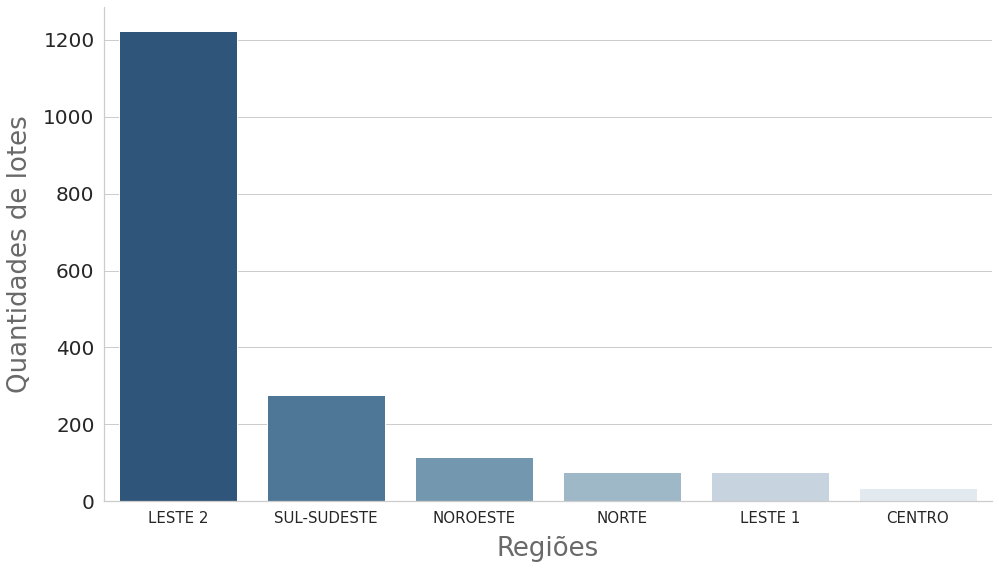

In [43]:
plt.figure(figsize=(35, 20))
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 20
s3 = plt.subplot(2, 2, 3)
s3 = sns.set_theme(style="whitegrid")
s3 = sns.countplot(x = 'REG_LIM_AD', data = dados, order= dados['REG_LIM_AD'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
s3 = sns.despine(bottom = False, left=False)
s3 = plt.xlabel('Regiões', color = 'dimgrey', labelpad = 10, fontsize = 26)
s3 = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 26)

##LOTES POR SUBPREFEITURA 


**4. Análise realisada por Subprefeitura, contendo a quantidade de Lotes "Brancos" que foram atualizados, em quais Zonas de Uso este lote está inserido. **

##CENTRO

##LOTE DA SUBPREFEITURA DA SÉ - SE

In [44]:
dados.query("SGL_SUBP_E == 'SE'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEU       9
ZC        8
ZEIS-3    7
ZEM       4
ZDE-1     2
ZEIS-5    2
ZM        2
99        1
Name: SGL_ZONA_0, dtype: int64

In [45]:
SE_Zonas = dados.query("SGL_SUBP_E == 'SE'")

In [46]:
SE_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1742,1,99
3,0,ZC
4,0,ZC
1687,1,ZC
1688,1,ZC
1689,1,ZC
1690,1,ZC
1691,0,ZC
1692,1,ZC
1654,1,ZDE-1


In [47]:
SE_Zonas["COND"] = SE_Zonas["COND"].astype(int)

In [48]:
SE_Zonas["COND"] = SE_Zonas["COND"].astype(str)

In [49]:
SE_Zonas["COND"]

1742    1
3       0
4       0
1687    1
1688    1
1689    1
1690    1
1691    0
1692    1
1654    1
1653    0
6       0
28      0
1407    1
0       0
1       0
1408    0
119     0
1378    1
2616    1
7       0
5       0
1377    1
1376    1
1322    1
1324    1
1325    0
1323    1
1321    1
2613    1
2619    1
2       0
2617    1
2618    1
1097    1
Name: COND, dtype: object

In [50]:
SE_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() #selecionar uma informação da coluna 1= diferente de 

9     4
1     3
2     2
3     2
15    2
19    1
12    1
13    1
20    1
4     1
6     1
5     1
7     1
Name: COD_CNDM_Z, dtype: int64

In [51]:
SE_Zonas.query("COD_CNDM_Z == '4'")["COD_CNDM_Z"].value_counts()

Series([], Name: COD_CNDM_Z, dtype: int64)

In [52]:
SE_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()


ZEU       9
ZC        8
ZEIS-3    7
ZEM       4
ZDE-1     2
ZEIS-5    2
ZM        2
99        1
Name: SGL_ZONA_0, dtype: int64

In [53]:
SE_Cond_Zonas = SE_Zonas.query("COND != '0'")
SE_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1742,"RUA DJAVAN, 123, SAO PAULO, SAO PAULO, - BRASIL",6800900010020000,6,800,900010,2,0,SE,NaN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5557714","-46,6395571",1
1687,"AV CASPER LIBERO, 501, SAO PAULO, SAO PAULO, ...",1019045411090000,1,19,45411,9,0,SE,REP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5370803","-46,6361996",1
1688,"RUA SAO BENTO, 545, SAO PAULO, SAO PAULO, - B...",1062118249010000,1,62,118249,1,0,SE,SEE,E,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5445168","-46,6345686",1
1689,"RUA BARRA FUNDA, 707, SAO PAULO, SAO PAULO, -...",20031028690030000,20,31,28690,3,0,SE,SCE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5288797","-46,6575245",1
1690,"AV NOVE DE JULHO, 544, SAO PAULO, SAO PAULO, ...",6020148040090000,6,20,148040,9,0,SE,REP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5500144","-46,6435152",1
1692,"AV LACERDA FRANCO, 1112, SAO PAULO, SAO PAULO,...",34039115150090000,34,39,115150,9,0,SE,LIB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5724056","-46,6243719",1
1654,"RUA JOAQUIM MURTINHO, 101, SAO PAULO, SAO PAUL...",18019105848090000,18,19,105848,9,0,SE,BRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,527168","-46,6365017",1
1407,"RUA DONA ANA NERI, 1345, SAO PAULO, SAO PAULO,...",34007011967020000,34,7,11967,2,0,SE,CMB,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5657131","-46,6186118",1
1378,"RUA DOS ESTUDANTES, 357, SAO PAULO, SAO PAULO,...",5046067083190000,5,46,67083,19,0,SE,SEE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5552478","-46,6316718",1
2616,"RUA STO AMARO, 27,1, SAO PAULO - SAO PAULO",5017010030120000,5,17,10030,12,0,SE,REP,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5507802","-46,6390456",1


In [54]:
len(SE_Cond_Zonas) 

21

In [55]:
SE_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts(ascending=False)

ZEIS-3    6
ZC        3
ZEM       2
ZEU       2
ZDE-1     1
Name: SGL_ZONA_0, dtype: int64

In [56]:
SE_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts( ascending=False)

ZEU       7
ZC        5
ZEIS-5    2
ZEM       2
ZM        2
99        1
ZDE-1     1
ZEIS-3    1
Name: SGL_ZONA_0, dtype: int64

In [57]:
SE_Sem_Cond_Zonas = SE_Zonas.query("COND == '0'")
SE_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
3,"AV DA LIBERDADE, 1000, SAO PAULO, SAO PAULO, ...",33006118184000455,33,6,118184,0,455,SE,LIB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,561321","-46,639079",0
4,"RUA MARTINHO PRADO, 128, SAO PAULO, SAO PAULO,...",6020136140001095,6,20,136140,0,1095,SE,REP,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,CENTRO,1,2021,"-23,5508137","-46,6456471",0


In [58]:
len(SE_Sem_Cond_Zonas)

14

In [59]:
len(SE_Zonas) #quatidade total de zonas 

35

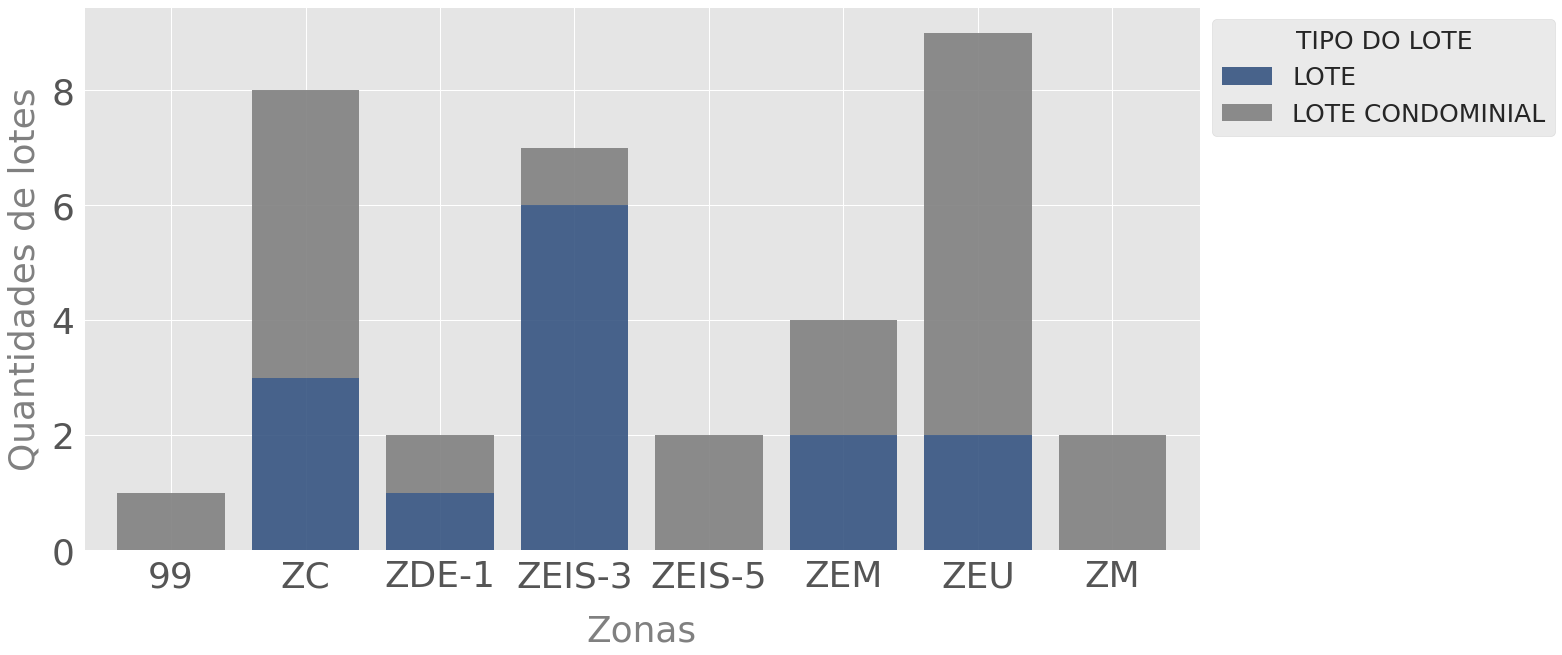

In [60]:
#cmap = cm.get_cmap('Spectral_r')
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE= SE_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, edgecolor='None', color = ['#365481', 'grey'])
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SE = plt.xticks(rotation= 0 )
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

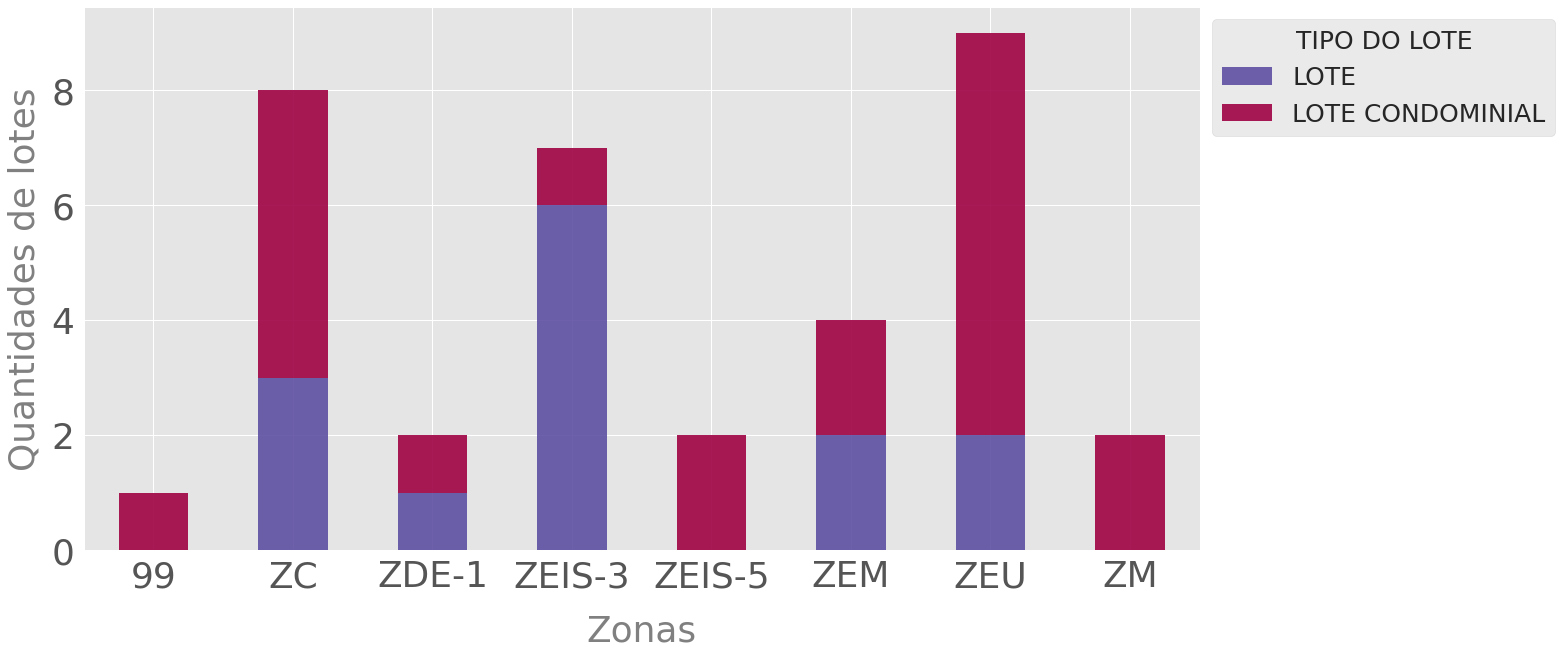

In [61]:
cmap = cm.get_cmap('Spectral_r')
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE= SE_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), alpha = 0.9, edgecolor='None', cmap = cmap)
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SE = plt.xticks(rotation= 0 )
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

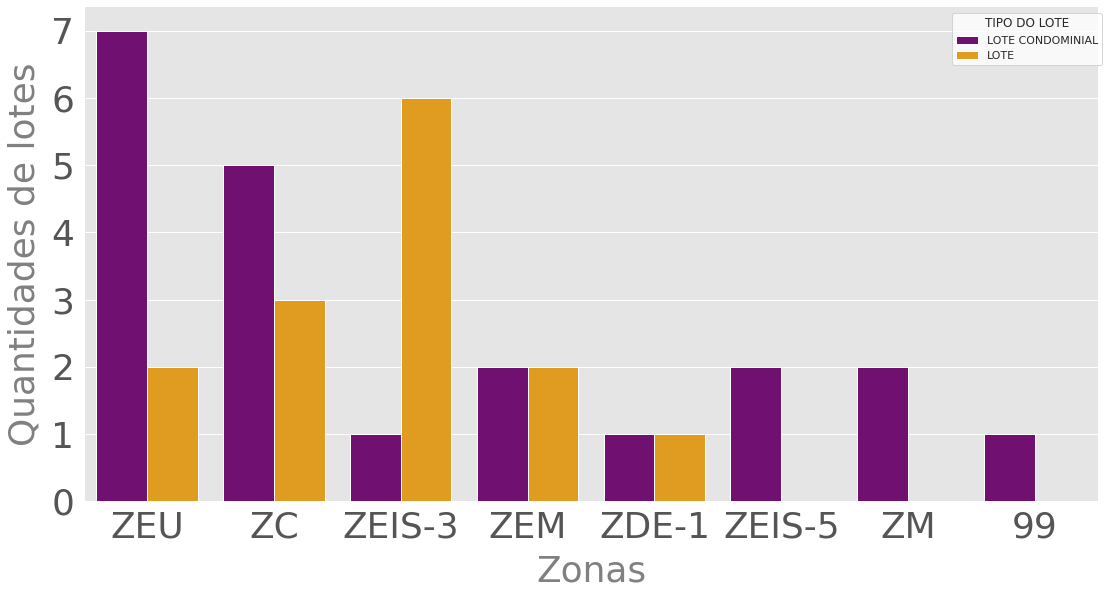

In [62]:
plt.figure(figsize=(40, 20))
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE = plt.subplot(2, 2, 3)
SE = sns.set_theme(style="whitegrid")
SE =  sns.countplot(x = 'SGL_ZONA_0', hue = 'COND', data = SE_Zonas, order=SE_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = ['purple', 'orange'], dodge = True # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.despine(bottom = False, left=False)
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE", loc=2, labels=['LOTE CONDOMINIAL','LOTE'],bbox_to_anchor=(0.85, 0, 0, 1))

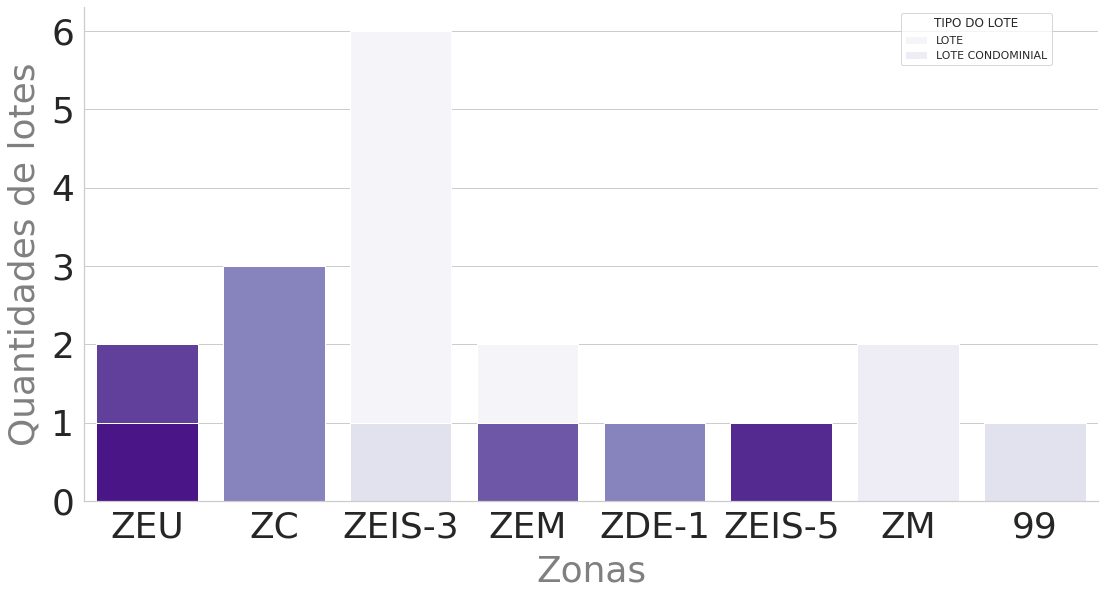

In [63]:
plt.figure(figsize=(40, 20))
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE = plt.subplot(2, 2, 3)
SE = sns.set_theme(style="whitegrid")
SE = sns.countplot(x = 'SGL_ZONA_0', hue = "COD_CNDM_Z", data = SE_Zonas, order=SE_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = 'Purples', saturation=1, dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.despine(bottom = False, left=False)
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE", loc=2, labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(0.8, 0, 0, 1))

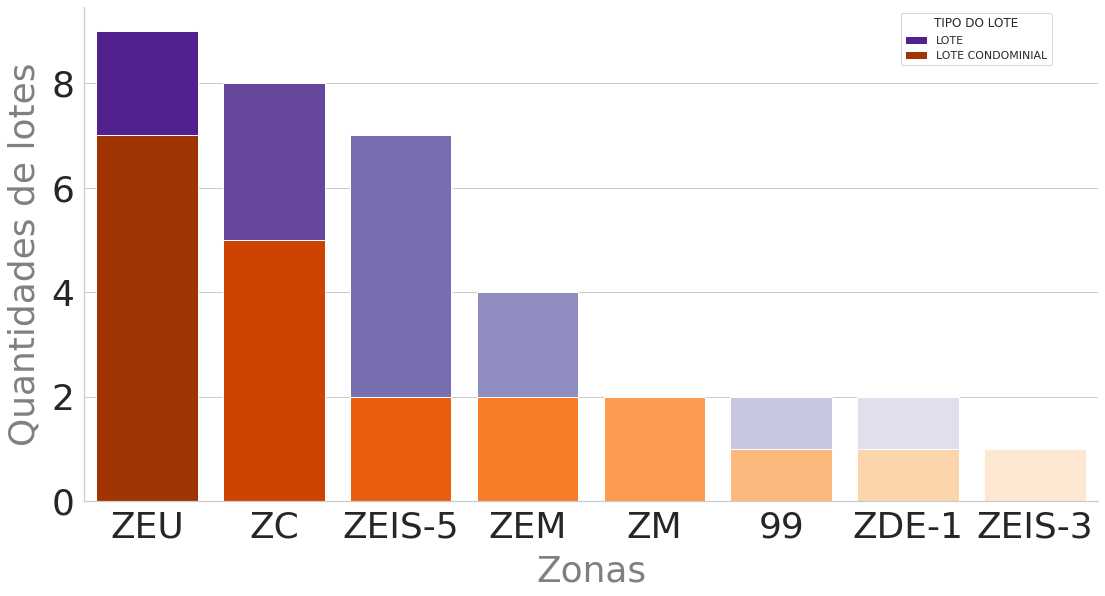

In [64]:
plt.figure(figsize=(40, 20))
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE = plt.subplot(2, 2, 3)
SE = sns.set_theme(style="whitegrid")
SE = sns.countplot(x = 'SGL_ZONA_0',  data = SE_Zonas, order=SE_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = 'Purples_r',  saturation=1, dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.countplot(x = 'SGL_ZONA_0',  data = SE_Cond_Zonas, order=SE_Cond_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = 'Oranges_r', saturation=1, dodge = False, # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.despine(bottom = False, left=False)
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE", loc=2, labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(0.8, 0, 0, 1))

##NORTE

##LOTES NA SUBPREFEITURA DE SANTANA

In [65]:
dados.query("SGL_SUBP_E == 'ST'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        84
ZEU       14
ZC         9
ZEM        5
ZEUP       5
ZEMP       3
ZMA        3
ZEIS-5     1
ZEP        1
Name: SGL_ZONA_0, dtype: int64

In [66]:
ST_Zonas = dados.query("SGL_SUBP_E == 'ST'")

In [67]:
ST_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
854,0,ZC
876,0,ZC
120,0,ZC
322,0,ZC
827,0,ZC
...,...,...
781,0,ZM
847,0,ZM
839,0,ZMA
885,0,ZMA


In [68]:
ST_Zonas["COND"]

854    0
876    0
120    0
322    0
827    0
      ..
781    0
847    0
839    0
885    0
680    0
Name: COND, Length: 125, dtype: int64

In [69]:
ST_Zonas["COND"] = ST_Zonas["COND"].astype(str)
ST_Zonas["COND"] = ST_Zonas["COND"].astype(str)


In [70]:
ST_Zonas.query("COND  == '0'")["SGL_ZONA_0"].value_counts() #selecionar uma informação da coluna 1= diferente de 

ZM      67
ZC       9
ZEU      9
ZEM      4
ZMA      3
ZEUP     2
ZEP      1
Name: SGL_ZONA_0, dtype: int64

In [71]:
ST_Zonas.query("COND  == '1'")["SGL_ZONA_0"].value_counts() #selecionar uma informação da coluna 1= diferente de 

ZM        17
ZEU        5
ZEMP       3
ZEUP       3
ZEIS-5     1
ZEM        1
Name: SGL_ZONA_0, dtype: int64

In [72]:
ST_Cond_Zonas = ST_Zonas.query("COND != '0'")
ST_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2605,"AVENIDA MAEST VILLA-LOBOS, 778,1, SAO PAULO - ...",67159197165010000,67,159,197165,1,0,ST,TUC,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4760965","-46,5966264",1
2580,"RUA AVI GIL GUILHERME, 51,1, SAO PAULO - SAO P...",73256079731010000,73,256,79731,1,0,ST,STN,3,...,RESOLUCAO SMDU.AOC.CTLU/004/2018.,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5065089","-46,6267948",1
2623,"RUA EUDORO LEMOS DE OLIVEIRA, 35, SAO PAULO, S...",73266248770040000,73,266,248770,4,0,ST,STN,NaN,...,RESOLUCAO SMDU.AOC.CTLU/004/2018.,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5029707","-46,6389543",1
1375,"RUA EUDORO LEMOS DE OLIVEIRA, 117, SAO PAULO, ...",73266248770040000,73,266,248770,4,0,ST,STN,E,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5024788","-46,6380758",1
2549,"RUA ALFREDO PUJOL, 403,1, SAO PAULO - SAO PAULO",73018007196030000,73,18,7196,3,0,ST,STN,1,...,RESOLUCAO SMDU.AOC.CTLU/004/2018.,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5004627","-46,6298477",1
2581,"RUA JULIO RODRIGUES MENDES, 256,1, SAO PAULO -...",68538113549010000,68,538,113549,1,0,ST,TUC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4859374","-46,605411",1
11,"RUA DR MARREI JUNIOR, 124, SAO PAULO, SAO PAUL...",68015135720060000,68,15,135720,6,0,ST,TUC,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,488622","-46,6064753",1
2536,"AVENIDA MAEST VILLA-LOBOS, 324,1, SAO PAULO - ...",67225197165040000,67,225,197165,4,0,ST,TUC,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4787155","-46,5997732",1
2544,"RUA CON LADEIRA, 57,1, SAO PAULO - SAO PAULO",67184115274030000,67,184,115274,3,0,ST,TUC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4756448","-46,6056747",1
2540,"RUA GUANAPUS, 87,1, SAO PAULO - SAO PAULO",68020083011030000,68,20,83011,3,0,ST,TUC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,486459","-46,6046858",1


In [73]:
len(ST_Cond_Zonas)

30

In [74]:
ST_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM      67
ZC       9
ZEU      9
ZEM      4
ZMA      3
ZEUP     2
ZEP      1
Name: SGL_ZONA_0, dtype: int64

In [75]:
ST_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM        17
ZEU        5
ZEMP       3
ZEUP       3
ZEIS-5     1
ZEM        1
Name: SGL_ZONA_0, dtype: int64

In [76]:
ST_Sem_Cond_Zonas = SE_Zonas.query("COND == '0'")


In [77]:
len(ST_Cond_Zonas)

30

In [78]:
len(ST_Sem_Cond_Zonas)

14

In [79]:
len(ST_Zonas)

125

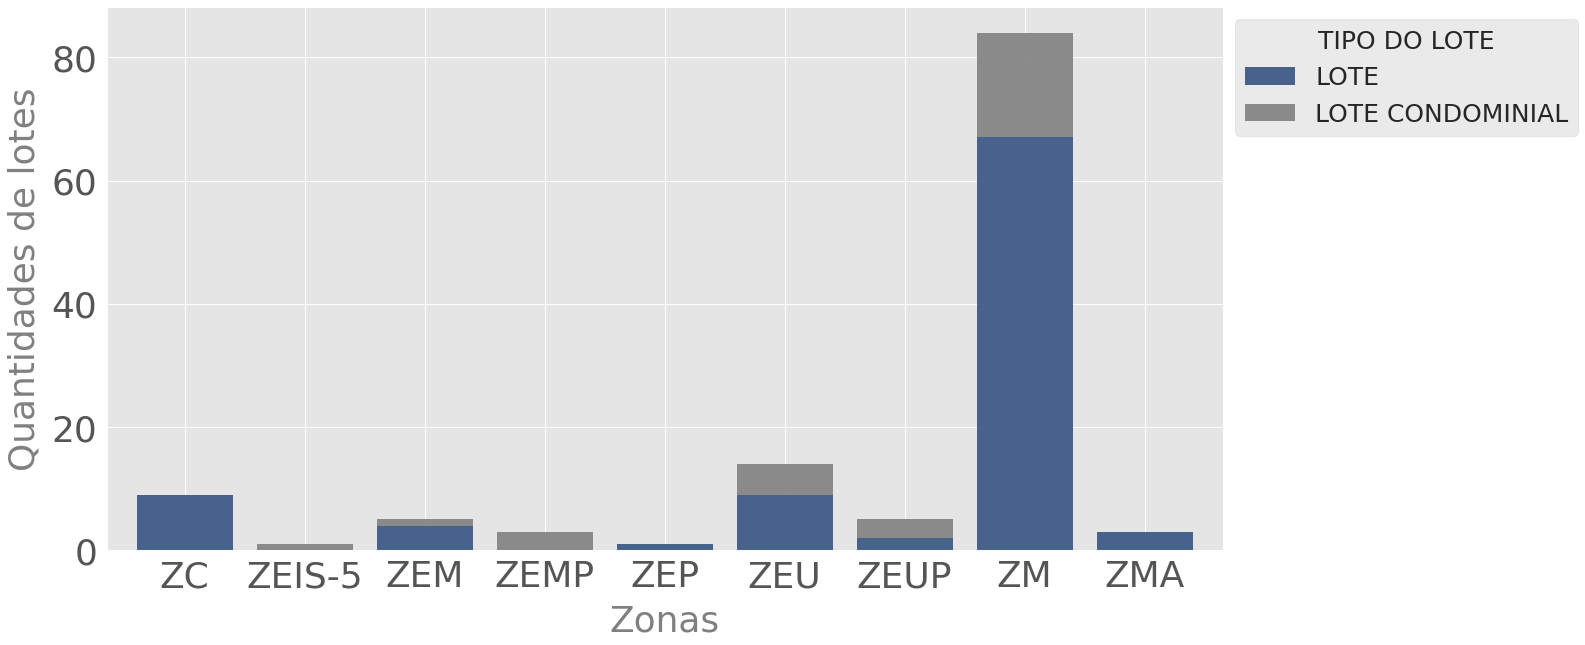

In [80]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
ST= ST_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, edgecolor='None', color = ['#365481', 'grey'])
ST = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
ST = plt.xticks(rotation= 0 )
ST = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
ST = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE JAÇANÃ TREMEMBÉ - JT 

In [81]:
dados.query("SGL_SUBP_E == 'JT'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

99        99
ZMA        9
ZC         6
ZEIS-1     6
ZERA       4
ZM         4
ZER-2      2
ZEUP       2
ZCA        1
ZPI-2      1
Name: SGL_ZONA_0, dtype: int64

In [82]:
JT_Zonas = dados.query("SGL_SUBP_E == 'JT'")

In [83]:
JT_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
544,0,99
138,0,99
541,0,99
252,0,99
251,0,99
...,...,...
344,0,ZMA
2583,1,ZMA
47,0,ZMA
108,0,ZMA


In [84]:
JT_Zonas["COND"]

544     0
138     0
541     0
252     0
251     0
       ..
344     0
2583    1
47      0
108     0
833     0
Name: COND, Length: 134, dtype: int64

In [85]:
JT_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() #selecionar uma informação da coluna 1= diferente de

0    130
1      2
2      2
Name: COD_CNDM_Z, dtype: int64

In [86]:
JT_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()


99        99
ZMA        9
ZC         6
ZEIS-1     6
ZERA       4
ZM         4
ZER-2      2
ZEUP       2
ZCA        1
ZPI-2      1
Name: SGL_ZONA_0, dtype: int64

In [87]:
JT_Zonas.query("COD_CNDM_Z == '0'")["SGL_ZONA_0"].value_counts()

Series([], Name: SGL_ZONA_0, dtype: int64)

In [88]:
JT_Cond_Zonas = JT_Zonas.query("COND != '0'")
JT_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
544,"RUA ANA DO SACRAMENTO ANDRADE, 67, SAO PAULO, ...",226015355224000114,226,15,355224,0,114,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4167467","-46,583716",0
138,"RUA CANTAREIRA, 181, SAO PAULO, SAO PAULO, - ...",226015517836000170,226,15,517836,0,170,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5425347","-46,6305587",0
541,"RUA CANTAREIRA, 345, SAO PAULO, SAO PAULO, - ...",226015517836000139,226,15,517836,0,139,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5411197","-46,6299489",0
252,"RUA CANTAREIRA, 325, SAO PAULO, SAO PAULO, - ...",226015517836000143,226,15,517836,0,143,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5412998","-46,6300866",0
251,"RUA CANTAREIRA, 101, SAO PAULO, SAO PAULO, - ...",226015517836000186,226,15,517836,0,186,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5431919","-46,630816",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,"RUA TAQUARAL, 40, SAO PAULO, SAO PAULO, - BRASIL",109007187011000040,109,7,187011,0,40,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4528476","-46,6295193",0
2583,"RUA JAPORE, 88,1, SAO PAULO - SAO PAULO",109056059404020000,109,56,59404,2,0,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4532571","-46,6211301",1
47,"RUA DOMINGOS DE ROQUE, 41, SAO PAULO, SAO PAUL...",198003060160000024,198,3,60160,0,24,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4475661","-46,5985916",0
108,"RUA TAQUARAL, 44, SAO PAULO, SAO PAULO, - BRASIL",109007187011000039,109,7,187011,0,39,JT,TRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4528302","-46,6294662",0


In [89]:
len(SE_Cond_Zonas) 

21

In [90]:
JT_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

Series([], Name: SGL_ZONA_0, dtype: int64)

In [91]:
JT_Sem_Cond_Zonas = JT_Zonas.query("COND == '0'")
JT_Sem_Cond_Zonas.head(3)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND


In [92]:
len(JT_Sem_Cond_Zonas)

0

In [93]:
len(JT_Zonas)

134

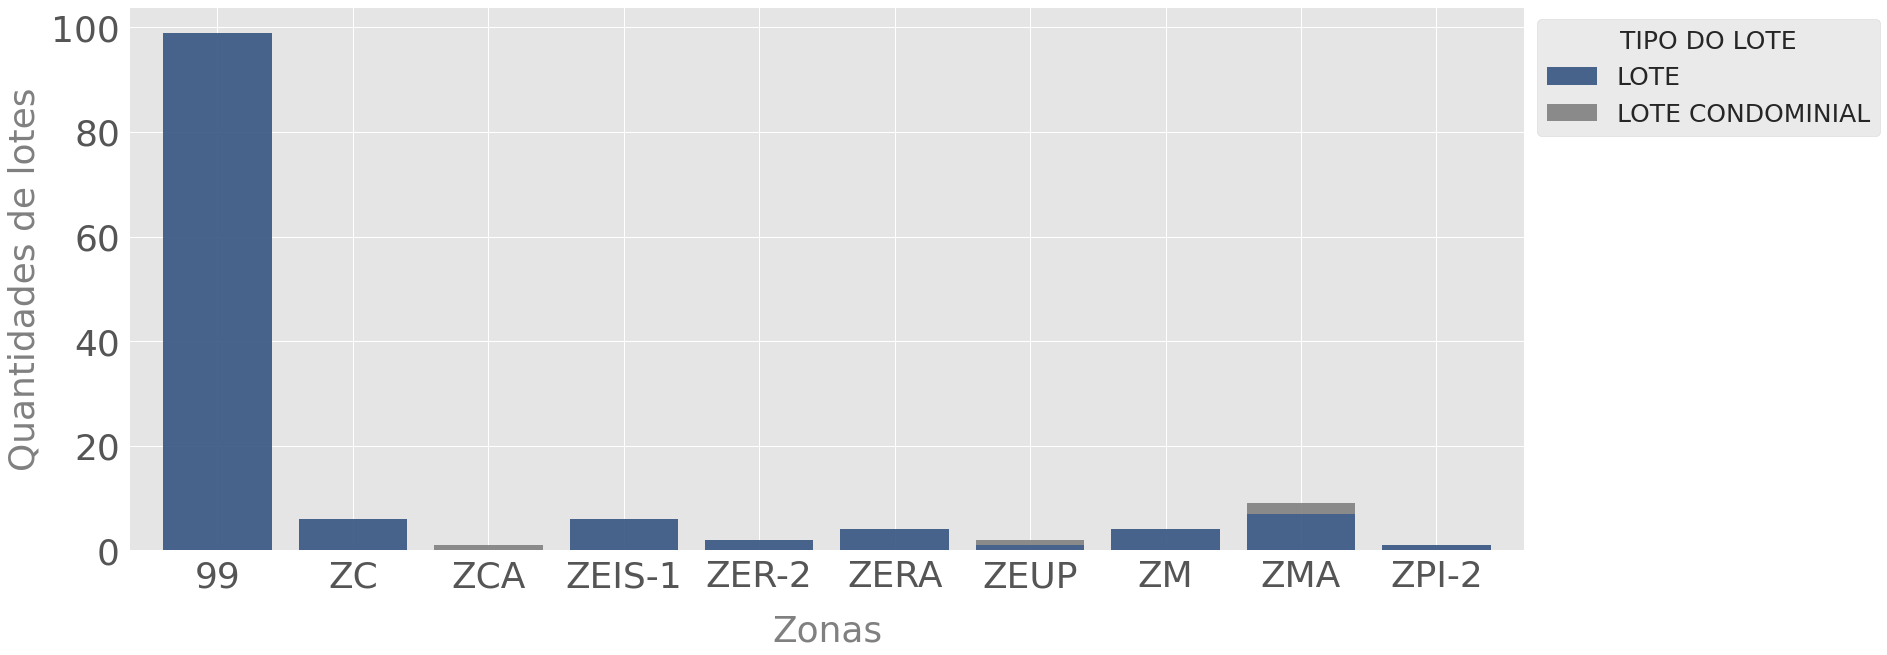

In [94]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
JT= JT_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, edgecolor='None',color = ['#365481', 'grey'])
JT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
JT = plt.xticks(rotation= 0 )
JT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
JT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA VILA MARIA/VILA GUILHERME - MG 

In [95]:
dados.query("SGL_SUBP_E == 'MG'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        33
ZC        30
ZPI-1      3
ZEIS-1     2
ZEMP       1
Name: SGL_ZONA_0, dtype: int64

In [96]:
MG_Zonas = dados.query("SGL_SUBP_E == 'MG'")

In [97]:
MG_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1708,0,ZC
1707,0,ZC
1706,0,ZC
1709,0,ZC
1710,0,ZC
...,...,...
598,0,ZM
752,0,ZM
737,0,ZPI-1
755,0,ZPI-1


In [98]:
MG_Zonas["COND_Z"] = MG_Zonas["COND"].astype(int)

In [99]:
MG_Zonas["COND"] = MG_Zonas["COND"].astype(str)

In [100]:
MG_Zonas["COND"]

1708    0
1707    0
1706    0
1709    0
1710    0
       ..
598     0
752     0
737     0
755     0
925     0
Name: COND, Length: 69, dtype: object

In [101]:
MG_Zonas.query("COND != '0'")["COND"].value_counts() #selecionar uma informação da coluna 1= diferente de 

1    15
Name: COND, dtype: int64

In [102]:
MG_Zonas.query("COND != '0'")["SGL_ZONA_0"].value_counts()

ZC    8
ZM    7
Name: SGL_ZONA_0, dtype: int64

In [103]:
MG_Cond_Zonas = MG_Zonas.query("COND != '0'")
MG_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND,COND_Z
13,"RUA CATAPARA, 88, SAO PAULO, SAO PAULO, - BRASIL",68049045942020000,68,49,45942,2,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5006215","-46,6082711",1,1
2601,"RUA CEL JORDAO, 914,1, SAO PAULO - SAO PAULO",68332106496010000,68,332,106496,1,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5011631","-46,6003631",1,1
2557,"RUA HENRIQUE FELIPE DA COSTA, 555,1, SAO PAULO...",304123424854020000,304,123,424854,2,0,MG,VGL,2,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5177882","-46,6081039",1,1
2597,"RUA CATAPARA, 97,1, SAO PAULO - SAO PAULO",68069045942010000,68,69,45942,1,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5007053","-46,6079729",1,1
2609,"RUA CARLOS DOS SANTOS, 1249,1, SAO PAULO - SAO...",66103043486010000,66,103,43486,1,0,MG,VMD,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4777187","-46,5690074",1,1
2585,"RUA GUARANESIA, 1181,1, SAO PAULO - SAO PAULO",64119151319020000,64,119,151319,2,0,MG,VMR,2,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,514295","-46,5880644",1,1
2577,"RUA MARIA CANDIDA, 606,1, SAO PAULO - SAO PAULO",304004131725050000,304,4,131725,5,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5036703","-46,6089507",1,1
2538,"RUA CLAUDIONOR BARBIERI, 116,1, SAO PAULO - SA...",68308050660040000,68,308,50660,4,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4976535","-46,5979505",1,1
2558,"RUA JOSE VENTURA, 75,1, SAO PAULO - SAO PAULO",68318112178020000,68,318,112178,2,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,4982788","-46,6052603",1,1
2599,"AVENIDA ANGELINA, 56,1, SAO PAULO - SAO PAULO",68178013641010000,68,178,13641,1,0,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5050044","-46,5978029",1,1


In [104]:
len(MG_Cond_Zonas) 

15

In [105]:
MG_Zonas.query("COND== '0'")["SGL_ZONA_0"].value_counts()

ZM        26
ZC        22
ZPI-1      3
ZEIS-1     2
ZEMP       1
Name: SGL_ZONA_0, dtype: int64

In [106]:
MG_Sem_Cond_Zonas = MG_Zonas.query("COND == '0'")
MG_Sem_Cond_Zonas.head(3)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND,COND_Z
1708,"RUA HOMEM DA COSTA, 232, SAO PAULO, SAO PAULO,...",68047088099000157,68,47,88099,0,157,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5017144","-46,6082304",0,0
1707,"RUA CATAPARA, 230, SAO PAULO, SAO PAULO, - BR...",68047045942000152,68,47,45942,0,152,MG,VGL,NaN,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,501883","-46,6084094",0,0
1706,"RUA CATAPARA, 228, SAO PAULO, SAO PAULO, - BR...",68047045942000153,68,47,45942,0,153,MG,VGL,1,...,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5018565","-46,6084082",0,0


In [107]:
len(MG_Sem_Cond_Zonas)

54

In [108]:
len(MG_Zonas)

69

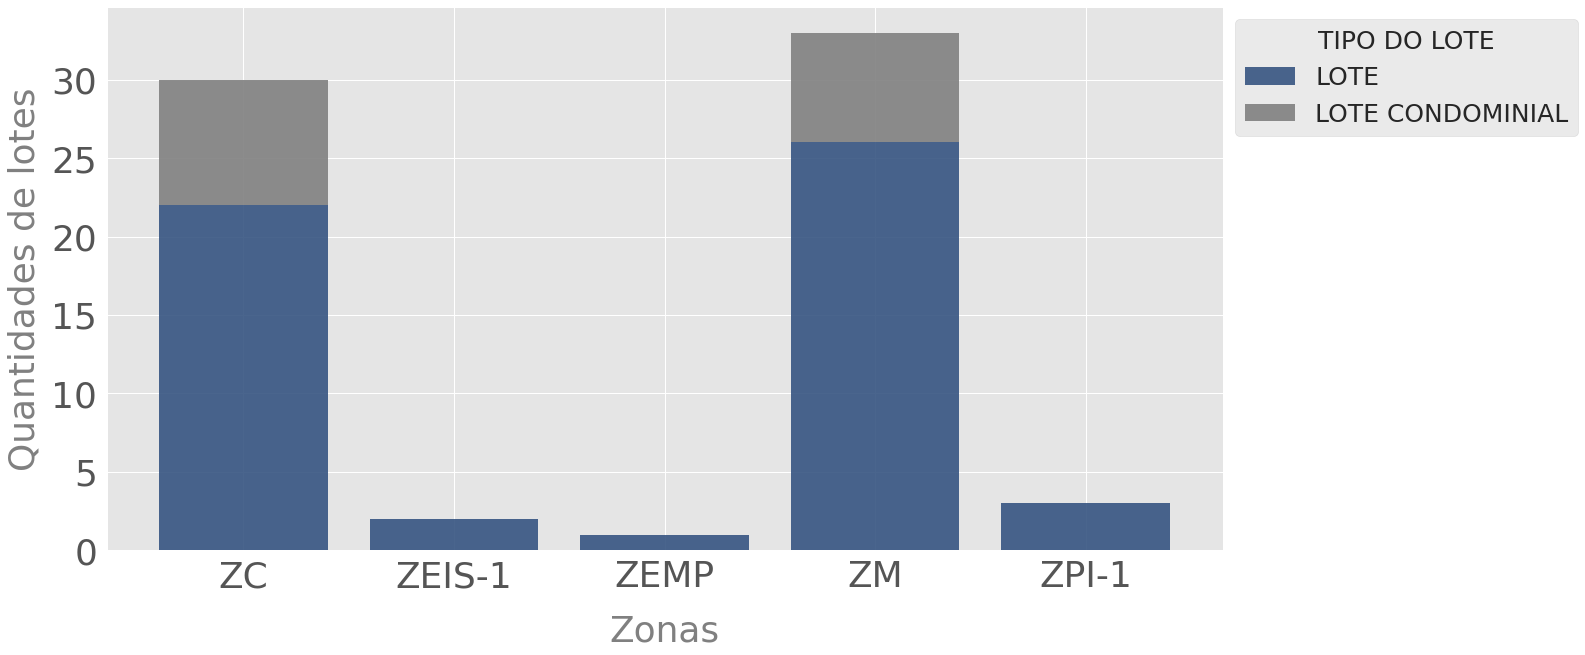

In [109]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MG= MG_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, edgecolor='None',color = ['#365481', 'grey'])
MG = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MG = plt.xticks(rotation= 0 )
MG = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MG = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##SUL-SUDESTE 

##LOTES DA SUBPREFEITURA DA VILA MARIANA - VM

In [110]:
dados.query("SGL_SUBP_E == 'VM'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura

ZEU       13
ZM         8
ZEUP       3
ZCOR-2     2
ZCOR-3     2
ZC         1
ZCOR-1     1
ZER 1      1
ZER-1      1
Name: SGL_ZONA_0, dtype: int64

In [111]:
VM_Zonas = dados.query("SGL_SUBP_E == 'VM'")

In [112]:
VM_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1679,0,ZC
1661,0,ZCOR-1
1656,0,ZCOR-2
1657,0,ZCOR-2
1655,0,ZCOR-3
700,0,ZCOR-3
1370,0,ZER 1
15,0,ZER-1
1299,1,ZEU
1314,0,ZEU


In [113]:
VM_Zonas["COND"] = VM_Zonas["COND"].astype(int)

In [114]:
VM_Zonas["COND"] = VM_Zonas["COND"].astype(str)

In [115]:
VM_Zonas["COND"]

1679    0
1661    0
1656    0
1657    0
1655    0
700     0
1370    0
15      0
1299    1
1314    0
1305    1
1307    1
691     0
1304    1
1313    0
1301    1
1289    0
1290    0
1296    1
1284    1
1300    1
61      0
153     0
1259    1
2612    1
2610    1
1043    1
1011    1
1067    0
1058    1
1053    1
1081    1
Name: COND, dtype: object

In [116]:
VM_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

4     5
1     4
8     2
7     1
3     1
10    1
2     1
9     1
Name: COD_CNDM_Z, dtype: int64

In [117]:
VM_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZEU       13
ZM         8
ZEUP       3
ZCOR-2     2
ZCOR-3     2
ZC         1
ZCOR-1     1
ZER 1      1
ZER-1      1
Name: SGL_ZONA_0, dtype: int64

In [118]:
VM_Cond_Zonas = VM_Zonas.query("COND != '0'")
VM_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1299,"RUA GASPAR LOURENCO, , SAO PAULO, SAO PAULO, ...",38073078077070000,38,73,78077,7,0,VM,VMN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5818886","-46,6344793",1
1305,"RUA HUMBERTO 1, 1005, SAO PAULO, SAO PAULO, -...",37044088838040000,37,44,88838,4,0,VM,VMN,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5884193","-46,6397494",1
1307,"AV ROUXINOL, 1017, SAO PAULO, SAO PAULO, - BR...",41184174750040000,41,184,174750,4,0,VM,MOE,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6065891","-46,6662798",1
1304,"RUA BERTIOGA, 291, SAO PAULO, SAO PAULO, - BR...",309045033243030000,309,45,33243,3,0,VM,SAU,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,610643","-46,6342606",1
1301,"RUA GREGORIO SERRAO, 260, SAO PAULO, SAO PAULO...",38072082155040000,38,72,82155,4,0,VM,VMN,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5829462","-46,635294",1
1296,"RUA SENA MADUREIRA, 80, SAO PAULO, SAO PAULO, ...",37056179914080000,37,56,179914,8,0,VM,VMN,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5924539","-46,6372811",1
1284,"AVENIDA DAS CARINAS, 301, SAO PAULO, SAO PAULO...",41224042692010000,41,224,42692,1,0,VM,MOE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6128452","-46,6669364",1
1300,"RUA DESEM ARAGAO, 76, SAO PAULO, SAO PAULO, -...",42013020273100000,42,13,20273,10,0,VM,VMN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5923546","-46,6318081",1
1259,"RUA CARLOS STEINEN, 536, SAO PAULO, SAO PAULO,...",37096044202020000,37,96,44202,2,0,VM,VMN,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5787586","-46,6474344",1
2612,"RUA PAULA NEY, 693,1, SAO PAULO - SAO PAULO",38075085120010000,38,75,85120,1,0,VM,VMN,NaN,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5810505","-46,6334762",1


In [119]:
len(VM_Cond_Zonas) 

16

In [120]:
VM_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEU       5
ZCOR-2    2
ZCOR-3    2
ZEUP      2
ZC        1
ZCOR-1    1
ZER 1     1
ZER-1     1
ZM        1
Name: SGL_ZONA_0, dtype: int64

In [121]:
VM_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEU     8
ZM      7
ZEUP    1
Name: SGL_ZONA_0, dtype: int64

In [122]:
VM_Sem_Cond_Zonas = VM_Zonas.query("COND == '0'")
VM_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1679,"RUA PADRE MACHADO, 1137, SAO PAULO, SAO PAULO,...",42120337501000082,42,120,337501,0,82,VM,SAU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,60161","-46,6255576",0
1661,"AL DOS NHAMBIQUARAS, 111, SAO PAULO, SAO PAULO...",45002145319000046,45,2,145319,0,46,VM,MOE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6017535","-46,6541792",0


In [123]:
len(VM_Sem_Cond_Zonas)

16

In [124]:
len(VM_Zonas)

32

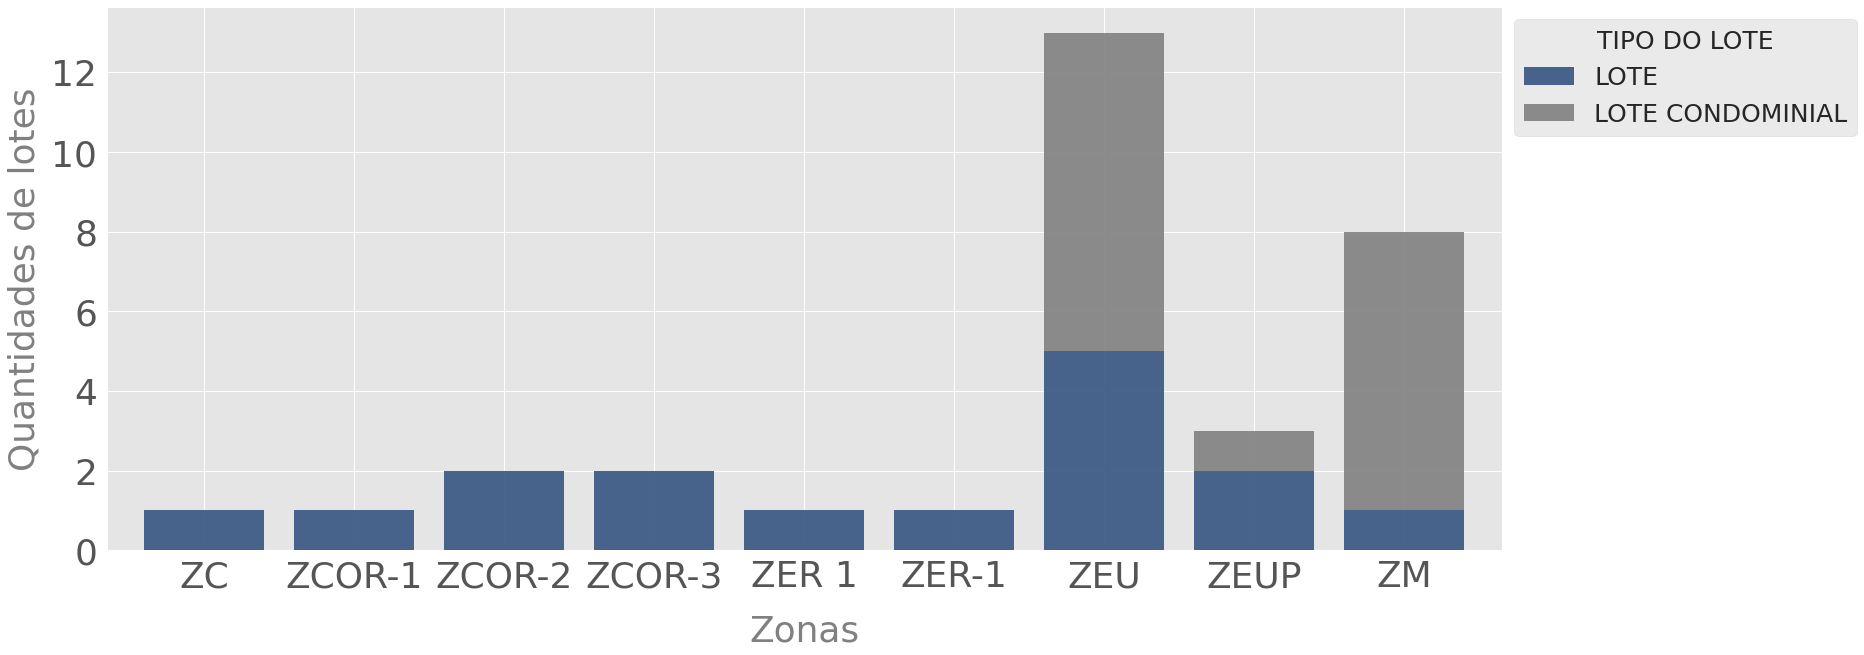

In [125]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
VM= VM_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
VM = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
VM = plt.xticks(rotation= 0 )
VM = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
VM = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO IPIRANGA - IP 

In [126]:
dados.query("SGL_SUBP_E == 'IP'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        23
ZC         9
ZEUP       4
ZCOR-2     3
ZEIS-1     2
ZEIS-2     2
ZEIS-3     1
ZER 1      1
ZEU        1
Name: SGL_ZONA_0, dtype: int64

In [127]:
IP_Zonas = dados.query("SGL_SUBP_E == 'IP'")

In [128]:
IP_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
130,0,ZC
1673,0,ZC
1672,0,ZC
1671,1,ZC
1684,0,ZC
1680,0,ZC
1670,1,ZC
1674,0,ZC
129,0,ZC
1660,0,ZCOR-2


In [129]:
IP_Zonas["COND"] = IP_Zonas["COND"].astype(int)

In [130]:
IP_Zonas["COND"] = IP_Zonas["COND"].astype(str)

In [131]:
IP_Zonas["COND"]

130     0
1673    0
1672    0
1671    1
1684    0
1680    0
1670    1
1674    0
129     0
1660    0
1659    0
1658    0
1485    0
1475    0
1418    1
1419    0
1406    1
1367    1
1302    1
1257    0
1260    0
1256    0
1258    0
1018    0
1037    0
1041    0
1047    0
1060    1
1061    1
308     0
1057    1
133     0
1096    0
1088    0
1072    0
1069    0
1065    0
304     0
132     0
131     0
1017    0
1015    0
875     0
1045    0
1051    0
994     0
Name: COND, dtype: object

In [132]:
IP_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

3     2
16    1
15    1
10    1
17    1
8     1
1     1
2     1
Name: COD_CNDM_Z, dtype: int64

In [133]:
IP_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()


ZM        23
ZC         9
ZEUP       4
ZCOR-2     3
ZEIS-1     2
ZEIS-2     2
ZEIS-3     1
ZER 1      1
ZEU        1
Name: SGL_ZONA_0, dtype: int64

In [134]:
IP_Cond_Zonas = IP_Zonas.query("COND != '0'")
IP_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1671,"AVENIDA DOS OURIVES, 748, SAO PAULO, SAO PAULO...",157229152390160000,157,229,152390,16,0,IP,SAC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6555243","-46,6076117",1
1670,"AVENIDA DOS OURIVES, 780, SAO PAULO, SAO PAULO...",157229152390150000,157,229,152390,15,0,IP,SAC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6553016","-46,6063058",1
1418,"RUA PROFESSOR ARNALDO JOAO SEMERARO, 415, SAO ...",157130059870100000,157,130,59870,10,0,IP,SAC,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6474283","-46,5979994",1
1406,"AVENIDA DOS OURIVES, 710, SAO PAULO, SAO PAULO...",157229152390170000,157,229,152390,17,0,IP,SAC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6561491","-46,6075396",1
1367,"RUA TUIUCUE, 103, SAO PAULO, SAO PAULO, - BRASIL",46160192058080000,46,160,192058,8,0,IP,CUR,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6162302","-46,6232031",1
1302,"RUA GAMA LOBO, 1810, SAO PAULO, SAO PAULO, - ...",43064077461030000,43,64,77461,3,0,IP,IPI,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5999178","-46,6120276",1
1060,"RUA LINO COUTINHO, 748, SAO PAULO, SAO PAULO, ...",40112119130030000,40,112,119130,3,0,IP,IPI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,5899151","-46,6027738",1
1061,"RUA VICENTE FERNANDES PINTO, 390, SAO PAULO, S...",48125338915010000,48,125,338915,1,0,IP,CUR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6330597","-46,6231866",1
1057,"RUA BUDAPESTE, 106, SAO PAULO, SAO PAULO, - B...",49126036951020000,49,126,36951,2,0,IP,SAC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6188119","-46,6007128",1


In [135]:
len(IP_Cond_Zonas) 

9

In [136]:
IP_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        20
ZC         7
ZEUP       4
ZCOR-2     3
ZEIS-1     2
ZEIS-2     1
Name: SGL_ZONA_0, dtype: int64

In [137]:
IP_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM        3
ZC        2
ZEIS-2    1
ZEIS-3    1
ZER 1     1
ZEU       1
Name: SGL_ZONA_0, dtype: int64

In [138]:
IP_Sem_Cond_Zonas = IP_Zonas.query("COND == '0'")
IP_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
130,"RUA DO PIQUETE, 184, SAO PAULO, SAO PAULO, - ...",40167163090000057,40,167,163090,0,57,IP,IPI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5849403","-46,6156192",0
1673,"RUA DOS OPERARIOS, 746, SAO PAULO, SAO PAULO, ...",48399023469000077,48,399,23469,0,77,IP,CUR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6317162","-46,6163822",0


In [139]:
len(IP_Sem_Cond_Zonas)

37

In [140]:
len(IP_Zonas) #quatidade total de zonas em Ipiranga

46

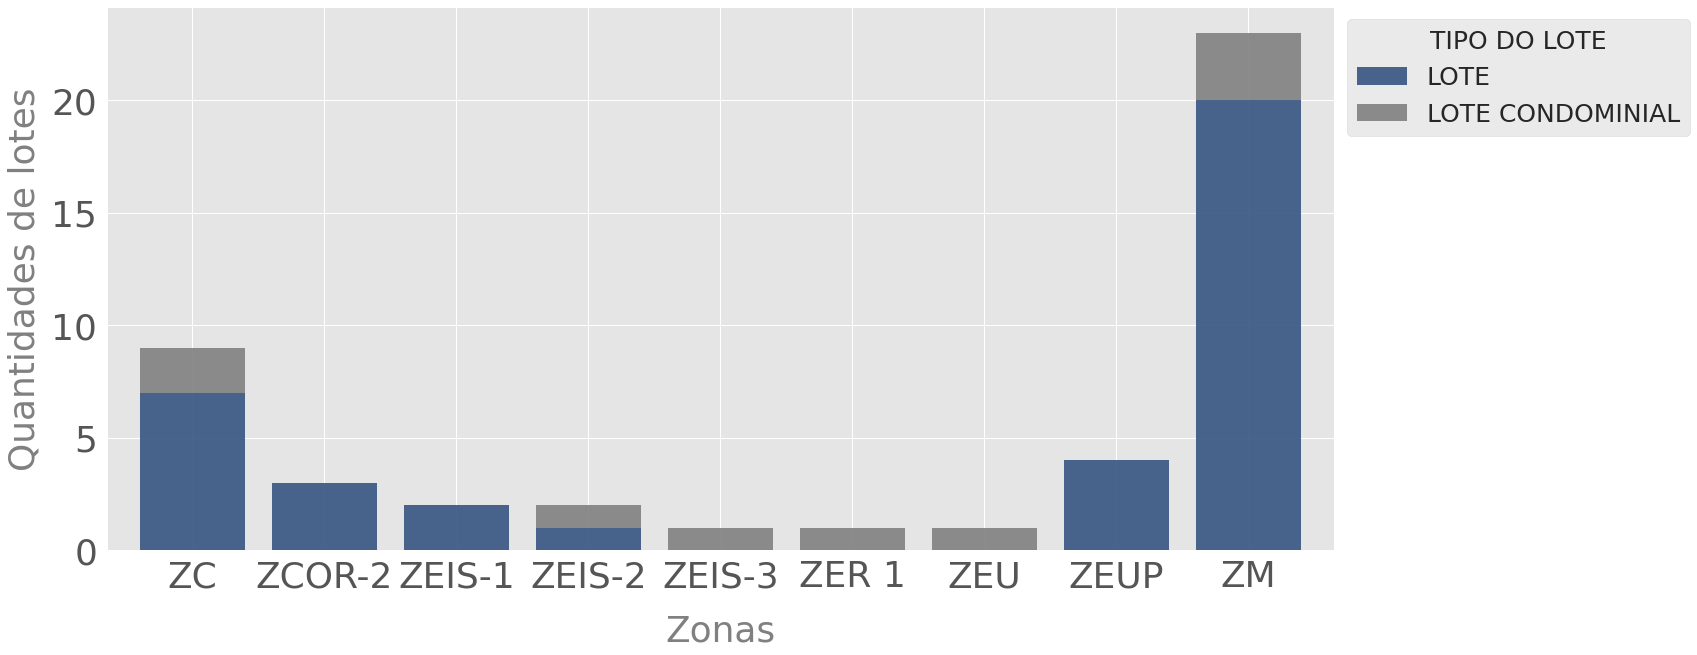

In [141]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
IP= IP_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(22, 10),width = 0.8, alpha = 0.9,color = ['#365481', 'grey'], edgecolor='None')
IP = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
IP = plt.xticks(rotation= 0 )
IP = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
IP = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE SANTO AMARO - SA 

In [142]:
dados.query("SGL_SUBP_E == 'SA'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM       34
ZC        8
ZER 1     6
ZER-2     4
ZEU       3
Name: SGL_ZONA_0, dtype: int64

In [143]:
SA_Zonas = dados.query("SGL_SUBP_E == 'SA'")

In [144]:
SA_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1678,0,ZC
1683,0,ZC
1681,0,ZC
1682,0,ZC
1675,0,ZC
1685,0,ZC
1686,0,ZC
1677,0,ZC
1365,0,ZER 1
1366,0,ZER 1


In [145]:
SA_Zonas["COND"] = SA_Zonas["COND"].astype(int)

In [146]:
SA_Zonas["COND"] = SA_Zonas["COND"].astype(str)

In [147]:
SA_Zonas["COND"]

1678    0
1683    0
1681    0
1682    0
1675    0
1685    0
1686    0
1677    0
1365    0
1366    0
1368    0
1364    0
1363    0
1369    0
899     0
892     0
829     0
908     0
1318    0
1294    1
1295    1
1054    0
1040    0
1006    0
1009    0
1010    1
1020    0
1024    0
1027    0
1029    0
1030    0
1033    0
1035    0
1092    0
1085    0
1084    0
1004    0
998     0
1021    0
186     0
997     0
993     0
996     0
185     0
184     0
1063    0
1062    1
1056    0
1082    0
1079    0
1078    0
1046    0
1038    0
1073    0
1071    0
Name: COND, dtype: object

In [148]:
SA_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    1
7    1
8    1
9    1
Name: COD_CNDM_Z, dtype: int64

In [149]:
SA_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM       34
ZC        8
ZER 1     6
ZER-2     4
ZEU       3
Name: SGL_ZONA_0, dtype: int64

In [150]:
SA_Cond_Zonas = SA_Zonas.query("COND != '0'")
SA_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1294,"RUA ANTONIO DAS CHAGAS, 162, SAO PAULO, SAO PA...",87122016527010000,87,122,16527,1,0,SA,SAM,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6341194","-46,6954025",1
1295,"RUA MORAIS DE BARROS, 750, SAO PAULO, SAO PAUL...",86096142263070000,86,96,142263,7,0,SA,CBE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6161867","-46,6716925",1
1010,"RUA JOAQUIM GUARANI, 533, SAO PAULO, SAO PAULO...",85614105619080000,85,614,105619,8,0,SA,SAM,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,626051","-46,6935004",1
1062,"RUA MIGUEL YUNES, 315, SAO PAULO, SAO PAULO, ...",162001130354090000,162,1,130354,9,0,SA,CGR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6889765","-46,6875075",1


In [151]:
len(SA_Cond_Zonas) 

4

In [152]:
SA_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()


ZM       32
ZC        8
ZER 1     6
ZER-2     4
ZEU       1
Name: SGL_ZONA_0, dtype: int64

In [153]:
SA_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEU    2
ZM     2
Name: SGL_ZONA_0, dtype: int64

In [154]:
SA_Sem_Cond_Zonas = SA_Zonas.query("COND == '0'")
SA_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1678,"RUA NOVA FATIMA, 135, SAO PAULO, SAO PAULO, -...",90163216879000062,90,163,216879,0,62,SA,CGR,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6661935","-46,6915194",0
1683,"RUA JOAO FERREIRA DE ABREU, 148, SAO PAULO, SA...",121037210897000183,121,37,210897,0,183,SA,CGR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6835783","-46,6830563",0


In [155]:
len(SA_Sem_Cond_Zonas)

51

In [156]:
len(SA_Zonas)

55

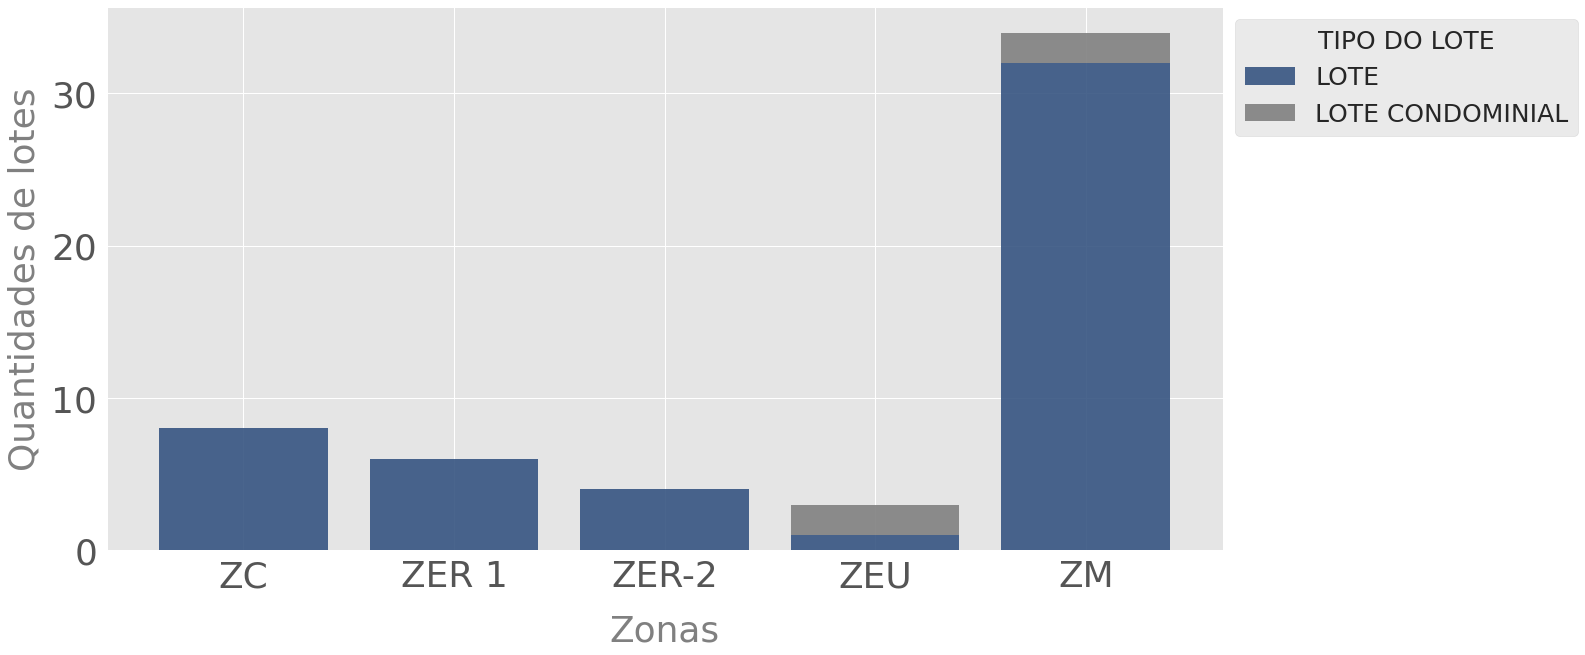

In [157]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SA= SA_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SA = plt.xticks(rotation= 0 )
SA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO JABAQUARA - JA 

---



In [158]:
dados.query("SGL_SUBP_E == 'JA'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM     10
ZEU     5
ZC      2
ZEP     1
Name: SGL_ZONA_0, dtype: int64

In [159]:
JA_Zonas = dados.query("SGL_SUBP_E == 'JA'")

In [160]:
JA_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
629,0,ZC
616,0,ZC
1374,0,ZEP
1287,0,ZEU
1288,0,ZEU
1308,0,ZEU
1303,1,ZEU
1293,0,ZEU
2615,1,ZM
995,0,ZM


In [161]:
JA_Zonas["COND"] = JA_Zonas["COND"].astype(int)

In [162]:
JA_Zonas["COND"] = JA_Zonas["COND"].astype(str)

In [163]:
JA_Zonas["COND"]

629     0
616     0
1374    0
1287    0
1288    0
1308    0
1303    1
1293    0
2615    1
995     0
1083    0
1075    0
1070    0
1059    1
1044    0
1036    0
1007    0
1023    0
Name: COND, dtype: object

In [164]:
JA_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

1    1
8    1
7    1
Name: COD_CNDM_Z, dtype: int64

In [165]:
JA_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM     10
ZEU     5
ZC      2
ZEP     1
Name: SGL_ZONA_0, dtype: int64

In [166]:
JA_Cond_Zonas = JA_Zonas.query("COND != '0'")
JA_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1303,"RUA MARACA, 363, SAO PAULO, SAO PAULO, - BRASIL",310028128414010000,310,28,128414,1,0,JA,JAB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,63579","-46,638766",1
2615,"AVENIDA DAMASCENO VIEIRA, 723,1, SAO PAULO - S...",89110067245080000,89,110,67245,8,0,JA,JAB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6463999","-46,6648666",1
1059,"RUA SANTA, 95, SAO PAULO, SAO PAULO, - BRASIL",89111177466070000,89,111,177466,7,0,JA,JAB,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6476972","-46,6656994",1


In [167]:
len(JA_Cond_Zonas) 


3

In [168]:
JA_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM     8
ZEU    4
ZC     2
ZEP    1
Name: SGL_ZONA_0, dtype: int64

In [169]:
JA_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM     2
ZEU    1
Name: SGL_ZONA_0, dtype: int64

In [170]:
JA_Sem_Cond_Zonas = JA_Zonas.query("COND == '0'")
JA_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
629,"AV JOAO BARRETO DE MENEZES, 709, SAO PAULO, SA...",89171035858001011,89,171,35858,0,1011,JA,JAB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,6495391","-46,6606461",0
616,"AV JOAO BARRETO DE MENEZES, 715, SAO PAULO, SA...",89171035858001010,89,171,35858,0,1010,JA,JAB,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,6496734","-46,6606108",0


In [171]:
len(JA_Sem_Cond_Zonas)

15

In [172]:
len(JA_Zonas)

18

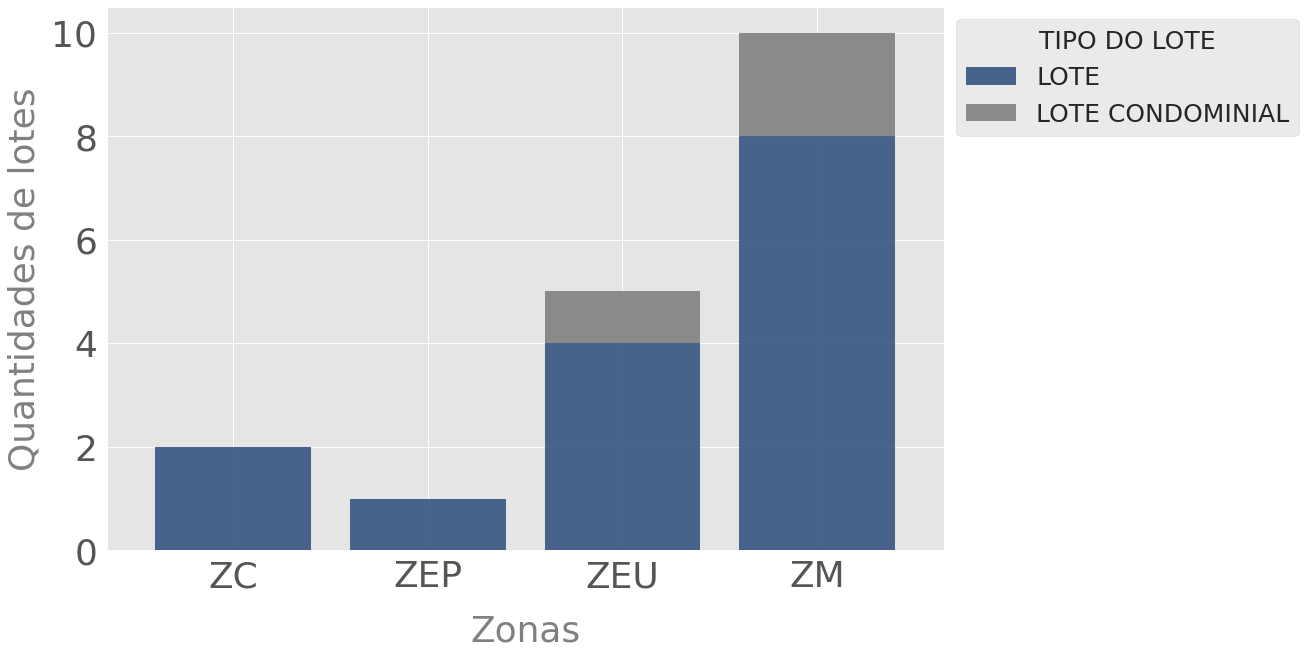

In [173]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
JA= JA_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10), width = 0.8, alpha = 0.9,color = ['#365481', 'grey'],edgecolor='None')
JA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
JA = plt.xticks(rotation= 0 )
JA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
JA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA CIDADE ADEMAR - AD 

In [174]:
dados.query("SGL_SUBP_E == 'AD'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        26
ZEIS-1    10
ZEU        6
ZERA       5
ZEUP       3
ZMA        2
Name: SGL_ZONA_0, dtype: int64

In [175]:
AD_Zonas = dados.query("SGL_SUBP_E == 'AD'")

In [176]:
AD_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1462,0,ZEIS-1
1467,0,ZEIS-1
1481,0,ZEIS-1
1470,0,ZEIS-1
1460,0,ZEIS-1
1449,0,ZEIS-1
1483,0,ZEIS-1
1477,0,ZEIS-1
1476,0,ZEIS-1
1471,0,ZEIS-1


In [177]:
AD_Zonas["COND"] = AD_Zonas["COND"].astype(int)

In [178]:
AD_Zonas["COND"] = AD_Zonas["COND"].astype(str)

In [179]:
AD_Zonas["COND"]

1462    0
1467    0
1481    0
1470    0
1460    0
1449    0
1483    0
1477    0
1476    0
1471    0
461     0
1361    0
1360    0
451     0
452     0
1286    0
1285    0
1297    0
1309    0
1320    0
1311    1
303     0
297     0
298     0
1019    0
1050    0
1086    0
1013    0
1022    0
1080    0
1026    0
1076    0
1074    0
1012    0
1028    0
1068    0
1031    0
1066    0
1034    0
1048    0
1087    0
1089    0
310     0
309     0
1032    0
1094    0
1000    0
1008    0
305     0
1095    0
453     0
967     0
Name: COND, dtype: object

In [180]:
AD_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

1    1
Name: COD_CNDM_Z, dtype: int64

In [181]:
AD_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        26
ZEIS-1    10
ZEU        6
ZERA       5
ZEUP       3
ZMA        2
Name: SGL_ZONA_0, dtype: int64

In [182]:
AD_Cond_Zonas = AD_Zonas.query("COND != '0'")
AD_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1311,"AV MANUEL AUGUSTO DE ALVARENGA, 171, SAO PAULO...",120161126292010000,120,161,126292,1,0,AD,CAD,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6639952","-46,6622171",1


In [183]:
len(AD_Cond_Zonas) 

1

In [184]:
AD_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        26
ZEIS-1    10
ZERA       5
ZEU        5
ZEUP       3
ZMA        2
Name: SGL_ZONA_0, dtype: int64

In [185]:
AD_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEU    1
Name: SGL_ZONA_0, dtype: int64

In [186]:
AD_Sem_Cond_Zonas = AD_Zonas.query("COND == '0'")
AD_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1462,"RUA GISELE, 51, SAO PAULO, SAO PAULO, - BRASIL",172050357847000054,172,50,357847,0,54,AD,CAD,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6882718","-46,6439306",0
1467,"AV BENTO XV, 514, SAO PAULO, SAO PAULO, - BRASIL",173157032433000065,173,157,32433,0,65,AD,PDR,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6921028","-46,646011",0


In [187]:
len(AD_Sem_Cond_Zonas)

51

In [188]:
len(AD_Zonas) #quatidade total de zonas 

52

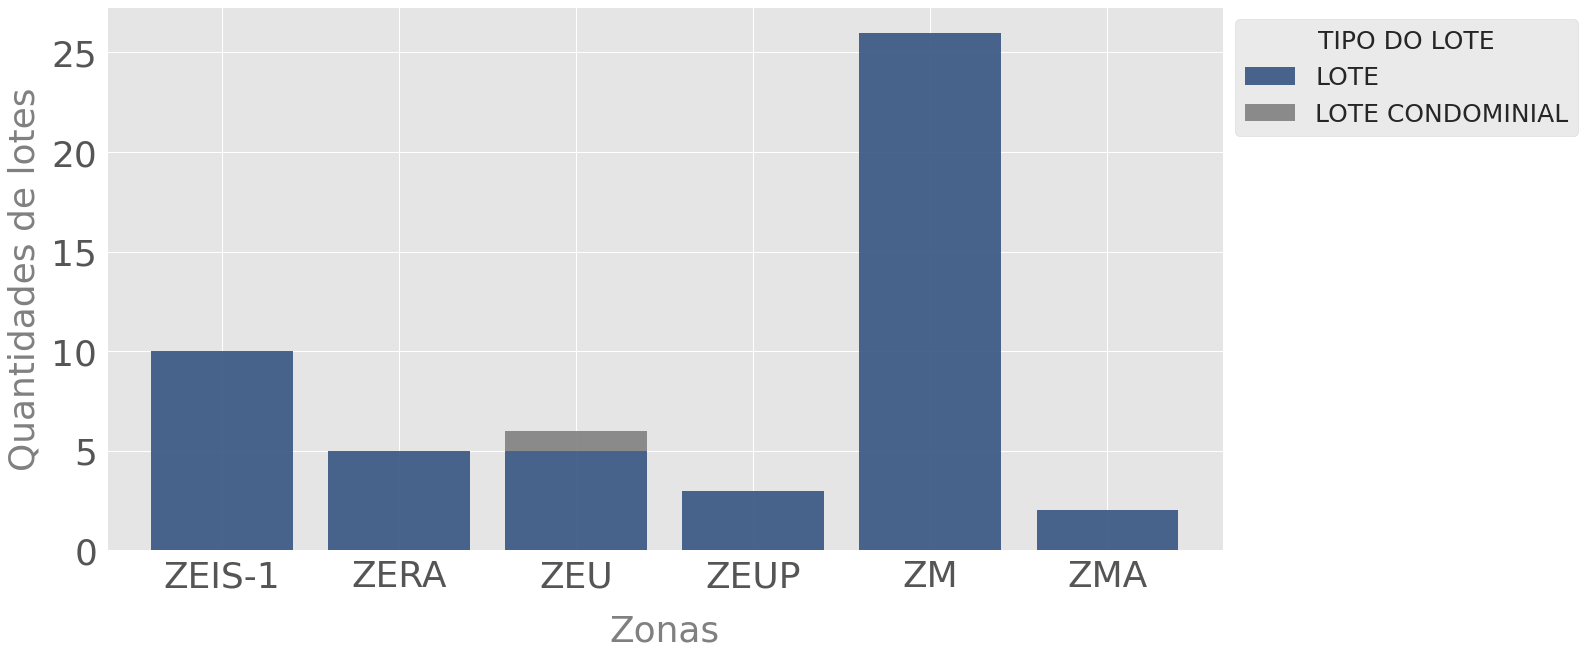

In [189]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
AD= AD_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
AD = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
AD = plt.xticks(rotation= 0 )
AD = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
AD = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO CAMPO LIMPO - CL 

In [190]:
dados.query("SGL_SUBP_E == 'CL'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    37
ZM        25
ZEU        2
ZC         1
ZER-1      1
ZMA        1
Name: SGL_ZONA_0, dtype: int64

In [191]:
CL_Zonas = dados.query("SGL_SUBP_E == 'CL'")

In [192]:
CL_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
689,0,ZC
1451,0,ZEIS-1
468,0,ZEIS-1
1425,0,ZEIS-1
1450,0,ZEIS-1
...,...,...
1052,1,ZM
1055,0,ZM
1039,0,ZM
1042,0,ZM


In [193]:
CL_Zonas["COND"] = CL_Zonas["COND"].astype(int)

In [194]:
CL_Zonas["COND"] = CL_Zonas["COND"].astype(str)

In [195]:
CL_Zonas["COND"]

689     0
1451    0
468     0
1425    0
1450    0
       ..
1052    1
1055    0
1039    0
1042    0
964     1
Name: COND, Length: 67, dtype: object

In [196]:
CL_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

3    2
2    2
1    1
Name: COD_CNDM_Z, dtype: int64

In [197]:
CL_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    37
ZM        25
ZEU        2
ZC         1
ZER-1      1
ZMA        1
Name: SGL_ZONA_0, dtype: int64

In [198]:
CL_Cond_Zonas = CL_Zonas.query("COND != '0'")
CL_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1005,"RUA CARVALHO DE FREITAS, 497, SAO PAULO, SAO P...",169202663000030000,169,202,663000,3,0,CL,VAN,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6323974","-46,7399324",1
2614,"RUA CLODOMIRO DE OLIVEIRA, 770,1, SAO PAULO - ...",169031630810010000,169,31,630810,1,0,CL,CLM,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6286956","-46,7498328",1
2611,"RUA CARLOS MAGALHAES, 60,1, SAO PAULO - SAO PAULO",169119662429020000,169,119,662429,2,0,CL,CLM,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6306044","-46,7476698",1
1052,"RUA CELSO RAMOS, 120, SAO PAULO, SAO PAULO, -...",169040662763030000,169,40,662763,3,0,CL,CLM,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6281388","-46,7462247",1
964,"RUA LUAR DO SERTAO, 42, SAO PAULO, SAO PAULO, ...",181088067261020000,181,88,67261,2,0,CL,CRE,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6866475","-46,7934262",1


In [199]:
len(CL_Cond_Zonas) 

5

In [200]:
CL_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    37
ZM        21
ZEU        2
ZC         1
ZER-1      1
Name: SGL_ZONA_0, dtype: int64

In [201]:
CL_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM     4
ZMA    1
Name: SGL_ZONA_0, dtype: int64

In [202]:
CL_Sem_Cond_Zonas = CL_Zonas.query("COND == '0'")
CL_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
689,"AVENIDA DR GUILHERME DUMONT VILARES, 2299, SAO...",171208084832000062,171,208,84832,0,62,CL,VAN,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,6250388","-46,7368287",0
1451,"PSA DOIS, , SAO PAULO, SAO PAULO, - BRASIL",166286467146000141,166,286,467146,0,141,CL,CRE,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,0,"-23,6613768","-46,782238",0


In [203]:
len(CL_Sem_Cond_Zonas)

62

In [204]:
len(CL_Zonas) #quatidade total de zonas 

67

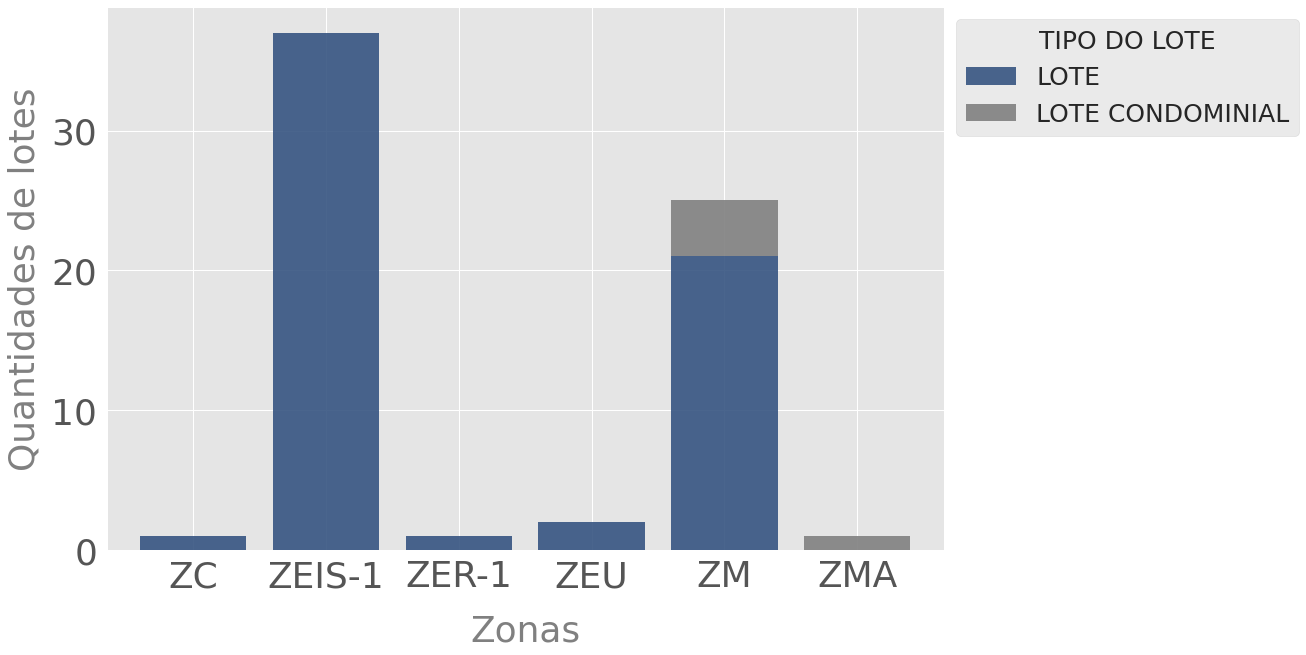

In [205]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
CL = CL_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9,color = ['#365481', 'grey'], edgecolor='None')
CL = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
CL = plt.xticks(rotation= 0 )
CL = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
CL = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE M. BOI MIRIM - MB 

In [206]:
dados.query("SGL_SUBP_E == 'MB'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    16
ZPDS       5
ZERA       2
ZEU        2
ZMA        2
ZEUA       1
Name: SGL_ZONA_0, dtype: int64

In [207]:
MB_Zonas = dados.query("SGL_SUBP_E == 'MB'")

In [208]:
MB_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
556,0,ZEIS-1
1488,0,ZEIS-1
1482,0,ZEIS-1
1473,0,ZEIS-1
1474,0,ZEIS-1
1478,0,ZEIS-1
1479,0,ZEIS-1
1469,0,ZEIS-1
1480,0,ZEIS-1
1489,0,ZEIS-1


In [209]:
MB_Zonas["COND"] = MB_Zonas["COND"].astype(int)

In [210]:
MB_Zonas["COND"] = MB_Zonas["COND"].astype(str)

In [211]:
MB_Zonas["COND"]

556     0
1488    0
1482    0
1473    0
1474    0
1478    0
1479    0
1469    0
1480    0
1489    0
1484    0
1464    0
1463    0
1487    0
1472    0
1466    0
1359    0
1358    0
1316    0
1317    0
467     0
961     0
966     0
953     0
950     0
951     0
640     0
952     0
Name: COND, dtype: object

In [212]:
MB_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

Series([], Name: COD_CNDM_Z, dtype: int64)

In [213]:
MB_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    16
ZPDS       5
ZERA       2
ZEU        2
ZMA        2
ZEUA       1
Name: SGL_ZONA_0, dtype: int64

In [214]:
MB_Cond_Zonas = MB_Zonas.query("COND != '0'")
MB_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND


In [215]:
len(MB_Cond_Zonas) 

0

In [216]:
MB_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    16
ZPDS       5
ZERA       2
ZEU        2
ZMA        2
ZEUA       1
Name: SGL_ZONA_0, dtype: int64

In [217]:
MB_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

Series([], Name: SGL_ZONA_0, dtype: int64)

In [218]:
MB_Sem_Cond_Zonas = MB_Zonas.query("COND == '0'")
MB_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
556,"ES DO EMBU-GUACU, 9887, SAO PAULO, SAO PAULO, ...",255022251828000001,255,22,251828,0,1,MB,JDA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,728513","-46,7859438",0
1488,"RUA PROF AMICIS BRANDI BERTOLOTTI, 123, SAO PA...",257013741060000018,257,13,741060,0,18,MB,JDA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,7217772","-46,7577968",0


In [219]:
len(MB_Sem_Cond_Zonas)

28

In [220]:
len(MB_Zonas) #quatidade total de zonas 

28

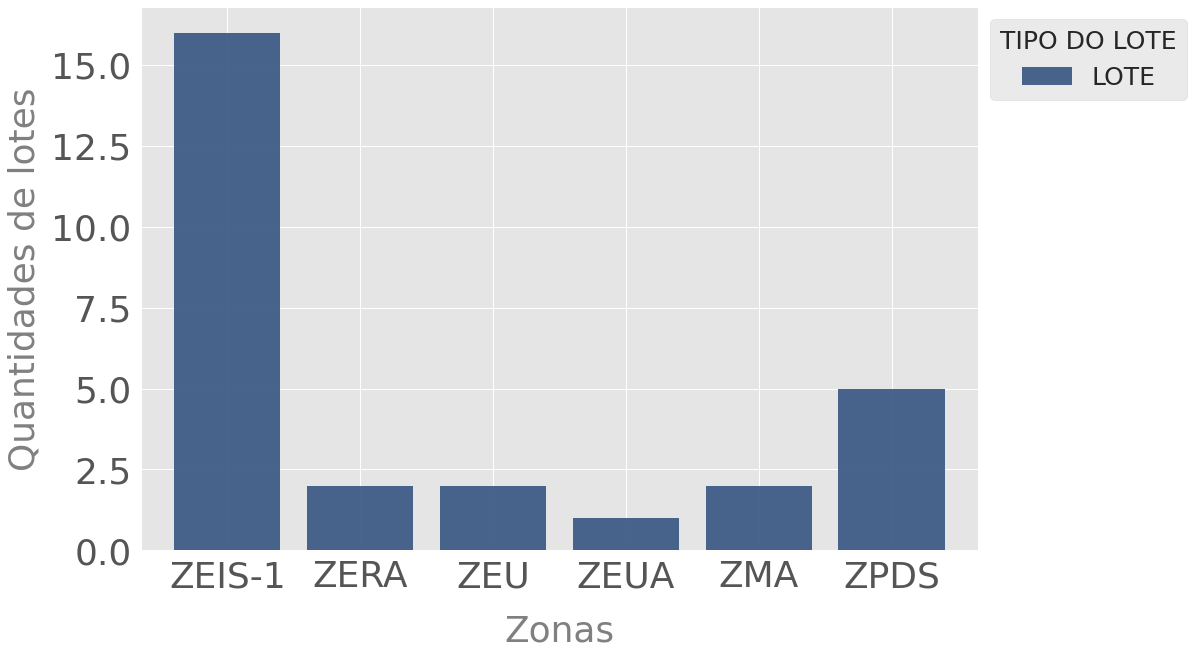

In [221]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MB = MB_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
MB = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MB = plt.xticks(rotation= 0 )
MB = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MB = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA CAPELA DO SOCORRO - SO 

In [222]:
dados.query("SGL_SUBP_E == 'SO'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZMA       12
ZEU        6
ZEIS-1     2
99         1
ZC         1
ZDE-2      1
ZERA       1
ZM         1
Name: SGL_ZONA_0, dtype: int64

In [223]:
SO_Zonas = dados.query("SGL_SUBP_E == 'SO'")

In [224]:
SO_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
137,0,99
1676,1,ZC
1645,0,ZDE-2
1465,0,ZEIS-1
1486,0,ZEIS-1
1357,0,ZERA
1315,0,ZEU
1292,0,ZEU
1312,0,ZEU
1310,0,ZEU


In [225]:
SO_Zonas["COND"] = SO_Zonas["COND"].astype(int)

In [226]:
SO_Zonas["COND"] = SO_Zonas["COND"].astype(str)

In [227]:
SO_Zonas["COND"]

137     0
1676    1
1645    0
1465    0
1486    0
1357    0
1315    0
1292    0
1312    0
1310    0
1291    0
1306    1
1093    0
957     0
956     0
958     0
955     0
959     0
474     0
965     0
963     0
834     0
835     0
962     0
960     0
Name: COND, dtype: object

In [228]:
SO_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    1
4    1
Name: COD_CNDM_Z, dtype: int64

In [229]:
SO_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZMA       12
ZEU        6
ZEIS-1     2
99         1
ZC         1
ZDE-2      1
ZERA       1
ZM         1
Name: SGL_ZONA_0, dtype: int64

In [230]:
SO_Cond_Zonas = SO_Zonas.query("COND != '0'")
SO_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1676,"RUA MARCILIO DIAS, 311, SAO PAULO, SAO PAULO, ...",93040129259010000,93,40,129259,1,0,SO,SOC,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6734791","-46,7137449",1
1306,"RUA OLIVIA GUEDES PENTEADO, 1470, SAO PAULO, S...",93025127515040000,93,25,127515,4,0,SO,SOC,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6793073","-46,7070321",1


In [231]:
len(SO_Cond_Zonas) 

2

In [232]:
SO_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts() 

ZMA       12
ZEU        5
ZEIS-1     2
99         1
ZDE-2      1
ZERA       1
ZM         1
Name: SGL_ZONA_0, dtype: int64

In [233]:
SO_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZC     1
ZEU    1
Name: SGL_ZONA_0, dtype: int64

In [234]:
SO_Sem_Cond_Zonas = SO_Zonas.query("COND == '0'")
SO_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
137,"RUA ANTONIO JOSE ANACLETO, , SAO PAULO, SAO PA...",212013226947000001,212,13,226947,0,1,SO,PRS,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4023572","-46,7395487",0
1645,"RUA FRANCISCO MENDES, 302, SAO PAULO, SAO PAUL...",93086074969000073,93,86,74969,0,73,SO,SOC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,SUL-SUDESTE,1,2021,"-23,6708419","-46,7089193",0


In [235]:
len(SO_Sem_Cond_Zonas)

23

In [236]:
len(SO_Zonas) #quatidade total de zonas

25

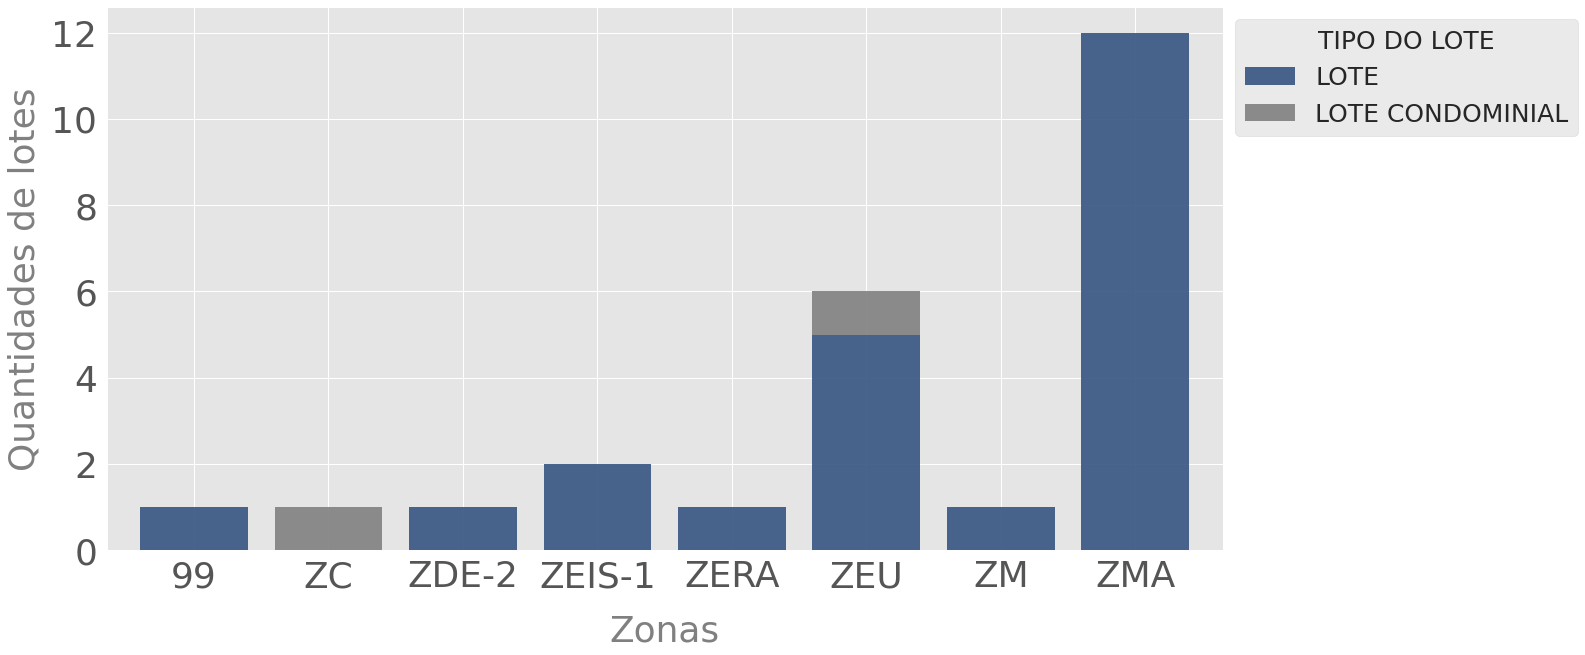

In [237]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SO = SO_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SO = plt.xticks(rotation= 0 )
SO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE PARELHEIROS - PA 

In [238]:
dados.query("SGL_SUBP_E == 'PA'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZERA    1
Name: SGL_ZONA_0, dtype: int64

In [239]:
PA_Zonas = dados.query("SGL_SUBP_E == 'PA'")

In [240]:
PA_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
551,0,ZERA


In [241]:
PA_Zonas["COND"] = PA_Zonas["COND"].astype(int)

In [242]:
PA_Zonas["COND"] = PA_Zonas["COND"].astype(str)

In [243]:
PA_Zonas["COND"]

551    0
Name: COND, dtype: object

In [244]:
PA_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

Series([], Name: COD_CNDM_Z, dtype: int64)

In [245]:
PA_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZERA    1
Name: SGL_ZONA_0, dtype: int64

In [246]:
PA_Cond_Zonas = PA_Zonas.query("COND != '0'")
PA_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND


In [247]:
PA_Sem_Cond_Zonas = PA_Zonas.query("COND == '0'")
PA_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
551,"RUA DINORA DE CARVALHO, , SAO PAULO, SAO PAULO...",263029421847000045,263,29,421847,0,45,PA,PLH,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,7457104","-46,7523104",0


In [248]:
len(PA_Sem_Cond_Zonas)

1

In [249]:
len(PA_Zonas) #quatidade total de zonas

1

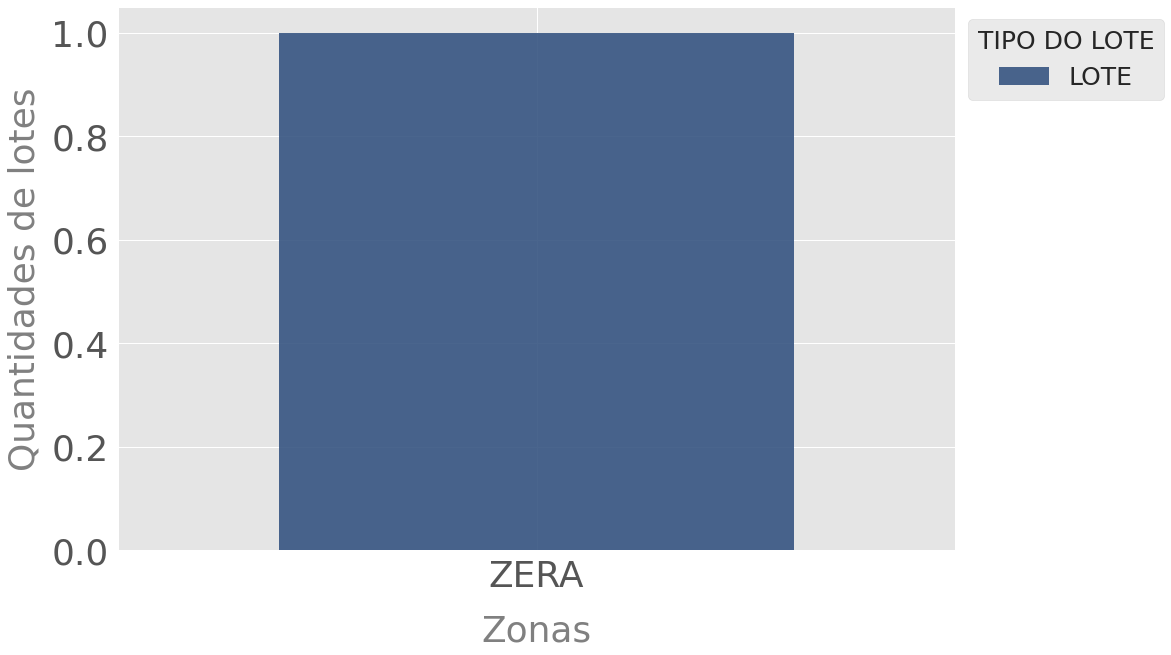

In [250]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PA = PA_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PA = plt.xticks(rotation= 0 )
PA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##NOROESTE 

##LOTES DA SUBPREFEITURA DE PERUS - PR 

In [251]:
dados.query("SGL_SUBP_E == 'PR'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM     3
ZMA    1
Name: SGL_ZONA_0, dtype: int64

In [252]:
PR_Zonas = dados.query("SGL_SUBP_E == 'PR'")

In [253]:
PR_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
151,0,ZM
2600,1,ZM
142,0,ZM
486,0,ZMA


In [254]:
PR_Zonas["COND"] = PR_Zonas["COND"].astype(int)

In [255]:
PR_Zonas["COND"] = PR_Zonas["COND"].astype(str)

In [256]:
PR_Zonas["COND"]

151     0
2600    1
142     0
486     0
Name: COND, dtype: object

In [257]:
PR_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

1    1
Name: COD_CNDM_Z, dtype: int64

In [258]:
PR_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM     3
ZMA    1
Name: SGL_ZONA_0, dtype: int64

In [259]:
PR_Cond_Zonas = PR_Zonas.query("COND != '0'")
PR_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2600,"RUA ANTONIO DE PADUA DIAS, 168,1, SAO PAULO - ...",187027016810010000,187,27,16810,1,0,PR,PRS,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,4026774","-46,747674",1


In [260]:
len(PR_Cond_Zonas) 

1

In [261]:
PR_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM     2
ZMA    1
Name: SGL_ZONA_0, dtype: int64

In [262]:
PR_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM    1
Name: SGL_ZONA_0, dtype: int64

In [263]:
PR_Sem_Cond_Zonas = PR_Zonas.query("COND == '0'")
PR_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
151,"RUA ANTONIO DE PADUA DIAS, 242, SAO PAULO, SAO...",211004016810000052,211,4,16810,0,52,PR,PRS,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4023923","-46,7483687",0
142,"RUA ANTONIO DE PADUA DIAS, 248, SAO PAULO, SAO...",211004016810000051,211,4,16810,0,51,PR,PRS,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4024398","-46,7485173",0


In [264]:
len(PR_Sem_Cond_Zonas)

3

In [265]:
len(PR_Zonas) #quatidade total de zonas

4

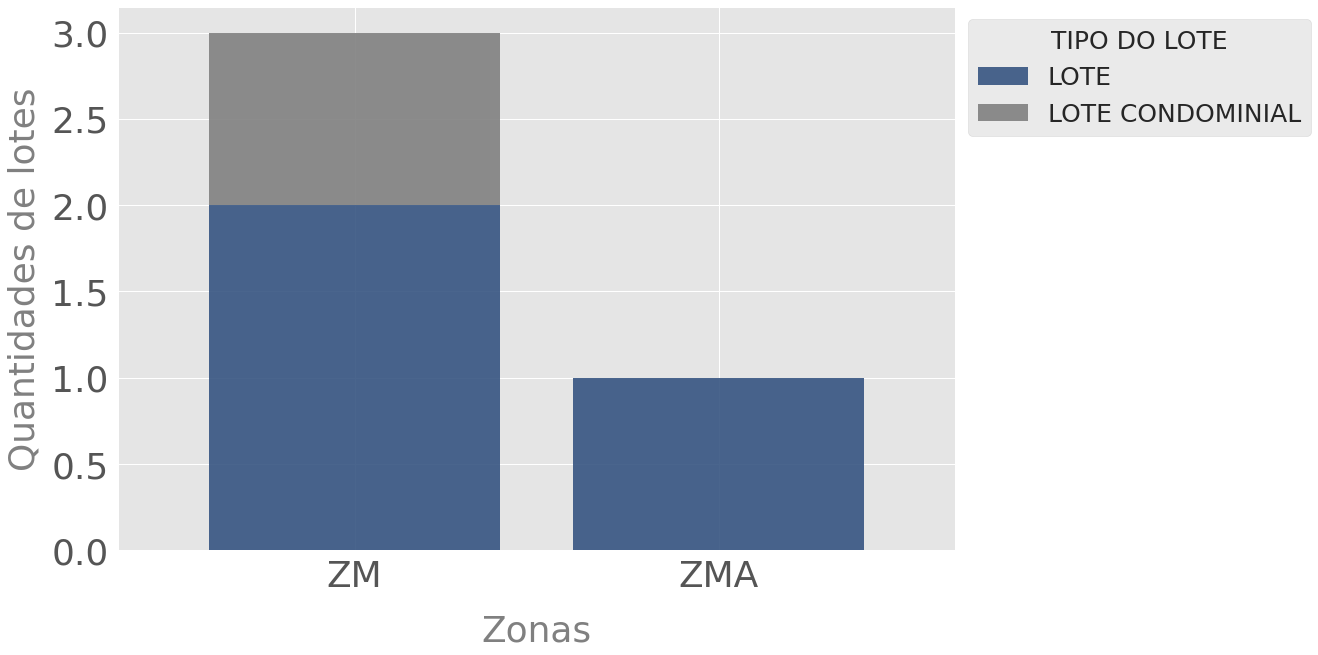

In [266]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PR = PR_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PR = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PR = plt.xticks(rotation= 0 )
PR = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PR = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE PIRITUBA - PJ 

In [267]:
dados.query("SGL_SUBP_E == 'PJ'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    36
ZM        27
ZEIS-5    22
ZC        12
99         1
ZEPAM      1
ZEU        1
ZMA        1
ZPR        1
Name: SGL_ZONA_0, dtype: int64

In [268]:
PJ_Zonas = dados.query("SGL_SUBP_E == 'PJ'")

In [269]:
PJ_Zonas["COND"] = PJ_Zonas["COND"].astype(int)

In [270]:
PJ_Zonas["COND"] = PJ_Zonas["COND"].astype(str)

In [271]:
PJ_Zonas["COND"]

1743    0
1705    0
1704    0
1703    0
1702    0
       ..
1109    0
1098    0
1111    0
2606    1
917     1
Name: COND, Length: 102, dtype: object

In [272]:
PJ_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

1    4
Name: COD_CNDM_Z, dtype: int64

In [273]:
PJ_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    36
ZM        27
ZEIS-5    22
ZC        12
99         1
ZEPAM      1
ZEU        1
ZMA        1
ZPR        1
Name: SGL_ZONA_0, dtype: int64

In [274]:
PJ_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1743,0,99
1705,0,ZC
1704,0,ZC
1703,0,ZC
1702,0,ZC
...,...,...
1109,0,ZM
1098,0,ZM
1111,0,ZM
2606,1,ZMA


In [275]:
PJ_Cond_Zonas = PJ_Zonas.query("COND != '0'")
PJ_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1695,"AVENIDA MIGUELDE CASTRO, 770, SAO PAULO, SAO P...",106254147419010000,106,254,147419,1,0,PJ,PIR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4794939","-46,7180746",1
1697,"RUA PEDRO DE LUCENA PEREIRA, 50, SAO PAULO, SA...",78312214043010000,78,312,214043,1,0,PJ,SDO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4999441","-46,7476756",1
2606,"RUA CLODOALDO JOSE, 53,1, SAO PAULO - SAO PAULO",190037650633010000,190,37,650633,1,0,PJ,JAR,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,4324992","-46,7263852",1
917,branco,78355050784010000,78,355,50784,1,0,PJ,PIR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4939521","-46,7295755",1


In [276]:
len(PJ_Cond_Zonas) 

4

In [277]:
PJ_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    36
ZM        27
ZEIS-5    22
ZC        10
99         1
ZEPAM      1
ZEU        1
Name: SGL_ZONA_0, dtype: int64

In [278]:
PJ_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZC     2
ZMA    1
ZPR    1
Name: SGL_ZONA_0, dtype: int64

In [279]:
PJ_Sem_Cond_Zonas = PJ_Zonas.query("COND == '0'")
PJ_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1743,"RUA SIMAO CAMPOS, 16, SAO PAULO, SAO PAULO, -...",126267276880000523,126,267,276880,0,523,PJ,PIR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4696713","-46,7167842",0
1705,"RUA ADEMAR MARTINS DE FREITAS, 177, SAO PAULO,...",78295213624000061,78,295,213624,0,61,PJ,SDO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,494865","-46,7482668",0


In [280]:
len(PJ_Sem_Cond_Zonas)

98

In [281]:
len(PJ_Zonas) #quatidade total de zonas

102

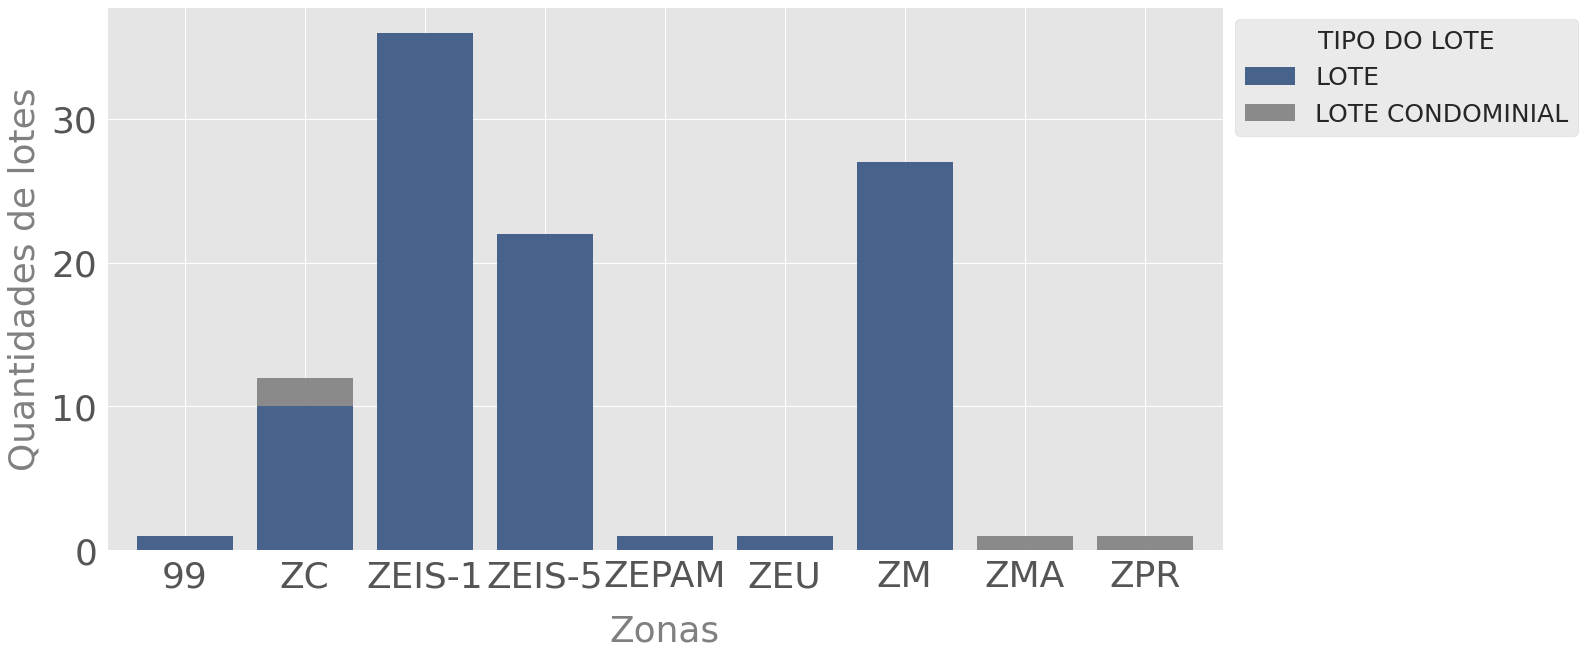

In [282]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PJ = PJ_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PJ = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PJ = plt.xticks(rotation= 0 )
PJ = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PJ = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA FREGUESIA DO Ó - FO 

In [283]:
dados.query("SGL_SUBP_E == 'FO'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        7
ZEIS-1    3
ZEU       3
ZEIS-5    2
ZC        1
Name: SGL_ZONA_0, dtype: int64

In [284]:
FO_Zonas = dados.query("SGL_SUBP_E == 'FO'")

In [285]:
FO_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1696,1,ZC
83,0,ZEIS-1
714,0,ZEIS-1
762,0,ZEIS-1
709,0,ZEIS-5
1384,1,ZEIS-5
856,0,ZEU
1326,0,ZEU
869,0,ZEU
1110,0,ZM


In [286]:
FO_Zonas["COND"] = FO_Zonas["COND"].astype(int)

In [287]:
FO_Zonas["COND"] = FO_Zonas["COND"].astype(str)

In [288]:
FO_Zonas["COND"]

1696    1
83      0
714     0
762     0
709     0
1384    1
856     0
1326    0
869     0
1110    0
1099    0
1103    0
1102    1
705     0
686     0
685     0
Name: COND, dtype: object

In [289]:
FO_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    2
4    1
Name: COD_CNDM_Z, dtype: int64

In [290]:
FO_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        7
ZEIS-1    3
ZEU       3
ZEIS-5    2
ZC        1
Name: SGL_ZONA_0, dtype: int64

In [291]:
FO_Cond_Zonas = FO_Zonas.query("COND != '0'")
FO_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1696,"RUA PARAPUA, 1295, SAO PAULO, SAO PAULO, - BR...",107224154857040000,107,224,154857,4,0,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4736155","-46,6903328",1
1384,"RUA DOM JOSE MARCONDES, 244, SAO PAULO, SAO PA...",107290110612010000,107,290,110612,1,0,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4725944","-46,6748534",1
1102,"RUA ANTONIO DE PADUA CORREIA, 38, SAO PAULO, S...",107334016802010000,107,334,16802,1,0,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4769842","-46,6886146",1


In [292]:
len(FO_Cond_Zonas) 

3

In [293]:
FO_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        6
ZEIS-1    3
ZEU       3
ZEIS-5    1
Name: SGL_ZONA_0, dtype: int64

In [294]:
FO_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZC        1
ZEIS-5    1
ZM        1
Name: SGL_ZONA_0, dtype: int64

In [295]:
FO_Sem_Cond_Zonas = FO_Zonas.query("COND == '0'")
FO_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
83,"AV PADRE ORLANDO GARCIA DA SILVEIRA, 769, SAO ...",127030157910000051,127,30,157910,0,51,FO,BRL,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,467552","-46,6789937",0
714,"RUA IPAMERI, 198, SAO PAULO, SAO PAULO, - BRASIL",107267092444000025,107,267,92444,0,25,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4727173","-46,6803357",0


In [296]:
len(FO_Sem_Cond_Zonas)

13

In [297]:
len(FO_Zonas)

16

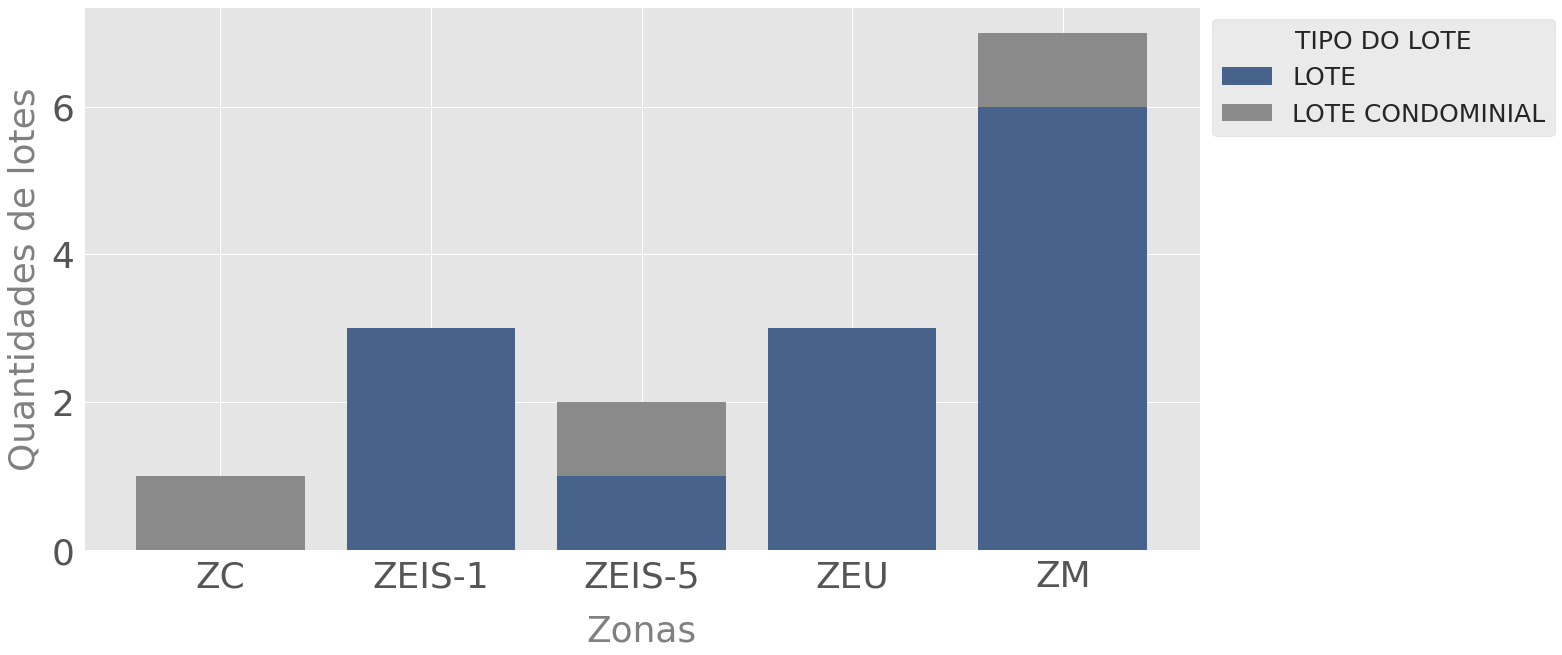

In [298]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
FO = FO_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'],edgecolor='None')
FO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
FO = plt.xticks(rotation= 0 )
FO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
FO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA CASA VERDE - CV 

In [299]:
dados.query("SGL_SUBP_E == 'CV'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM         32
ZC          9
ZERA        8
ZEU         3
ZER-1       2
ZC-ZEIS     1
ZCa         1
ZEIS-5      1
ZEMP        1
Name: SGL_ZONA_0, dtype: int64

In [300]:
CV_Zonas = dados.query("SGL_SUBP_E == 'CV'")

In [301]:
CV_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
780,0,ZC
2537,1,ZC
873,0,ZC
459,0,ZC
2548,1,ZC
528,0,ZC
842,0,ZC
763,0,ZC
838,0,ZC
20,0,ZC-ZEIS


In [302]:
CV_Zonas["COND"] = CV_Zonas["COND"].astype(int)

In [303]:
CV_Zonas["COND"] = CV_Zonas["COND"].astype(str)

In [304]:
CV_Zonas["COND"]

780     0
2537    1
873     0
459     0
2548    1
528     0
842     0
763     0
838     0
20      0
22      0
2594    1
2584    1
663     0
634     0
360     0
280     0
363     0
429     0
348     0
302     0
295     0
214     0
858     0
704     0
824     0
548     0
539     0
735     0
734     0
525     0
733     0
730     0
313     0
729     0
2591    1
175     0
289     0
174     0
261     0
720     0
173     0
158     0
239     0
807     0
401     0
865     0
102     0
567     0
199     0
200     0
387     0
894     0
206     0
352     0
351     0
798     0
356     0
Name: COND, dtype: object

In [305]:
FO_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    2
4    1
Name: COD_CNDM_Z, dtype: int64

In [306]:
FO_Zonas.query("COD_CNDM_Z != '0'")["COD_CNDM_Z"].value_counts()

0    13
1     2
4     1
Name: COD_CNDM_Z, dtype: int64

In [307]:
FO_Cond_Zonas = FO_Zonas.query("COND != '0'")
FO_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1696,"RUA PARAPUA, 1295, SAO PAULO, SAO PAULO, - BR...",107224154857040000,107,224,154857,4,0,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4736155","-46,6903328",1
1384,"RUA DOM JOSE MARCONDES, 244, SAO PAULO, SAO PA...",107290110612010000,107,290,110612,1,0,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4725944","-46,6748534",1
1102,"RUA ANTONIO DE PADUA CORREIA, 38, SAO PAULO, S...",107334016802010000,107,334,16802,1,0,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,0,"-23,4769842","-46,6886146",1


In [308]:
len(FO_Cond_Zonas) 

3

In [309]:
FO_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        6
ZEIS-1    3
ZEU       3
ZEIS-5    1
Name: SGL_ZONA_0, dtype: int64

In [310]:
FO_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZC        1
ZEIS-5    1
ZM        1
Name: SGL_ZONA_0, dtype: int64

In [311]:
FO_Sem_Cond_Zonas = FO_Zonas.query("COND == '0'")
FO_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
83,"AV PADRE ORLANDO GARCIA DA SILVEIRA, 769, SAO ...",127030157910000051,127,30,157910,0,51,FO,BRL,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,467552","-46,6789937",0
714,"RUA IPAMERI, 198, SAO PAULO, SAO PAULO, - BRASIL",107267092444000025,107,267,92444,0,25,FO,BRL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,4727173","-46,6803357",0


In [312]:
len(FO_Sem_Cond_Zonas)

13

In [313]:
len(CV_Zonas)

58

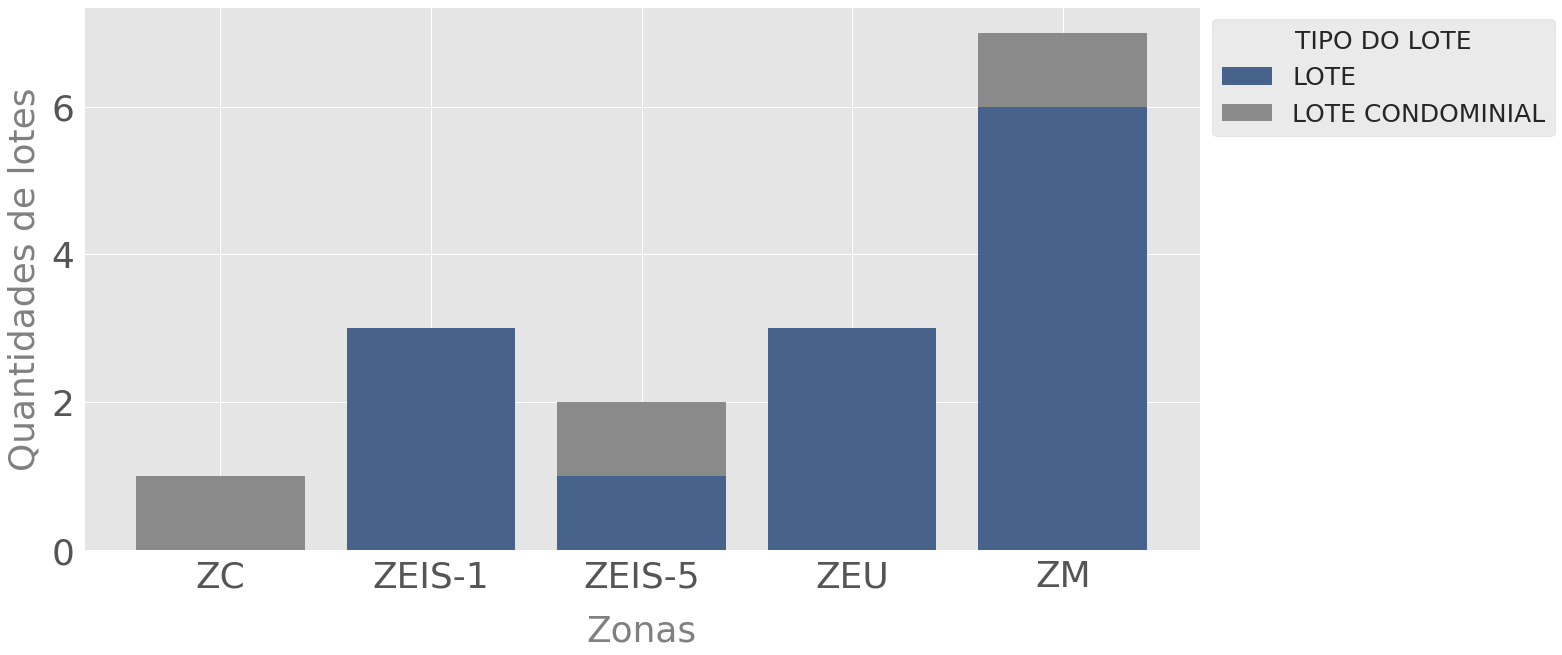

In [314]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
FO = FO_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
FO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
FO = plt.xticks(rotation= 0 )
FO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
FO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA LAPA - LA

In [315]:
dados.query("SGL_SUBP_E == 'LA'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        17
ZDE-2      7
ZC         3
ZEIS-3     1
Name: SGL_ZONA_0, dtype: int64

In [316]:
LA_Zonas = dados.query("SGL_SUBP_E == 'LA'")

In [317]:
LA_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
432,0,ZC
476,0,ZC
2567,1,ZC
1650,0,ZDE-2
1652,0,ZDE-2
1651,0,ZDE-2
1647,0,ZDE-2
1648,0,ZDE-2
1646,0,ZDE-2
1649,0,ZDE-2


In [318]:
LA_Zonas["COND"] = LA_Zonas["COND"].astype(int)

In [319]:
LA_Zonas["COND"] = LA_Zonas["COND"].astype(str)

In [320]:
LA_Zonas["COND"]

432     0
476     0
2567    1
1650    0
1652    0
1651    0
1647    0
1648    0
1646    0
1649    0
2561    1
624     0
641     0
187     0
631     0
435     0
2562    1
436     0
654     0
630     0
648     0
638     0
632     0
637     0
636     0
643     0
633     0
434     0
Name: COND, dtype: object

In [321]:
LA_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

13    2
9     1
Name: COD_CNDM_Z, dtype: int64

In [322]:
LA_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        17
ZDE-2      7
ZC         3
ZEIS-3     1
Name: SGL_ZONA_0, dtype: int64

In [323]:
LA_Cond_Zonas = LA_Zonas.query("COND != '0'")
LA_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2567,"RUA HEITOR PENTEADO, 2070,1, SAO PAULO - SAO P...",12173086150090000,12,173,86150,9,0,LA,PRD,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5418094","-46,6962485",1
2561,"AVENIDA MARQ DE SAO VICENTE, 2860,1, SAO PAULO...",197006064718130000,197,6,64718,13,0,LA,BFU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5158408","-46,6867382",1
2562,"RUA CROATA, 386,1, SAO PAULO - SAO PAULO",24040055425130000,24,40,55425,13,0,LA,LAP,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5317397","-46,7057035",1


In [324]:
len(LA_Cond_Zonas) 

3

In [325]:
LA_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM       16
ZDE-2     7
ZC        2
Name: SGL_ZONA_0, dtype: int64

In [326]:
LA_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZC        1
ZEIS-3    1
ZM        1
Name: SGL_ZONA_0, dtype: int64

In [327]:
LA_Sem_Cond_Zonas = LA_Zonas.query("COND == '0'")
LA_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
432,"RUA DOM JOAO V, 453, SAO PAULO, SAO PAULO, - ...",80038104345000075,80,38,104345,0,75,LA,LAP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5233093","-46,7090446",0
476,"RUA ANTONIO TOLEDO PIZA, 96, SAO PAULO, SAO PA...",24001018848000452,24,1,18848,0,452,LA,LAP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5261527","-46,7044808",0


In [328]:
len(LA_Sem_Cond_Zonas)

25

In [329]:
len(SO_Zonas)

25

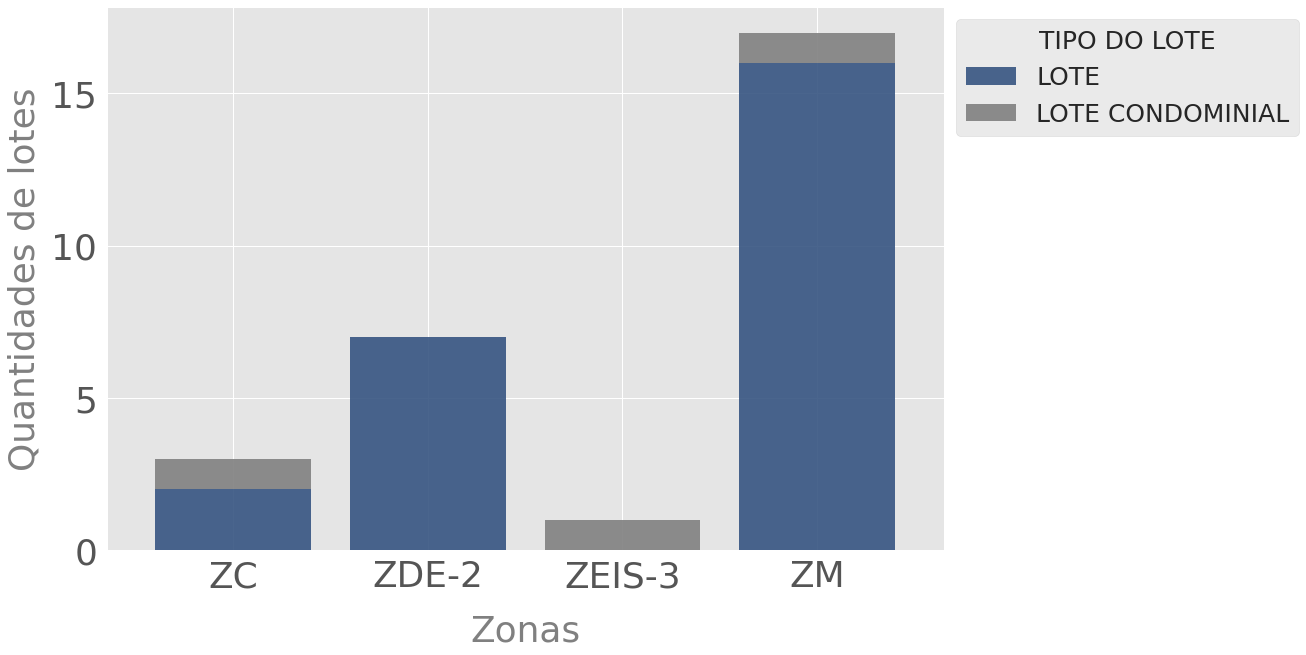

In [330]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
LA = LA_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10), width = 0.8, alpha = 0.9,color = ['#365481', 'grey'], edgecolor='None')
LA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
LA = plt.xticks(rotation= 0 )
LA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
LA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO BUTANTÃ - BT 

In [331]:
dados.query("SGL_SUBP_E == 'BT'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZMA       57
ZM        23
99         5
ZEIS-1     4
ZC         3
ZEU        3
ZMa        3
ZCa        1
ZER 1      1
Name: SGL_ZONA_0, dtype: int64

In [332]:
BT_Zonas = dados.query("SGL_SUBP_E == 'BT'")

In [333]:
BT_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
17,0,99
18,0,99
19,0,99
29,0,99
27,0,99
...,...,...
665,0,ZMA
536,0,ZMA
606,0,ZMa
658,0,ZMa


In [334]:
BT_Zonas["COND"] = BT_Zonas["COND"].astype(int)

In [335]:
BT_Zonas["COND"] = BT_Zonas["COND"].astype(str)

In [336]:
BT_Zonas["COND"]

17     0
18     0
19     0
29     0
27     0
      ..
665    0
536    0
606    0
658    0
399    0
Name: COND, Length: 100, dtype: object

In [337]:
BT_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    2
Name: COD_CNDM_Z, dtype: int64

In [338]:
BT_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZMA       57
ZM        23
99         5
ZEIS-1     4
ZC         3
ZEU        3
ZMa        3
ZCa        1
ZER 1      1
Name: SGL_ZONA_0, dtype: int64

In [339]:
BT_Cond_Zonas = BT_Zonas.query("COND != '0'")
BT_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2592,"RUA DRAUSIO, 108,1, SAO PAULO - SAO PAULO",82415061050010000,82,415,61050,1,0,BT,BUT,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5731648","-46,7090824",1
2595,"RUA JACINTO RIBEIRO, 63,1, SAO PAULO - SAO PAULO",159233622117010000,159,233,622117,1,0,BT,VSO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5925435","-46,7445299",1


In [340]:
len(BT_Cond_Zonas) 

2

In [341]:
BT_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZMA       56
ZM        23
99         5
ZEIS-1     4
ZC         3
ZMa        3
ZEU        2
ZCa        1
ZER 1      1
Name: SGL_ZONA_0, dtype: int64

In [342]:
BT_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEU    1
ZMA    1
Name: SGL_ZONA_0, dtype: int64

In [343]:
BT_Sem_Cond_Zonas = BT_Zonas.query("COND == '0'")
BT_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
17,"AV VALDEMAR FERREIRA, , SAO PAULO, SAO PAULO, ...",200040198994000019,200,40,198994,0,19,BT,BUT,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5701878","-46,7059494",0
18,"AV VALDEMAR FERREIRA, , SAO PAULO, SAO PAULO, ...",200040198994000018,200,40,198994,0,18,BT,BUT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5701878","-46,7059494",0


In [344]:
len(BT_Sem_Cond_Zonas)

98

In [345]:
len(BT_Zonas)

100

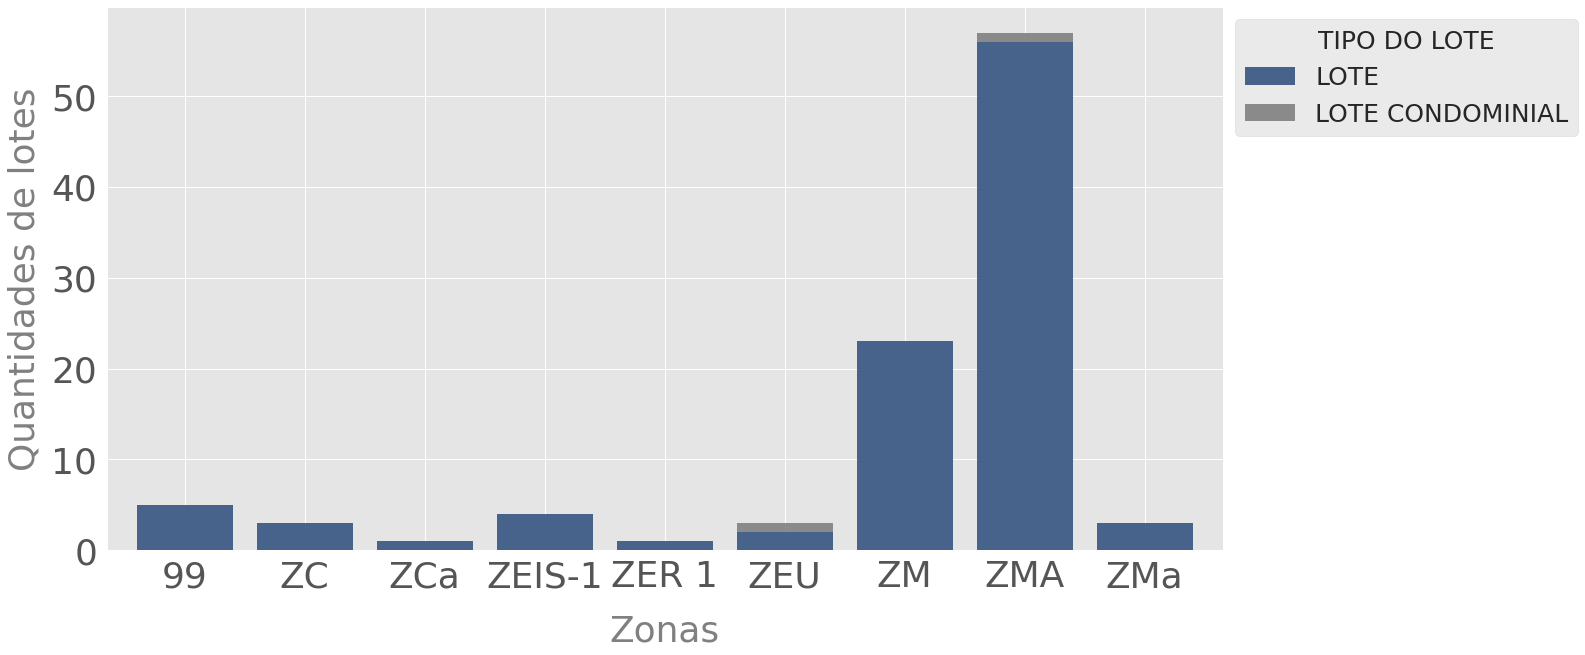

In [346]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
BT = BT_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
BT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
BT = plt.xticks(rotation= 0 )
BT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
BT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE PINHEIROS - PI 

In [347]:
dados.query("SGL_SUBP_E == 'PI'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        20
ZEU       15
ZC         7
ZER-1      4
AC-1       1
ZCOR-1     1
ZCOR-2     1
ZEUP       1
ZPR        1
Name: SGL_ZONA_0, dtype: int64

In [348]:
PI_Zonas = dados.query("SGL_SUBP_E == 'PI'")

In [349]:
PI_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
2701,1,AC-1
397,0,ZC
168,0,ZC
2539,1,ZC
2566,1,ZC
2586,1,ZC
2546,1,ZC
2571,1,ZC
591,0,ZCOR-1
2702,1,ZCOR-2


In [350]:
PI_Zonas["COND"] = PI_Zonas["COND"].astype(int)

In [351]:
PI_Zonas["COND"] = PI_Zonas["COND"].astype(str)

In [352]:
PI_Zonas["COND"]

2701    1
397     0
168     0
2539    1
2566    1
2586    1
2546    1
2571    1
591     0
2702    1
578     0
374     0
292     0
562     0
2556    1
2604    1
2568    1
2564    1
2560    1
2621    1
2578    1
2572    1
795     0
143     0
600     0
881     0
2553    1
215     0
232     0
747     0
182     0
2589    1
2590    1
2587    1
183     0
225     0
204     0
2565    1
2547    1
2608    1
116     0
2545    1
2576    1
552     0
403     0
2620    1
628     0
2563    1
121     0
178     0
2603    1
Name: COND, dtype: object

In [353]:
PI_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

2     6
1     5
3     4
5     3
6     2
15    2
11    1
9     1
22    1
14    1
8     1
Name: COD_CNDM_Z, dtype: int64

In [354]:
PI_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        20
ZEU       15
ZC         7
ZER-1      4
AC-1       1
ZCOR-1     1
ZCOR-2     1
ZEUP       1
ZPR        1
Name: SGL_ZONA_0, dtype: int64

In [355]:
PI_Cond_Zonas = PI_Zonas.query("COND != '0'")
PI_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2701,"RUA CRISTIANO VIANA, 950, SAO PAULO, SAO PAULO...",13020055077050000,13,20,55077,5,0,PI,JDP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5550053","-46,6799278",1
2539,"RUA DR RENATO PAES DE BARROS, 618,1, SAO PAULO...",16103105562030000,16,103,105562,3,0,PI,IBI,E,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5839907","-46,6738091",1
2566,"RUA LISBOA, 423,1, SAO PAULO - SAO PAULO",13047119350110000,13,47,119350,11,0,PI,JDP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5605567","-46,6791764",1
2586,"RUA JACERU, 247,1, SAO PAULO - SAO PAULO",85589097659020000,85,589,97659,2,0,PI,IBI,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,6226864","-46,6930028",1
2546,"RUA MOURATO COELHO , 461,1, SAO PAULO - SAO PAULO",15016142824030000,15,16,142824,3,0,PI,PIN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5632465","-46,6879168",1
2571,"RUA TEODORO SAMPAIO, 1245,1, SAO PAULO - SAO P...",13054188131060000,13,54,188131,6,0,PI,PIN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5601377","-46,6815381",1
2702,"AVENIDA BRIGADEIRO FARIA LIMA, 1795, SAO PAULO...",15094068977010000,15,94,68977,1,0,PI,PIN,1,...,ZEPEC-AUE.,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5726629","-46,6889832",1
2556,"RUA JOAO MOURA, 2370,1, SAO PAULO - SAO PAULO",81079103870020000,81,79,103870,2,0,PI,PIN,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5485195","-46,6880592",1
2604,"RUA DOS PINHEIROS, 801,1, SAO PAULO - SAO PAULO",15039162639010000,15,39,162639,1,0,PI,PIN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,56702","-46,6857007",1
2568,"RUA CAPOTE VALENTE , 1475,1, SAO PAULO - SAO P...",11069042005090000,11,69,42005,9,0,PI,PIN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NOROESTE,1,2021,"-23,5499651","-46,6811069",1


In [356]:
len(PI_Cond_Zonas) 

27

In [357]:
PI_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        10
ZEU        6
ZER-1      4
ZC         2
ZCOR-1     1
ZEUP       1
Name: SGL_ZONA_0, dtype: int64

In [358]:
PI_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM        10
ZEU        9
ZC         5
AC-1       1
ZCOR-2     1
ZPR        1
Name: SGL_ZONA_0, dtype: int64

In [359]:
PI_Sem_Cond_Zonas = PI_Zonas.query("COND == '0'")
PI_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
397,"RUA AUGUSTA, , SAO PAULO, SAO PAULO, - BRASIL",14003024970000240,14,3,24970,0,240,PI,JDP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5569581","-46,6589677",0
168,"RUA CRISTIANO VIANA, 738, SAO PAULO, SAO PAULO...",13021055077000717,13,21,55077,0,717,PI,JDP,4,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5566921","-46,6788828",0


In [360]:
len(PI_Sem_Cond_Zonas)

24

In [361]:
len(PI_Zonas)

51

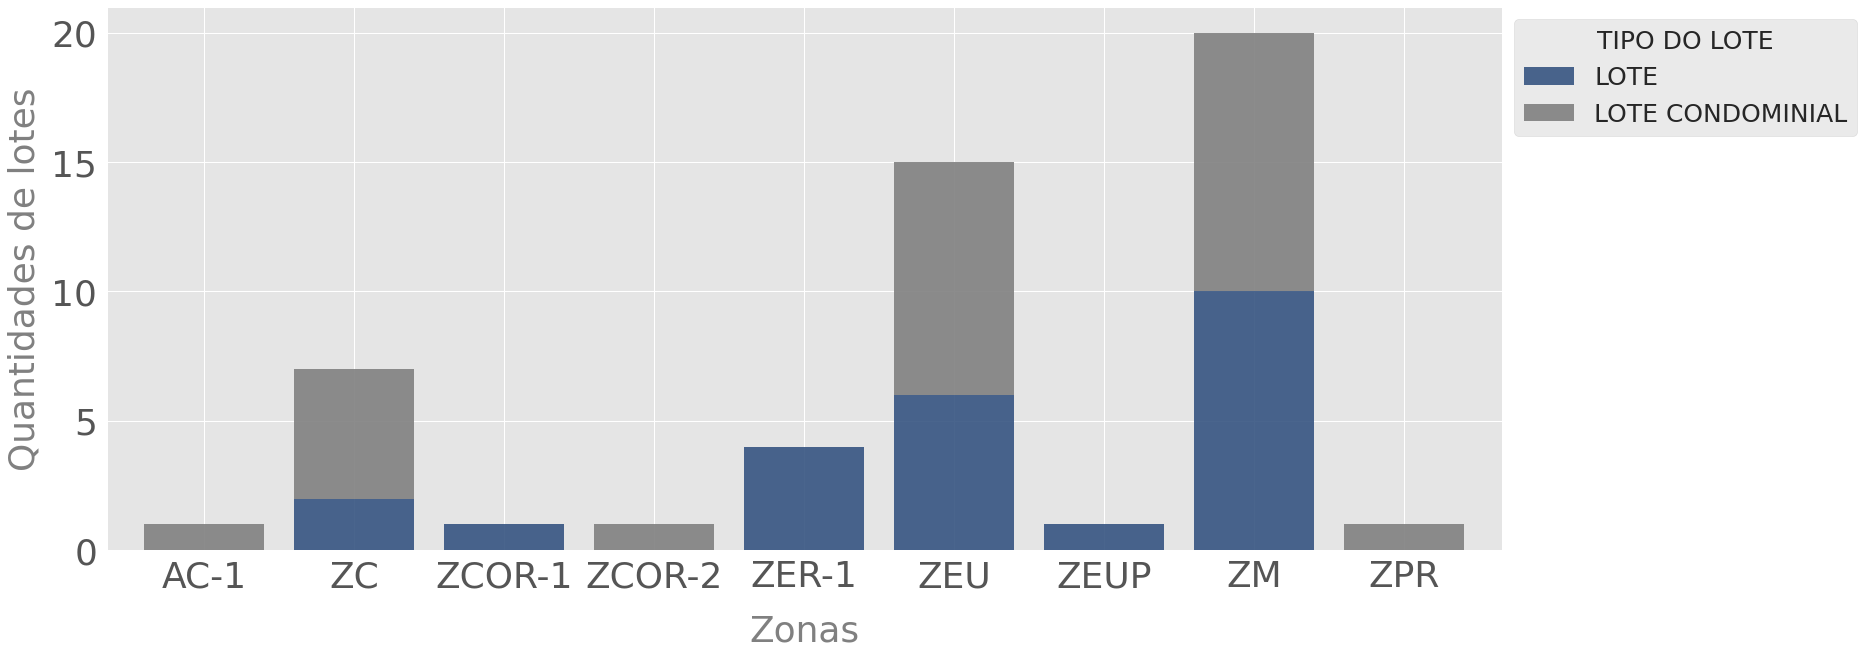

In [362]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PI = PI_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PI = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PI = plt.xticks(rotation= 0 )
PI = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PI = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LESTE-1 

##LOTES D SUBPREFEITURA DA PENHA - PE 

In [363]:
dados.query("SGL_SUBP_E == 'PE'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        85
ZEU       32
ZC        19
ZEUP       4
ZEIS-3     1
ZEIS-5     1
Name: SGL_ZONA_0, dtype: int64

In [364]:
PE_Zonas = dados.query("SGL_SUBP_E == 'PE'")

In [365]:
PE_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
860,0,ZC
696,0,ZC
99,0,ZC
814,0,ZC
818,0,ZC
...,...,...
594,0,ZM
220,0,ZM
607,0,ZM
466,0,ZM


In [366]:
PE_Zonas["COND"] = PE_Zonas["COND"].astype(int)

In [367]:
PE_Zonas["COND"] = PE_Zonas["COND"].astype(str)

In [368]:
PE_Zonas["COND"]

860    0
696    0
99     0
814    0
818    0
      ..
594    0
220    0
607    0
466    0
367    0
Name: COND, Length: 142, dtype: object

In [369]:
PE_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

1    9
2    8
3    8
4    4
5    2
6    1
7    1
Name: COD_CNDM_Z, dtype: int64

In [370]:
PE_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        85
ZEU       32
ZC        19
ZEUP       4
ZEIS-3     1
ZEIS-5     1
Name: SGL_ZONA_0, dtype: int64

In [371]:
PE_Cond_Zonas = PE_Zonas.query("COND != '0'")
PE_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2624,"AVENIDA AMADOR BUENO DA VEIGA, 482, SAO PAULO,...",61032009547010000,61,32,9547,1,0,PE,PEN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5222971","-46,5401857",1
2687,"RUA ABADIANIA, 538, SAO PAULO, SAO PAULO - BRASIL",58107000060010000,58,107,60,1,0,PE,VMT,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,535765","-46,5185345",1
2627,"RUA TAPERACU, 286, SAO PAULO, SAO PAULO - BRASIL",142087186813020000,142,87,186813,2,0,PE,AAL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5407986","-46,4778627",1
2659,"RUA RODOLFO, 152, SAO PAULO, SAO PAULO - BRASIL",59166172570040000,59,166,172570,4,0,PE,PEN,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5258058","-46,5102991",1
2629,"RUA DESEMBARGADOR CARNEIRO RIBEIRO, 57, SAO PA...",113553044814010000,113,553,44814,1,0,PE,AAL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5395699","-46,4877383",1
2636,"RUA TRAPICHE, 183, SAO PAULO, SAO PAULO - BRASIL",113010191167050000,113,10,191167,5,0,PE,VMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5314242","-46,5061519",1
2628,"RUA PEDRO TALARICO, 1259, SAO PAULO, SAO PAULO...",146108304190010000,146,108,304190,1,0,PE,VMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5484695","-46,5064776",1
2632,"RUA BOIPEVACU, 16, SAO PAULO, SAO PAULO - BRASIL",142084034339020000,142,84,34339,2,0,PE,AAL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5409861","-46,4796689",1
2635,"RUA HENRIQUE JACOBS, 132, SAO PAULO, SAO PAULO...",113165086924040000,113,165,86924,4,0,PE,AAL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5368862","-46,4924821",1
2655,"RUA AMARO BEZERRA CAVALCANTI, 694, SAO PAULO, ...",58045010120060000,58,45,10120,6,0,PE,VMT,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5327705","-46,5238777",1


In [372]:
len(PE_Cond_Zonas) 


33

In [373]:
len(PE_Zonas)

142

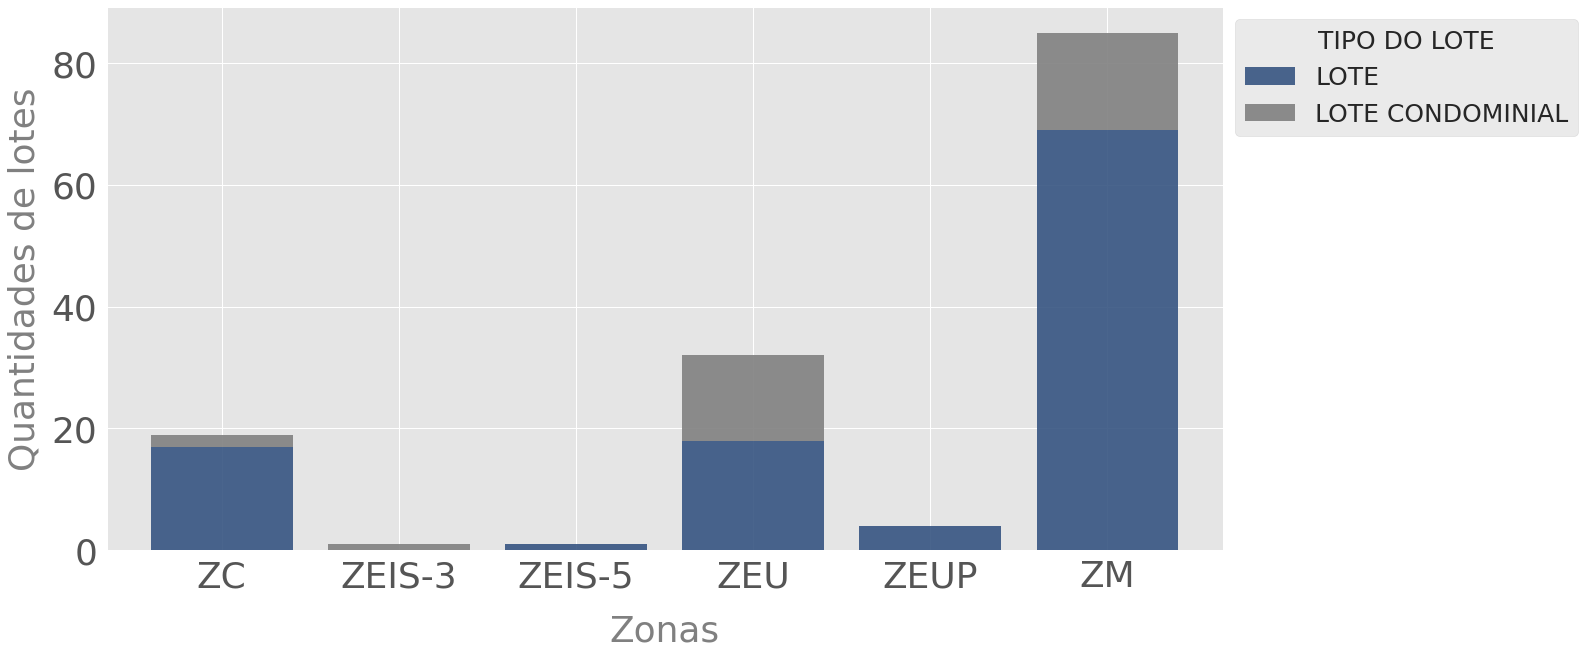

In [374]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PE = PE_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PE = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PE = plt.xticks(rotation= 0 )
PE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PE = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA MOOCA - MO 

In [375]:
dados.query("SGL_SUBP_E == 'MO'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura

ZM        34
ZC        12
ZEUP      12
ZEU       11
ZEIS-3     9
ZDE-1      3
Name: SGL_ZONA_0, dtype: int64

In [376]:
MO_Zonas = dados.query("SGL_SUBP_E == 'MO'")

In [377]:
MO_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
2679,1,ZC
334,0,ZC
118,0,ZC
127,0,ZC
128,0,ZC
...,...,...
2666,1,ZM
48,0,ZM
2692,1,ZM
2693,1,ZM


In [378]:
MO_Zonas["COND"] = MO_Zonas["COND"].astype(int)

In [379]:
MO_Zonas["COND"] = MO_Zonas["COND"].astype(str)

In [380]:
MO_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    9
2    4
4    2
3    2
9    1
6    1
Name: COD_CNDM_Z, dtype: int64

In [381]:
MO_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        34
ZC        12
ZEUP      12
ZEU       11
ZEIS-3     9
ZDE-1      3
Name: SGL_ZONA_0, dtype: int64

In [382]:
MO_Zonas["COND"]

2679    1
334     0
118     0
127     0
128     0
       ..
2666    1
48      0
2692    1
2693    1
346     0
Name: COND, Length: 81, dtype: object

In [383]:
MO_Cond_Zonas = MO_Zonas.query("COND != '0'")
MO_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2679,"RUA ITABAIANA, 88, SAO PAULO, SAO PAULO - BRASIL",31001094161010000,31,1,94161,1,0,MO,MOO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5478252","-46,5929064",1
2691,"RUA MIRANDA JORDAO, 57, SAO PAULO, SAO PAULO -...",53113140252010000,53,113,140252,1,0,MO,ARA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5736769","-46,556637",1
2658,"RUA ERNESTO DE CASTRO, 235, SAO PAULO, SAO PAU...",3060065625040000,3,60,65625,4,0,MO,BRS,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5510088","-46,6143215",1
2625,"RUA CATUAMA, 42, SAO PAULO, SAO PAULO - BRASIL",102006046256010000,102,6,46256,1,0,MO,ARA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5743643","-46,5633478",1
2690,"RUA GUARAPUAVA, 174, SAO PAULO, SAO PAULO - BR...",27022083739010000,27,22,83739,1,0,MO,MOO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5474158","-46,6057637",1
2654,"AVENIDA CELSO GARCIA, 1459, SAO PAULO, SAO PAU...",196018047368090000,196,18,47368,9,0,MO,BEL,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,537906","-46,5982102",1
2682,"RUA SERRA DA BOCAINA, 547, SAO PAULO, SAO PAUL...",29052180564010000,29,52,180564,1,0,MO,BEL,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5457017","-46,5861613",1
2678,"RUA CLAUDIO FURQUIM, 40, SAO PAULO, SAO PAULO ...",56151050520010000,56,151,50520,1,0,MO,TAT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5350192","-46,5583418",1
2633,"RUA BARAO DE CACAOAVA, 60, SAO PAULO, SAO PAUL...",102101037800010000,102,101,37800,1,0,MO,ARA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5784639","-46,5593698",1
2660,"RUA TOLEDO BARBOSA, 326, SAO PAULO, SAO PAULO ...",29040190357040000,29,40,190357,4,0,MO,BEL,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NORTE,1,2021,"-23,5418017","-46,5878686",1


In [384]:
len(MO_Cond_Zonas)

19

In [385]:
MO_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        28
ZEUP      11
ZC         8
ZEIS-3     7
ZEU        5
ZDE-1      3
Name: SGL_ZONA_0, dtype: int64

In [386]:
MO_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()


ZEU       6
ZM        6
ZC        4
ZEIS-3    2
ZEUP      1
Name: SGL_ZONA_0, dtype: int64

In [387]:
MO_Sem_Cond_Zonas = MO_Zonas.query("COND == '0'")
MO_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
334,"RUA SERRA DE JAIRE, 720, SAO PAULO, SAO PAULO,...",29077180700000444,29,77,180700,0,444,MO,BEL,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5491707","-46,585799",0
118,"RUA SAO BERNARDO, , SAO PAULO, SAO PAULO, - B...",30107032913000136,30,107,32913,0,136,MO,TAT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5489185","-46,5777178",0


In [388]:
len(MO_Sem_Cond_Zonas)

62

In [389]:
len(MO_Zonas)

81

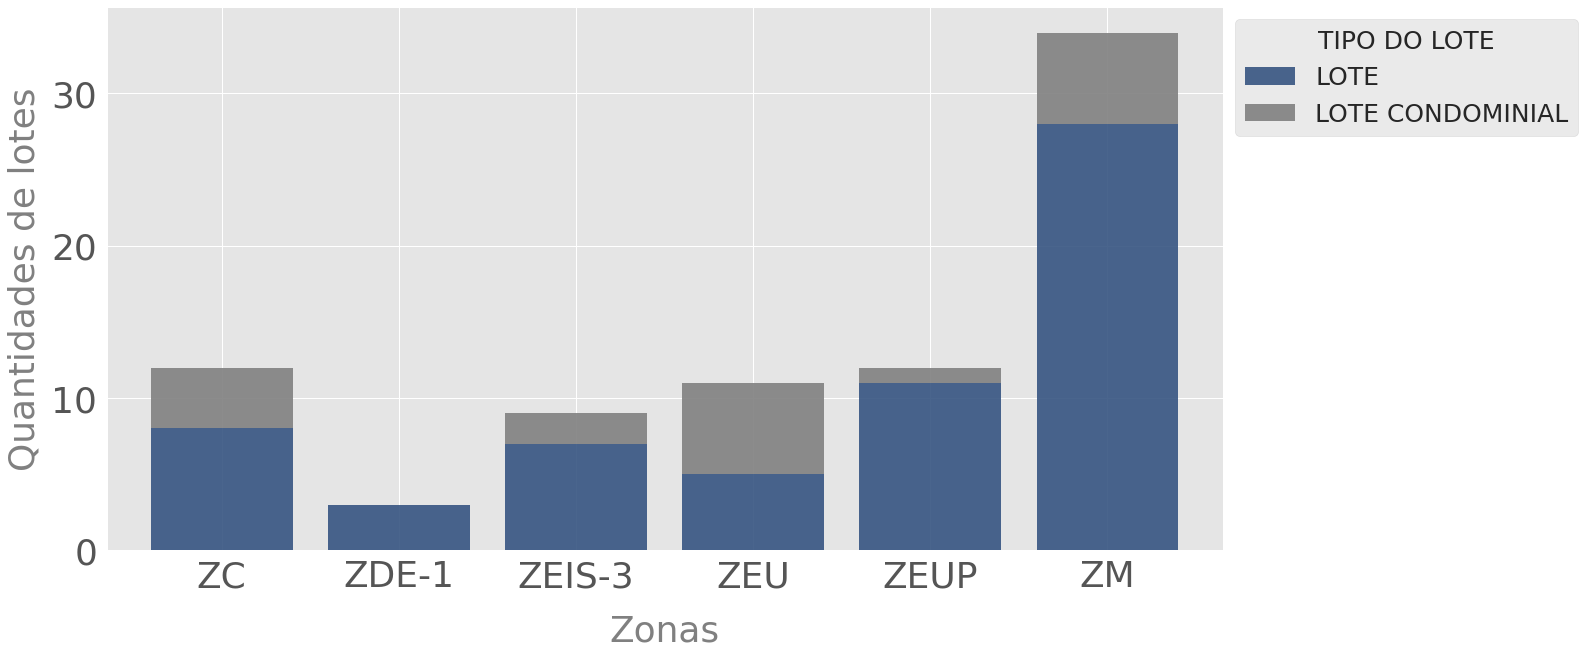

In [390]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MO= MO_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
MO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MO = plt.xticks(rotation= 0 )
MO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE ARICANDUVA - AR 

In [391]:
dados.query("SGL_SUBP_E == 'AR'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        46
ZEUP       6
ZC         3
ZEIS-1     2
ZEU        2
Name: SGL_ZONA_0, dtype: int64

In [392]:
AR_Zonas = dados.query("SGL_SUBP_E == 'AR'")

In [393]:
AR_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1721,1,ZC
97,0,ZC
2677,1,ZC
307,0,ZEIS-1
529,0,ZEIS-1
2673,1,ZEU
2684,1,ZEU
1272,1,ZEUP
93,0,ZEUP
291,0,ZEUP


In [394]:
AR_Zonas["COND"] = AR_Zonas["COND"].astype(int)

In [395]:
AR_Zonas["COND"] = AR_Zonas["COND"].astype(str)

In [396]:
AR_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

2    10
1    10
4     4
Name: COD_CNDM_Z, dtype: int64

In [397]:
AR_Zonas["COND"]

1721    1
97      0
2677    1
307     0
529     0
2673    1
2684    1
1272    1
93      0
291     0
1262    1
1261    1
2637    1
1187    1
566     0
283     0
1132    1
1129    1
2686    1
2661    1
1130    1
2671    1
690     0
167     0
198     0
85      0
212     0
744     0
584     0
462     0
410     0
245     0
398     0
2683    1
831     0
1131    1
2642    1
891     0
527     0
906     0
2643    1
264     0
180     0
893     0
2672    1
1188    1
843     0
882     0
750     0
2645    1
751     0
900     0
1133    1
1134    1
537     0
830     0
382     0
672     0
262     0
Name: COND, dtype: object

In [398]:
AR_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        46
ZEUP       6
ZC         3
ZEIS-1     2
ZEU        2
Name: SGL_ZONA_0, dtype: int64

In [399]:
AR_Cond_Zonas = AR_Zonas.query("COND != '0'")
AR_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1721,"RUA LIMA, 45, SAO PAULO, SAO PAULO, - BRASIL",53126118656020000,53,126,118656,2,0,AR,VFO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5768626","-46,546224",1
2677,"RUA LIMA, 45, SAO PAULO, SAO PAULO - BRASIL",53126118656020000,53,126,118656,2,0,AR,VFO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5768626","-46,546224",1
2673,"RUA CROMINIA, 69, SAO PAULO, SAO PAULO - BRASIL",55296660531020000,55,296,660531,2,0,AR,VFO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5599683","-46,5483169",1
2684,"RUA RENATO RINALDI, 561, SAO PAULO, SAO PAULO ...",55056169900010000,55,56,169900,1,0,AR,CAR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5503347","-46,5411544",1
1272,"RUA RENATO RINALDI, 561, SAO PAULO, SAO PAULO,...",55056169900010000,55,56,169900,1,0,AR,CAR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5503347","-46,5411544",1
1262,"RUA JOAO DOMINGUES OLIVEIRA, 14, SAO PAULO, SA...",116280132381010000,116,280,132381,1,0,AR,CAR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5528235","-46,5214995",1
1261,"RUA CROMINIA, 69, SAO PAULO, SAO PAULO, - BRASIL",55296660531020000,55,296,660531,2,0,AR,VFO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5599683","-46,5483169",1
2637,"RUA JOAO DOMINGUES OLIVEIRA, 14, SAO PAULO, SA...",116280132381010000,116,280,132381,1,0,AR,CAR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5529187","-46,52148",1
1187,"RUA ASCENSAO, 48, SAO PAULO, SAO PAULO, - BRASIL",55160023922020000,55,160,23922,2,0,AR,VFO,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5595181","-46,54451",1
1132,"PC PLATAO, 12, SAO PAULO, SAO PAULO, - BRASIL",55248164208010000,55,248,164208,1,0,AR,VFO,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5682297","-46,5390232",1


In [400]:
len(AR_Cond_Zonas) 

24

In [401]:
AR_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        30
ZEIS-1     2
ZEUP       2
ZC         1
Name: SGL_ZONA_0, dtype: int64

In [402]:
AR_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM      16
ZEUP     4
ZC       2
ZEU      2
Name: SGL_ZONA_0, dtype: int64

In [403]:
AR_Sem_Cond_Zonas = AR_Zonas.query("COND == '0'")
AR_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
97,"RUA DONA VITORIA SPEERS, 66, SAO PAULO, SAO PA...",53007198609000227,53,7,198609,0,227,AR,VFO,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5702129","-46,5505431",0
307,"RUA BENEDITO ANTONIO SILVERIO, 11, SAO PAULO, ...",116041718823000070,116,41,718823,0,70,AR,CAR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5550199","-46,5187444",0


In [404]:
len(AR_Sem_Cond_Zonas)

35

In [405]:
len(AR_Zonas)

59

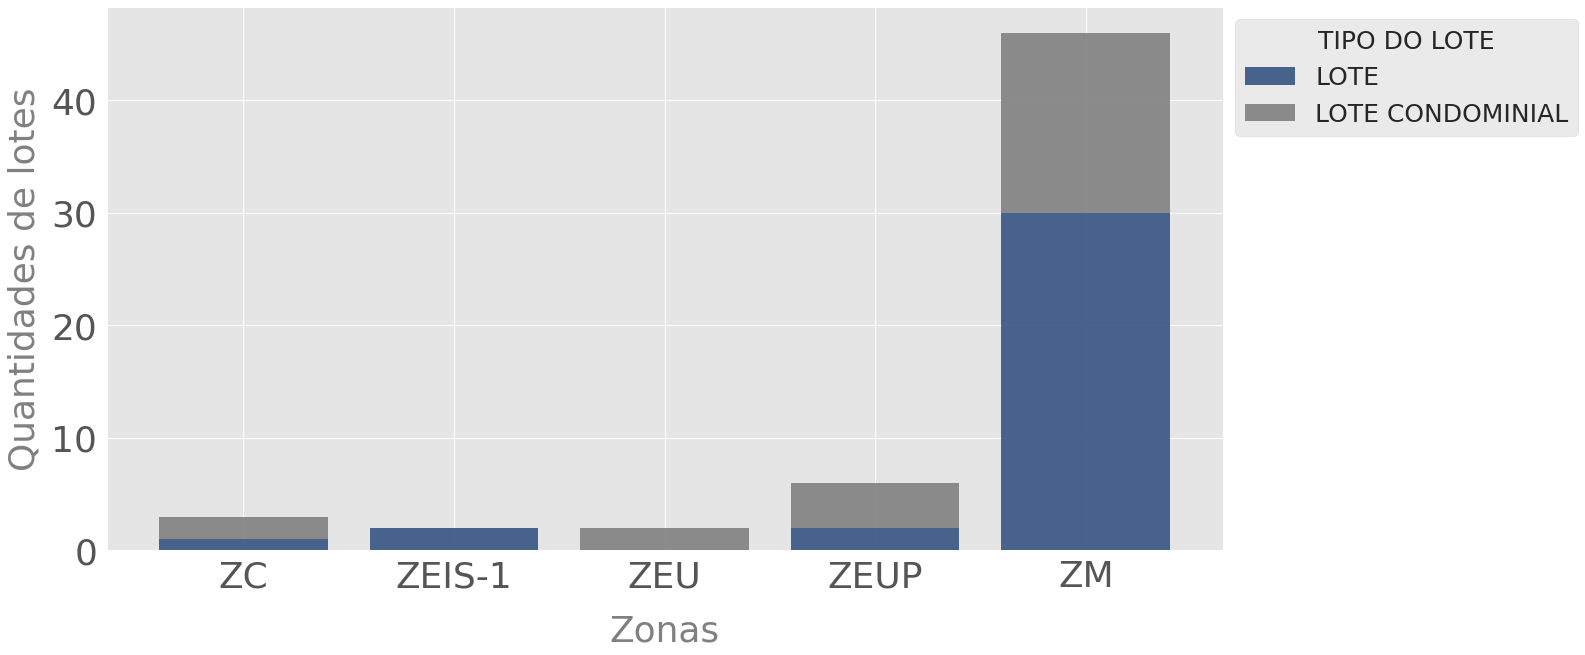

In [406]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
AR = AR_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
AR = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
AR = plt.xticks(rotation= 0 )
AR = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
AR = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA VILA PRUDENTE - VP

In [407]:
dados.query("SGL_SUBP_E == 'VP'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM       43
ZEU      11
ZC       10
ZPI-1     2
ZEUP      1
Name: SGL_ZONA_0, dtype: int64

In [408]:
VP_Zonas = dados.query("SGL_SUBP_E == 'VP'")

In [409]:
VP_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
585,0,ZC
741,0,ZC
806,0,ZC
223,0,ZC
192,0,ZC
...,...,...
775,0,ZM
872,0,ZM
832,0,ZM
777,0,ZPI-1


In [410]:
VP_Zonas["COND"] = VP_Zonas["COND"].astype(int)

In [411]:
VP_Zonas["COND"] = VP_Zonas["COND"].astype(str)

In [412]:
VP_Zonas["COND"]

585    0
741    0
806    0
223    0
192    0
      ..
775    0
872    0
832    0
777    0
770    0
Name: COND, Length: 67, dtype: object

In [413]:
VP_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    5
2    4
3    1
Name: COD_CNDM_Z, dtype: int64

In [414]:
VP_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM       43
ZEU      11
ZC       10
ZPI-1     2
ZEUP      1
Name: SGL_ZONA_0, dtype: int64

In [415]:
VP_Cond_Zonas = VP_Zonas.query("COND != '0'")
VP_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2631,"RUA GLORIA DO GOITA, 327, SAO PAULO, SAO PAULO...",118347787272020000,118,347,787272,2,0,VP,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5846","-46,5590064",1
2634,"RUA FIDELIS PAPINI, 171, SAO PAULO, SAO PAULO ...",100058170704010000,100,58,170704,1,0,VP,VPR,E,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5818515","-46,5807372",1
1338,"RUA FIDELIS PAPINI, 171, SAO PAULO, SAO PAULO,...",100058170704010000,100,58,170704,1,0,VP,VPR,E,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5818515","-46,5807372",1
2644,"RUA ANHUMAS, 320, SAO PAULO, SAO PAULO - BRASIL",117276014338020000,117,276,14338,2,0,VP,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5882125","-46,5389119",1
2647,"RUA SAO JOSE DAS ESPINHARAS, 320, SAO PAULO, S...",118478612529010000,118,478,612529,1,0,VP,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,6039477","-46,5332824",1
2646,"RUA PADRE PEDRO ROTA, 339, SAO PAULO, SAO PAUL...",118254159786020000,118,254,159786,2,0,VP,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,593628","-46,5526212",1
2639,"RUA GIRASSOL MIUDO, 434, SAO PAULO, SAO PAULO ...",156071701939010000,156,71,701939,1,0,VP,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,6081476","-46,5349066",1
2676,"RUA MARECHAL MALET, 91, SAO PAULO, SAO PAULO -...",44090125431020000,44,90,125431,2,0,VP,VPR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5887225","-46,5809965",1
2685,"RUA BISPO EUGENIO DEMAZEMOD, 388, SAO PAULO, S...",51089067628010000,51,89,67628,1,0,VP,VPR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5971268","-46,5610869",1
2664,"RUA DOS RAINUNCULOS, 159, SAO PAULO, SAO PAULO...",51066168432030000,51,66,168432,3,0,VP,VPR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,5953915","-46,5639485",1


In [416]:
len(VP_Cond_Zonas) 

10

In [417]:
VP_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM       36
ZC       10
ZEU       8
ZPI-1     2
ZEUP      1
Name: SGL_ZONA_0, dtype: int64

In [418]:
VP_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM     7
ZEU    3
Name: SGL_ZONA_0, dtype: int64

In [419]:
VP_Sem_Cond_Zonas = VP_Zonas.query("COND == '0'")
VP_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
585,"RUA MANDERA, 179, SAO PAULO, SAO PAULO, - BRASIL",51100125849000066,51,100,125849,0,66,VP,VPR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,6003266","-46,5659075",0
741,"RUA SOLIDONIO LEITE, 1927, SAO PAULO, SAO PAUL...",117363184080000382,117,363,184080,0,382,VP,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5844282","-46,5402704",0


In [420]:
len(VP_Sem_Cond_Zonas)

57

In [421]:
len(VP_Zonas)

67

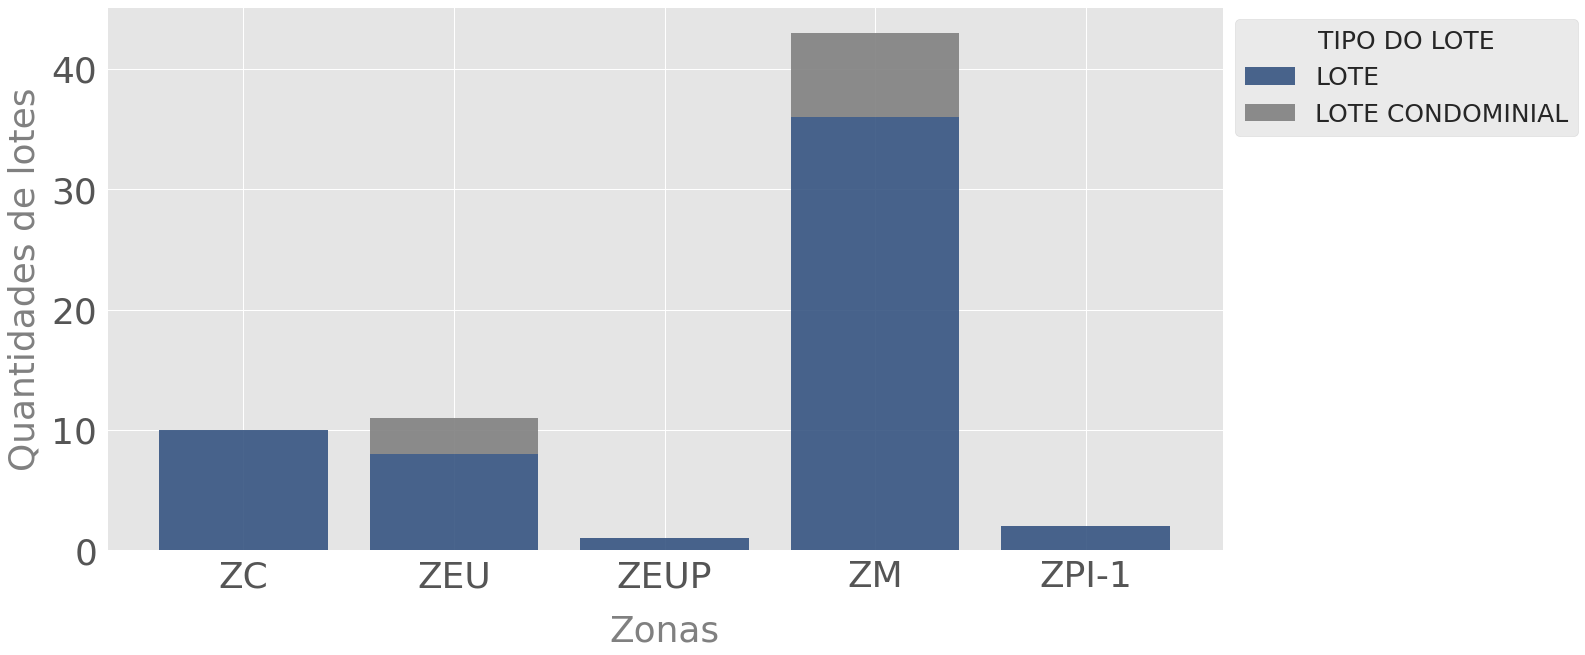

In [422]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
VP = VP_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
VP = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
VP = plt.xticks(rotation= 0 )
VP = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
VP = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LESTE-2 

##LOTES DA SUBPREFEITURA DA EMERLINO MATARAZZO - EM 

In [423]:
dados.query("SGL_SUBP_E == 'EM'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        22
ZC        13
ZEIS-3     8
ZEUP       8
ZEIS-1     2
ZEIS-5     2
ZEU        2
Name: SGL_ZONA_0, dtype: int64

In [424]:
EM_Zonas = dados.query("SGL_SUBP_E == 'EM'")

In [425]:
EM_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1712,0,ZC
1713,0,ZC
1732,0,ZC
1715,1,ZC
1740,0,ZC
1741,0,ZC
1716,0,ZC
902,0,ZC
1722,0,ZC
1733,0,ZC


In [426]:
EM_Zonas["COND"] = EM_Zonas["COND"].astype(int)

In [427]:
EM_Zonas["COND"] = EM_Zonas["COND"].astype(str)

In [428]:
EM_Zonas["COND"]

1712    0
1713    0
1732    0
1715    1
1740    0
1741    0
1716    0
902     0
1722    0
1733    0
1719    1
1717    0
904     0
1579    1
1546    0
1409    0
1412    0
1413    0
1417    0
1411    0
1414    0
1415    0
1410    0
1403    1
1404    0
1354    0
1352    0
1268    0
1267    0
739     0
1271    1
1270    0
1269    1
1263    0
1265    1
1153    0
1150    0
1152    0
1146    0
1142    0
1135    0
194     0
1138    1
813     0
1175    0
627     0
1194    1
1176    0
430     0
1155    0
1182    0
1157    0
1161    0
1198    1
1164    0
1179    0
1168    0
Name: COND, dtype: object

In [429]:
EM_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

2    5
1    3
4    1
3    1
Name: COD_CNDM_Z, dtype: int64

In [430]:
EM_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        22
ZC        13
ZEIS-3     8
ZEUP       8
ZEIS-1     2
ZEIS-5     2
ZEU        2
Name: SGL_ZONA_0, dtype: int64

In [431]:
EM_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        19
ZC        11
ZEIS-3     8
ZEUP       5
ZEU        2
ZEIS-1     1
ZEIS-5     1
Name: SGL_ZONA_0, dtype: int64

In [432]:
EM_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEUP      3
ZM        3
ZC        2
ZEIS-1    1
ZEIS-5    1
Name: SGL_ZONA_0, dtype: int64

In [433]:
EM_Cond_Zonas = EM_Zonas.query("COND != '0'")
EM_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1715,"RUA CHESIRA MALTAURO, 202, SAO PAULO, SAO PAUL...",111346048780020000,111,346,48780,2,0,EM,ERM,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,495044","-46,48082",1
1719,"AVENIDA PARANAGUA, 1728, SAO PAULO, SAO PAULO,...",111613154679020000,111,613,154679,2,0,EM,ERM,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4908993","-46,4789448",1
1579,"RUA MONS MEIRELES, 823, SAO PAULO, SAO PAULO, ...",110176137871020000,110,176,137871,2,0,EM,ERM,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5033361","-46,4930305",1
1403,"RUA FIGUEIRA DA POLINESIA, 825, SAO PAULO, SAO...",131111753114010000,131,111,753114,1,0,EM,ERM,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4891379","-46,4705109",1
1271,"AVENIDA S MIGUEL, 2141, SAO PAULO, SAO PAULO, ...",110531138819010000,110,531,138819,1,0,EM,PRA,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5111814","-46,510411",1
1269,"RUA GUIRAQUEREA, 111, SAO PAULO, SAO PAULO, -...",110530154601020000,110,530,154601,2,0,EM,PRA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5115928","-46,5135403",1
1265,"RUA DR RENATO DA COSTA BONFIM, 264, SAO PAULO,...",111359240150010000,111,359,240150,1,0,EM,ERM,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5052221","-46,4790587",1
1138,"RUA BARREIRAS DO PIAUI, 375, SAO PAULO, SAO PA...",113348187429020000,113,348,187429,2,0,EM,PRA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5200395","-46,4857168",1
1194,"RUA RAIMUNDO NOGUEIRA, 489, SAO PAULO, SAO PAU...",111037168351040000,111,37,168351,4,0,EM,PRA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5200004","-46,4946998",1
1198,"RUA MAEST ALFREDO BAVILAQUA, 343, SAO PAULO, S...",111037006793030000,111,37,6793,3,0,EM,PRA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5195739","-46,49504",1


In [434]:
len(EM_Cond_Zonas) 

10

In [435]:
EM_Sem_Cond_Zonas = EM_Zonas.query("COND == '0'")
EM_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1712,"RUA MATOES, 329, SAO PAULO, SAO PAULO, - BRASIL",111403689874000202,111,403,689874,0,202,EM,ERM,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,496441","-46,4750001",0
1713,"RUA MATOES, 339, SAO PAULO, SAO PAULO, - BRASIL",111403689874000200,111,403,689874,0,200,EM,ERM,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4964747","-46,4748906",0


In [436]:
len(EM_Sem_Cond_Zonas)

47

In [437]:
len(EM_Zonas) 

57

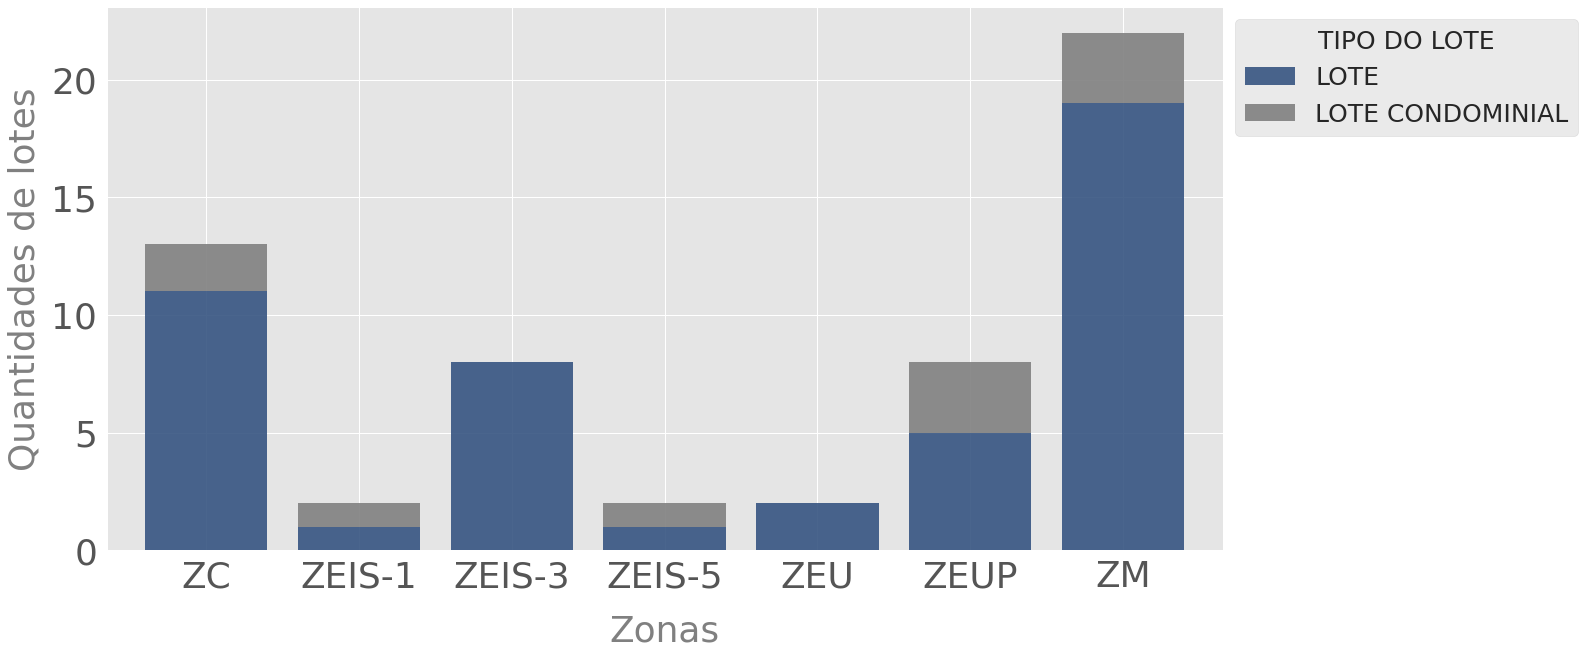

In [438]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
EM = EM_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
EM = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
EM = plt.xticks(rotation= 0 )
EM = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
EM = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES NA SUBPREFEITURA DE ITAIM PAULISTA - IT 

In [439]:
dados.query("SGL_SUBP_E == 'IT'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    75
ZM        14
ZEU        5
ZEUP       4
ZC         3
ZEIS-2     2
Name: SGL_ZONA_0, dtype: int64

In [440]:
IT_Zonas = dados.query("SGL_SUBP_E == 'IT'")

In [441]:
IT_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1731,0,ZC
1739,0,ZC
788,0,ZC
1520,0,ZEIS-1
1499,0,ZEIS-1
...,...,...
1156,0,ZM
1181,0,ZM
316,0,ZM
1225,0,ZM


In [442]:
IT_Zonas["COND"] = IT_Zonas["COND"].astype(int)

In [443]:
IT_Zonas["COND"] = IT_Zonas["COND"].astype(str)

In [444]:
IT_Zonas["COND"]

1731    0
1739    0
788     0
1520    0
1499    0
       ..
1156    0
1181    0
316     0
1225    0
1169    0
Name: COND, Length: 103, dtype: object

In [445]:
IT_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

5    1
6    1
2    1
4    1
1    1
Name: COD_CNDM_Z, dtype: int64

In [446]:
IT_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    75
ZM        14
ZEU        5
ZEUP       4
ZC         3
ZEIS-2     2
Name: SGL_ZONA_0, dtype: int64

In [447]:
IT_Cond_Zonas = IT_Zonas.query("COND != '0'")
IT_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1420,"RUA OSORIO FRANCO VILHENA, 1099, SAO PAULO, SA...",132278151483050000,132,278,151483,5,0,IT,VCR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5075786","-46,4178465",1
1421,"AVENIDA DAMA ENTRE VERDES, 129, SAO PAULO, SAO...",132278754145060000,132,278,754145,6,0,IT,VCR,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5076233","-46,4179081",1
1335,"RUA GRAPIRA, 106, SAO PAULO, SAO PAULO, - BRASIL",112631081906020000,112,631,81906,2,0,IT,VCR,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4960799","-46,4205119",1
1136,"RUA ANTONIO JOAO DE MEDEIROS, 488, SAO PAULO, ...",134464166529040000,134,464,166529,4,0,IT,IPA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5071977","-46,3982931",1
2698,"RUA ANDRE CURSINO DE MATTOS, 68, SAO PAULO, SA...",134274230480010000,134,274,230480,1,0,IT,IPA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,501731","-46,3859878",1


In [448]:
len(IT_Cond_Zonas)

5

In [449]:
IT_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    75
ZM        12
ZEU        4
ZEUP       4
ZC         3
Name: SGL_ZONA_0, dtype: int64

In [450]:
IT_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEIS-2    2
ZM        2
ZEU       1
Name: SGL_ZONA_0, dtype: int64

In [451]:
IT_Sem_Cond_Zonas = IT_Zonas.query("COND == '0'")
IT_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1731,"RUA LARANJA, 7, SAO PAULO, SAO PAULO, - BRASIL",192017710156000460,192,17,710156,0,460,IT,IPA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5119439","-46,3945875",0
1739,"RUA TIBURCIO DE SOUSA, 1114, SAO PAULO, SAO PA...",192017189405000459,192,17,189405,0,459,IT,IPA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,512396","-46,3947194",0


In [452]:
len(IT_Sem_Cond_Zonas)

98

In [453]:
len(IT_Zonas) 

103

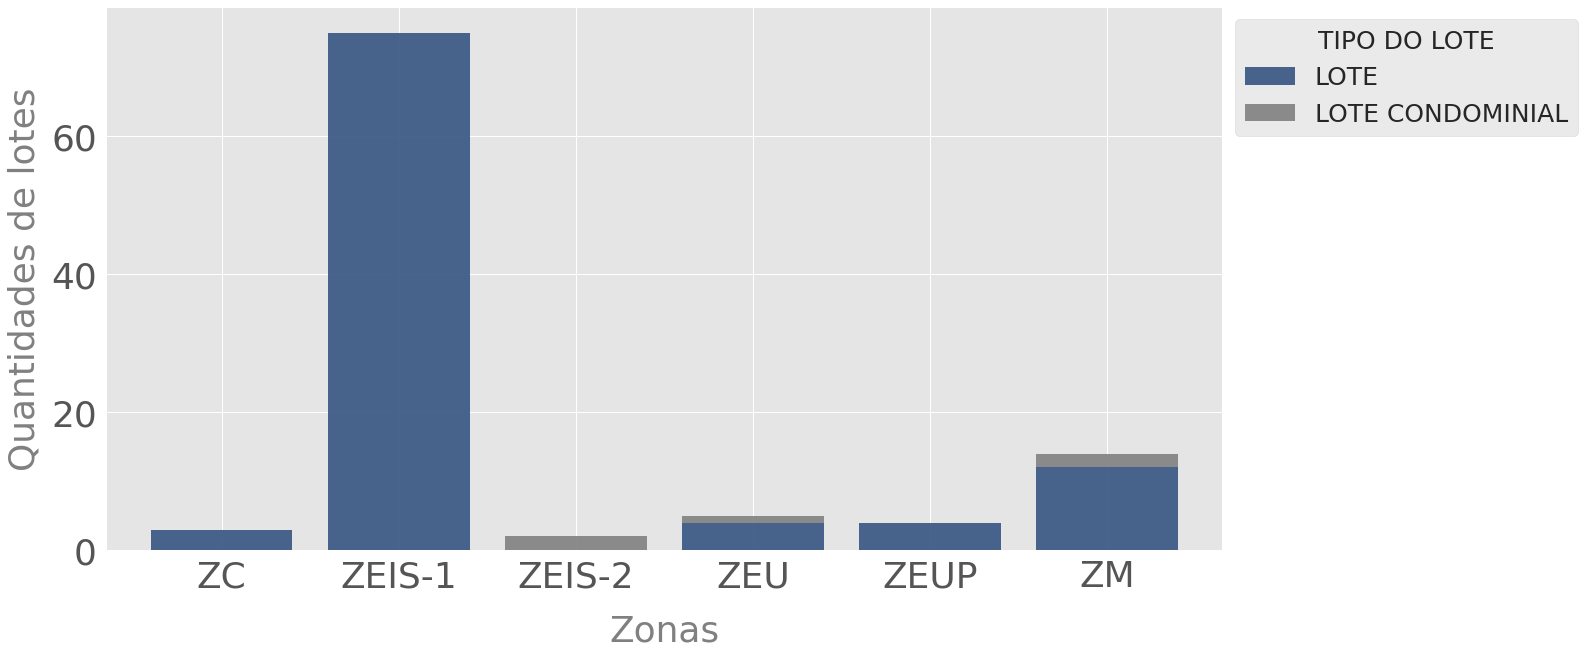

In [454]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
IT = IT_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'],edgecolor='None')
IT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
IT = plt.xticks(rotation= 0 )
IT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
IT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES NA SUBPREFEITURA DE ITAQUERA - IQ 

In [455]:
dados.query("SGL_SUBP_E == 'IQ'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        50
ZPI-1     29
ZC        15
ZEUP      14
ZEIS-1    13
ZEU       12
ZPI-2      7
ZMA        4
ZEPAM      3
ZEIS-5     2
ZCA        1
ZMIS       1
Name: SGL_ZONA_0, dtype: int64

In [456]:
IQ_Zonas = dados.query("SGL_SUBP_E == 'IQ'")

In [457]:
IQ_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1728,0,ZC
1727,0,ZC
1726,0,ZC
1725,0,ZC
1723,1,ZC
...,...,...
921,0,ZPI-2
919,0,ZPI-2
918,0,ZPI-2
923,0,ZPI-2


In [458]:
IQ_Zonas["COND"] = IQ_Zonas["COND"].astype(int)

In [459]:
IQ_Zonas["COND"] = IQ_Zonas["COND"].astype(str)

In [460]:
IQ_Zonas["COND"]

1728    0
1727    0
1726    0
1725    0
1723    1
       ..
921     0
919     0
918     0
923     0
924     0
Name: COND, Length: 151, dtype: object

In [461]:
IQ_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    11
3     5
2     3
4     1
5     1
Name: COD_CNDM_Z, dtype: int64

In [462]:
IQ_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        50
ZPI-1     29
ZC        15
ZEUP      14
ZEIS-1    13
ZEU       12
ZPI-2      7
ZMA        4
ZEPAM      3
ZEIS-5     2
ZCA        1
ZMIS       1
Name: SGL_ZONA_0, dtype: int64

In [463]:
IQ_Cond_Zonas = IQ_Zonas.query("COND != '0'")
IQ_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1723,"RUA CAMBAXIRRA, 227, SAO PAULO, SAO PAULO, - ...",142103082929030000,142,103,82929,3,0,IQ,ITQ,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5338191","-46,4728845",1
1714,"RUA REV ALCIDES FRANCO, 136, SAO PAULO, SAO PA...",114232667226010000,114,232,667226,1,0,IQ,ITQ,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5355324","-46,457917",1
1662,"RUA GASPAR DA SILVA, 129, SAO PAULO, SAO PAULO...",145132666025030000,145,132,666025,3,0,IQ,PQC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5742968","-46,4791303",1
1644,"RUA LUIS ALBERTO LEITE MASCARENHAS, 237, SAO P...",140094220159010000,140,94,220159,1,0,IQ,ITQ,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5180139","-46,4616714",1
1402,"AVENIDA AFONSO DE SAMPAIO E SOUSA, 299, SAO PA...",232041606758030000,232,41,606758,3,0,IQ,PQC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5646324","-46,4661898",1
1405,"AVENIDA AFONSO DE SAMPAIO E SOUSA, 339, SAO PA...",232041606758040000,232,41,606758,4,0,IQ,PQC,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5658271","-46,4665416",1
1339,"AVENIDA JOSE PINHEIRO BORGES, , SAO PAULO, SAO...",143083225550010000,143,83,225550,1,0,IQ,ITQ,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5326001","-46,4505396",1
1264,"RUA IBIPITANGA, 57, SAO PAULO, SAO PAULO, - B...",114394177504030000,114,394,177504,3,0,IQ,ITQ,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5436828","-46,4593409",1
1266,"RUA COSTEIRA, 398, SAO PAULO, SAO PAULO, - BR...",147301351113010000,147,301,351113,1,0,IQ,CLD,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5590962","-46,5113386",1
1253,"PRACA BARRA DO FIGUEIREDO, 531, SAO PAULO, SAO...",138060260657010000,138,60,260657,1,0,IQ,ITQ,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5298111","-46,4354267",1


In [464]:
len(IQ_Cond_Zonas) 

21

In [465]:
IQ_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        39
ZPI-1     29
ZC        13
ZEIS-1    12
ZEUP      12
ZEU       11
ZPI-2      7
ZMA        4
ZEPAM      3
Name: SGL_ZONA_0, dtype: int64

In [466]:
IQ_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM        11
ZC         2
ZEIS-5     2
ZEUP       2
ZCA        1
ZEIS-1     1
ZEU        1
ZMIS       1
Name: SGL_ZONA_0, dtype: int64

In [467]:
IQ_Sem_Cond_Zonas = IQ_Zonas.query("COND == '0'")
IQ_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1728,"RUA NOVA PETROPOLIS, 36, SAO PAULO, SAO PAULO,...",142147095850000072,142,147,95850,0,72,IQ,ITQ,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5359053","-46,4642641",0
1727,"RUA JUCARAL, 75, SAO PAULO, SAO PAULO, - BRASIL",138081306959000073,138,81,306959,0,73,IQ,ITQ,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5330165","-46,4325514",0


In [468]:
len(IQ_Sem_Cond_Zonas)

130

In [469]:
len(IQ_Zonas)

151

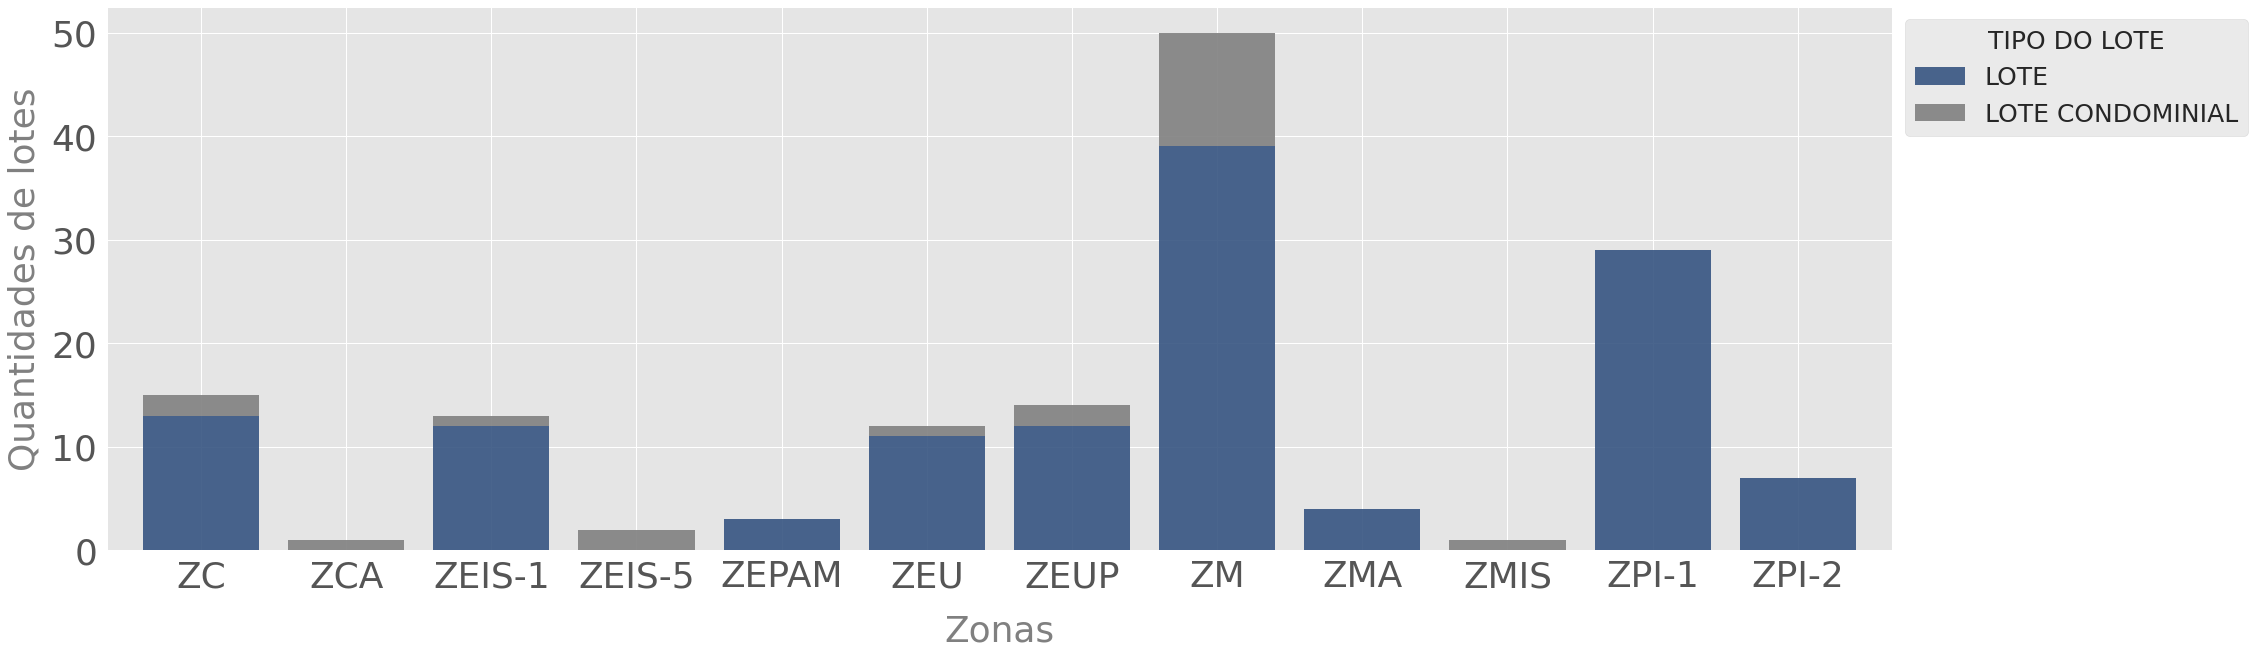

In [470]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
IQ = IQ_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(32, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
IQ = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
IQ = plt.xticks(rotation= 0 )
IQ = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
IQ = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE GUAIANASES - GU 

In [471]:
dados.query("SGL_SUBP_E == 'GU'")["SGL_ZONA_0"].value_counts()

ZM        10
ZEIS-1     7
ZEIS-2     1
Name: SGL_ZONA_0, dtype: int64

In [472]:
GU_Zonas = dados.query("SGL_SUBP_E == 'GU'")

In [473]:
GU_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
758,0,ZEIS-1
444,0,ZEIS-1
50,0,ZEIS-1
1617,0,ZEIS-1
1610,0,ZEIS-1
33,0,ZEIS-1
560,0,ZEIS-1
1422,0,ZEIS-2
1228,0,ZM
1207,0,ZM


In [474]:
GU_Zonas["COND"] = GU_Zonas["COND"].astype(int)

In [475]:
GU_Zonas["COND"] = GU_Zonas["COND"].astype(str)

In [476]:
GU_Zonas["COND"]

758     0
444     0
50      0
1617    0
1610    0
33      0
560     0
1422    0
1228    0
1207    0
1213    0
1235    0
314     0
749     0
1171    0
1190    0
1193    0
1144    0
Name: COND, dtype: object

In [477]:
GU_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

Series([], Name: COD_CNDM_Z, dtype: int64)

In [478]:
GU_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        10
ZEIS-1     7
ZEIS-2     1
Name: SGL_ZONA_0, dtype: int64

In [479]:
GU_Cond_Zonas = GU_Zonas.query("COND != '0'")
GU_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND


In [480]:
len(GU_Cond_Zonas) 

0

In [481]:
GU_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        10
ZEIS-1     7
ZEIS-2     1
Name: SGL_ZONA_0, dtype: int64

In [482]:
GU_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

Series([], Name: SGL_ZONA_0, dtype: int64)

In [483]:
GU_Sem_Cond_Zonas = GU_Zonas.query("COND == '0'")
GU_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
758,"RUA TUPINAMBARANAS, 19, SAO PAULO, SAO PAULO, ...",115310729280000348,115,310,729280,0,348,GU,GUA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5441289","-46,4212286",0
444,"RUA INDIOS GOIAS, 186, SAO PAULO, SAO PAULO, ...",137087175161000050,137,87,175161,0,50,GU,GUA,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5621121","-46,4241712",0


In [484]:
len(GU_Sem_Cond_Zonas)

18

In [485]:
len(GU_Zonas)

18

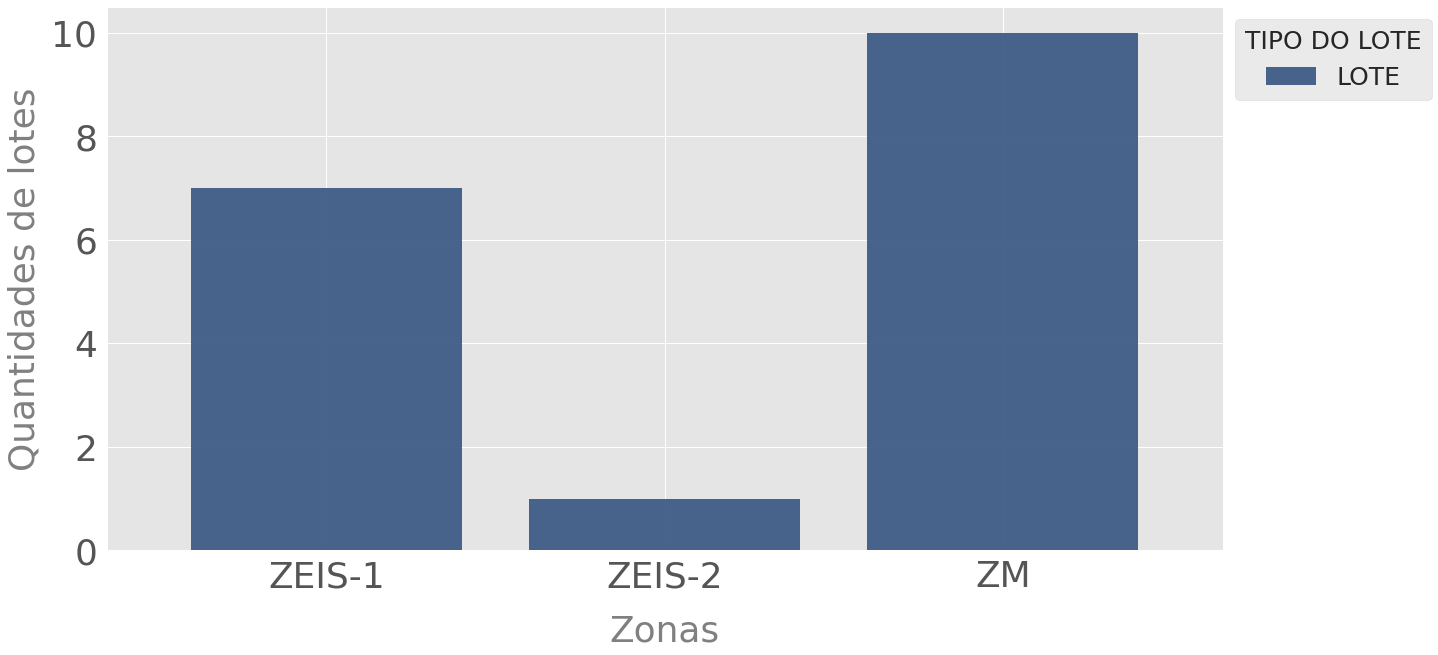

In [486]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
GU = GU_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
GU = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
GU = plt.xticks(rotation= 0 )
GU = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
GU = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE SÃO MATEUS - SM 

In [487]:
dados.query("SGL_SUBP_E == 'SM'")["SGL_ZONA_0"].value_counts()

ZEIS-1    68
ZM        28
ZMA       12
ZC         3
ZEIS-2     2
ZEU        2
ZEUPA      1
Name: SGL_ZONA_0, dtype: int64

In [488]:
SM_Zonas = dados.query("SGL_SUBP_E == 'SM'")

In [489]:
SM_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1738,0,ZC
1729,0,ZC
1720,0,ZC
1589,0,ZEIS-1
1609,0,ZEIS-1
...,...,...
975,0,ZMA
971,0,ZMA
974,0,ZMA
968,0,ZMA


In [490]:
SM_Zonas["COND"] = SM_Zonas["COND"].astype(int)

In [491]:
SM_Zonas["COND"] = SM_Zonas["COND"].astype(str)

In [492]:
SM_Zonas["COND"]

1738    0
1729    0
1720    0
1589    0
1609    0
       ..
975     0
971     0
974     0
968     0
980     0
Name: COND, Length: 116, dtype: object

In [493]:
SM_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    1
3    1
2    1
Name: COD_CNDM_Z, dtype: int64

In [494]:
SM_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    68
ZM        28
ZMA       12
ZC         3
ZEIS-2     2
ZEU        2
ZEUPA      1
Name: SGL_ZONA_0, dtype: int64

In [495]:
SM_Cond_Zonas = SM_Zonas.query("COND != '0'")
SM_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2694,"RUA SOLEDADE DE MINAS, 381, SAO PAULO, SAO PAU...",149016647578010000,149,16,647578,1,0,SM,SMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5806829","-46,4972921",1
1250,"AVENIDA OURO VERDE DE MINAS, 1666, SAO PAULO, ...",149080735078030000,149,80,735078,3,0,SM,SMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5879992","-46,4973972",1
976,"RUA DR PAULO QUEIROZ, 558, SAO PAULO, SAO PAUL...",150018157767020000,150,18,157767,2,0,SM,SMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5872456","-46,4896335",1


In [496]:
len(SM_Cond_Zonas)

3

In [497]:
SM_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1    68
ZM        27
ZMA       11
ZC         3
ZEIS-2     2
ZEU        2
Name: SGL_ZONA_0, dtype: int64

In [498]:
SM_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEUPA    1
ZM       1
ZMA      1
Name: SGL_ZONA_0, dtype: int64

In [499]:
SM_Sem_Cond_Zonas = SM_Zonas.query("COND == '0'")
SM_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1738,"RUA SEN MAYNARDE GOMES, 525, SAO PAULO, SAO PA...",150088137634000062,150,88,137634,0,62,SM,SMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5908617","-46,4906824",0
1729,"RUA SEN MAYNARDE GOMES, 519, SAO PAULO, SAO PA...",150088137634000061,150,88,137634,0,61,SM,SMT,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5907545","-46,4906462",0


In [500]:
len(SM_Sem_Cond_Zonas)

113

In [501]:
len(SM_Zonas)

116

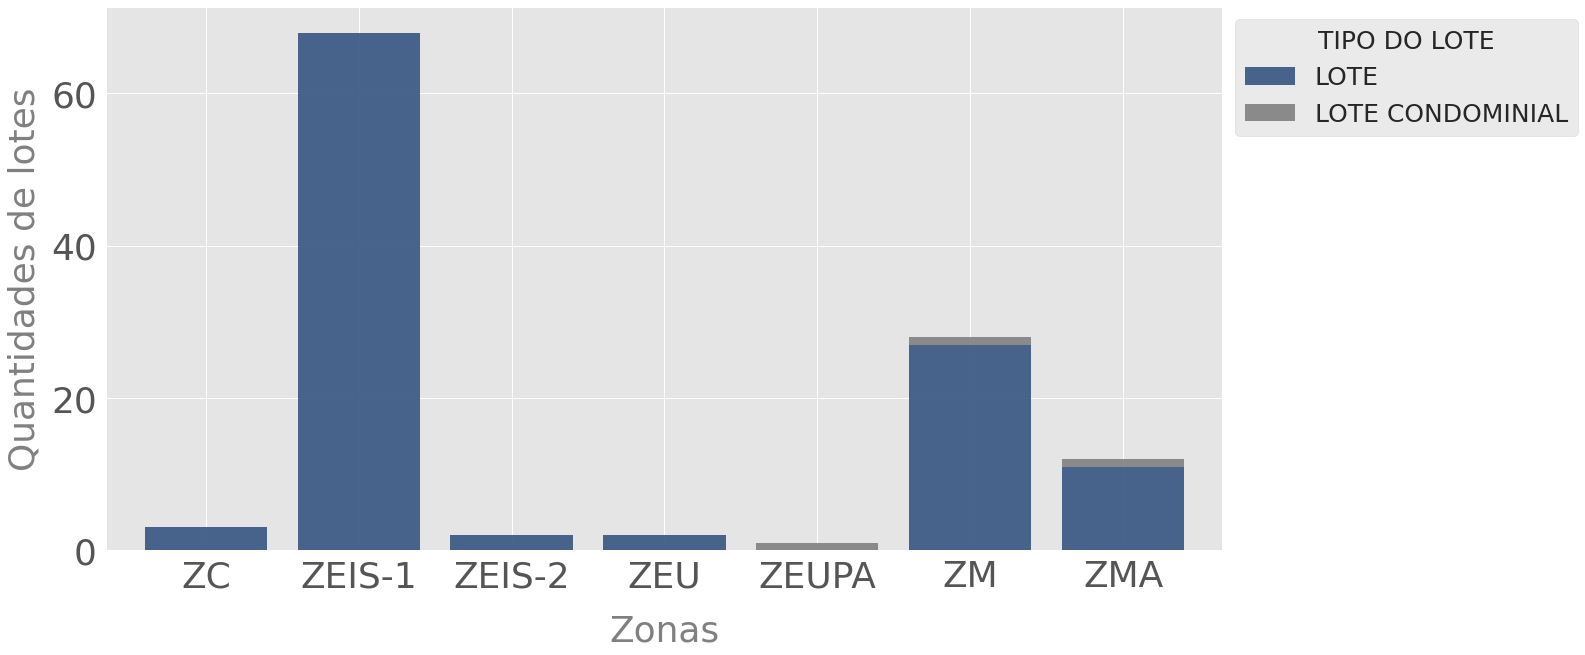

In [502]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SM = SM_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SM = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SM = plt.xticks(rotation= 0 )
SM = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SM = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DA CIDADE TIRADENTES - CT 

In [503]:
dados.query("SGL_SUBP_E == 'CT'")["SGL_ZONA_0"].value_counts()

99        790
ZEIS-1      1
Name: SGL_ZONA_0, dtype: int64

In [504]:
CT_Zonas = dados.query("SGL_SUBP_E == 'CT'")

In [505]:
CT_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1825,0,99
1860,0,99
1859,0,99
1858,0,99
1857,0,99
...,...,...
2204,0,99
1775,0,99
2407,0,99
2316,0,99


In [506]:
CT_Zonas["COND"] = CT_Zonas["COND"].astype(int)

In [507]:
CT_Zonas["COND"] = CT_Zonas["COND"].astype(str)

In [508]:
CT_Zonas["COND"]

1825    0
1860    0
1859    0
1858    0
1857    0
       ..
2204    0
1775    0
2407    0
2316    0
1569    0
Name: COND, Length: 791, dtype: object

In [509]:
CT_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

Series([], Name: COD_CNDM_Z, dtype: int64)

In [510]:
CT_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

99        790
ZEIS-1      1
Name: SGL_ZONA_0, dtype: int64

In [511]:
CT_Cond_Zonas = CT_Zonas.query("COND != '0'")
CT_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND


In [512]:
len(CT_Cond_Zonas)

0

In [513]:
CT_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

99        790
ZEIS-1      1
Name: SGL_ZONA_0, dtype: int64

In [514]:
CT_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

Series([], Name: SGL_ZONA_0, dtype: int64)

In [515]:
CT_Sem_Cond_Zonas = CT_Zonas.query("COND == '0'")
CT_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1825,"RUA JOSE MARTINEZ, 108, SAO PAULO, SAO PAULO, ...",245215456314000016,245,215,456314,0,16,CT,CTI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,601395","-46,3972889",0
1860,"RUA NENO VASCO, 61, SAO PAULO, SAO PAULO, - B...",245205473723000005,245,205,473723,0,5,CT,CTI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5998411","-46,3971485",0


In [516]:
len(CT_Sem_Cond_Zonas)

791

In [517]:
len(CT_Zonas)

791

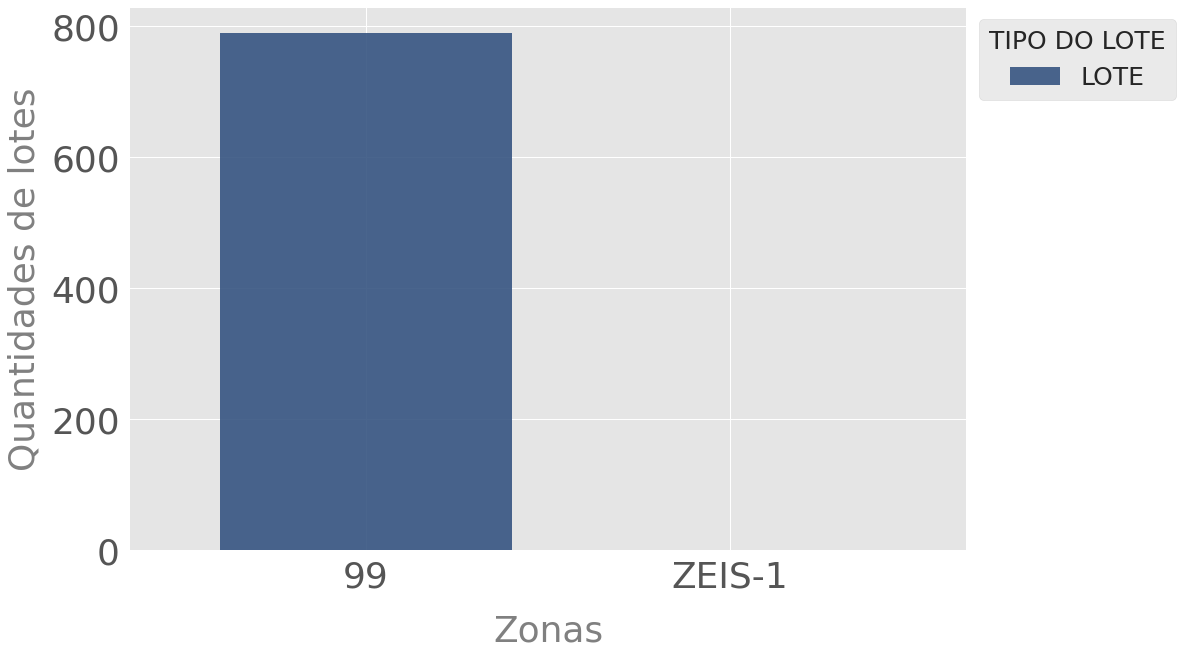

In [518]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
CT = CT_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
CT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
CT = plt.xticks(rotation= 0 )
CT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
CT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE SAPOPEMBA - SB 

In [519]:
dados.query("SGL_SUBP_E == 'SB'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        13
ZEU        6
ZC         2
ZEIS-1     2
ZEIS-2     1
Name: SGL_ZONA_0, dtype: int64

In [520]:
SB_Zonas = dados.query("SGL_SUBP_E == 'SB'")

In [521]:
SB_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
879,0,ZC
779,0,ZC
52,0,ZEIS-1
603,0,ZEIS-1
2626,1,ZEIS-2
485,0,ZEU
871,0,ZEU
846,0,ZEU
394,0,ZEU
803,0,ZEU


In [522]:
SB_Zonas["COND"] = SB_Zonas["COND"].astype(int)

In [523]:
SB_Zonas["COND"] = SB_Zonas["COND"].astype(str)

In [524]:
SB_Zonas["COND"]

879     0
779     0
52      0
603     0
2626    1
485     0
871     0
846     0
394     0
803     0
2630    1
774     0
768     0
593     0
276     0
272     0
277     0
278     0
343     0
391     0
405     0
408     0
274     0
177     0
Name: COND, dtype: object

In [525]:
SB_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts() 

4    1
1    1
Name: COD_CNDM_Z, dtype: int64

In [526]:
SB_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM        13
ZEU        6
ZC         2
ZEIS-1     2
ZEIS-2     1
Name: SGL_ZONA_0, dtype: int64

In [527]:
SB_Cond_Zonas = SB_Zonas.query("COND != '0'")
SB_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
2626,"RUA ROSAS DE MAIO, 130, SAO PAULO, SAO PAULO -...",153110437310040000,153,110,437310,4,0,SB,SAP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,6228438","-46,4993172",1
2630,"RUA MIGUEL EMILIO BERTAGNON, 2, SAO PAULO, SAO...",118136420794010000,118,136,420794,1,0,SB,SLU,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 1,1,2021,"-23,6016013","-46,5266236",1


In [528]:
len(SB_Cond_Zonas) 

2

In [529]:
SB_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZM        13
ZEU        5
ZC         2
ZEIS-1     2
Name: SGL_ZONA_0, dtype: int64

In [530]:
SB_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZEIS-2    1
ZEU       1
Name: SGL_ZONA_0, dtype: int64

In [531]:
SB_Sem_Cond_Zonas = SB_Zonas.query("COND == '0'")
SB_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
879,"AVENIDA DA BARREIRA GRANDE, 1332, SAO PAULO, S...",155299028789000243,155,299,28789,0,243,SB,SAP,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5848825","-46,5225422",0
779,"AVENIDA DA BARREIRA GRANDE, 1344, SAO PAULO, S...",155299028789000242,155,299,28789,0,242,SB,SAP,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5848643","-46,5224579",0


In [532]:
len(SB_Zonas)

24

In [533]:
len(SB_Sem_Cond_Zonas)

22

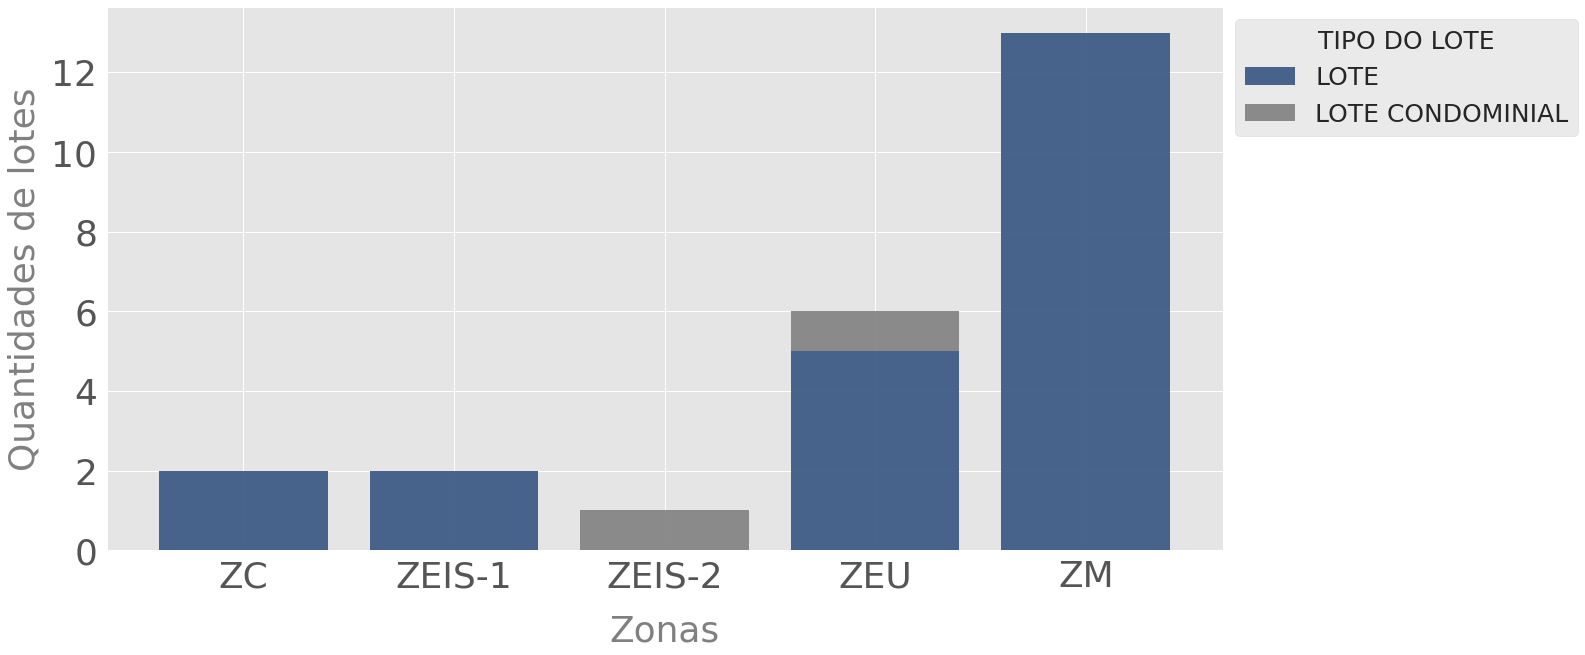

In [534]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SB = SB_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SB = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SB = plt.xticks(rotation= 0 )
SB = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SB = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE SÃO MIGUEL - MP 

In [535]:
dados.query("SGL_SUBP_E == 'MP'")["SGL_ZONA_0"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM         15
ZEIS-1      8
ZC          7
ZMA         7
ZCA         6
ZEUP        2
ZC-ZEIS     1
ZEIS-3      1
ZEU         1
Name: SGL_ZONA_0, dtype: int64

In [536]:
MP_Zonas = dados.query("SGL_SUBP_E == 'MP'")

In [537]:
MP_Zonas[["COND","SGL_ZONA_0"]]

,COND,SGL_ZONA_0
1718,0,ZC
1724,1,ZC
669,0,ZC
896,0,ZC
913,0,ZC
2700,1,ZC
889,0,ZC
1669,0,ZC-ZEIS
1664,0,ZCA
1668,0,ZCA


In [538]:
MP_Zonas["COND"] = MP_Zonas["COND"].astype(int)

In [539]:
MP_Zonas["COND"] = MP_Zonas["COND"].astype(str)

In [540]:
MP_Zonas["COND"]

1718    0
1724    1
669     0
896     0
913     0
2700    1
889     0
1669    0
1664    0
1668    0
1663    0
1666    0
1665    0
1667    0
331     0
333     0
1517    0
1611    0
1526    0
1612    0
1544    0
1637    0
1416    0
1336    0
890     0
888     0
1174    0
2695    1
2696    1
1236    0
1177    0
1141    0
1186    0
1199    1
1200    1
1137    1
1172    0
1183    1
1215    0
1226    1
1251    1
973     0
981     0
983     0
987     0
989     0
970     0
990     1
Name: COND, dtype: object

In [541]:
MP_Zonas.query("COND  != '0'")["COD_CNDM_Z"].value_counts()

1    7
3    2
4    1
2    1
Name: COD_CNDM_Z, dtype: int64

In [542]:
MP_Zonas.query("COD_CNDM_Z != '0'")["SGL_ZONA_0"].value_counts()

ZM         15
ZEIS-1      8
ZC          7
ZMA         7
ZCA         6
ZEUP        2
ZC-ZEIS     1
ZEIS-3      1
ZEU         1
Name: SGL_ZONA_0, dtype: int64

In [543]:
MP_Cond_Zonas = MP_Zonas.query("COND != '0'")
MP_Cond_Zonas

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1724,"RUA PEDRO SOARES DE ANDRADE, 1017, SAO PAULO, ...",139101159964010000,139,101,159964,1,0,MP,SMI,3,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5040369","-46,4353015",1
2700,"RUA CECILIA ITER, 82, SAO PAULO, SAO PAULO - B...",114328046906030000,114,328,46906,3,0,MP,SMI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5229222","-46,4421215",1
2695,"RUA MARECHAL ROSAS, 230, SAO PAULO, SAO PAULO ...",112327173991010000,112,327,173991,1,0,MP,VJA,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4968392","-46,463273",1
2696,"RUA ROSA DO CAMPO, 350, SAO PAULO, SAO PAULO -...",131057729760010000,131,57,729760,1,0,MP,VJA,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5008977","-46,4632248",1
1199,"RUA LAURENTINO XAVIER DOS SANTOS, 551, SAO PAU...",114009116262010000,114,9,116262,1,0,MP,SMI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5207655","-46,43886",1
1200,"RUA SUZANA DE MELO, 484, SAO PAULO, SAO PAULO,...",114009185370040000,114,9,185370,4,0,MP,SMI,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5204643","-46,439267",1
1137,"RUA JOSE FERREIRA CRESPO, 238, SAO PAULO, SAO ...",112513109550010000,112,513,109550,1,0,MP,SMI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4975579","-46,4301457",1
1183,"RUA MONS MARINHO DE OLIVEIRA, 100, SAO PAULO, ...",111235134368010000,111,235,134368,1,0,MP,VJA,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5092004","-46,4655391",1
1226,"RUA LAURENTINO XAVIER DOS SANTOS, 542, SAO PAU...",114009116262030000,114,9,116262,3,0,MP,SMI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,5206986","-46,4388681",1
1251,"RUA LAURENTINO XAVIER DOS SANTOS, 559, SAO PAU...",114009116262020000,114,9,116262,2,0,MP,SMI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,519663","-46,4387829",1


In [544]:
len(MP_Cond_Zonas) 

11

In [545]:
MP_Zonas.query("COND == '0'")["SGL_ZONA_0"].value_counts()

ZEIS-1     8
ZM         7
ZCA        6
ZMA        6
ZC         5
ZEUP       2
ZC-ZEIS    1
ZEIS-3     1
ZEU        1
Name: SGL_ZONA_0, dtype: int64

In [546]:
MP_Zonas.query("COND == '1'")["SGL_ZONA_0"].value_counts()

ZM     8
ZC     2
ZMA    1
Name: SGL_ZONA_0, dtype: int64

In [547]:
MP_Sem_Cond_Zonas = MP_Zonas.query("COND == '0'")
MP_Sem_Cond_Zonas.head(2)

,GEOCODE,ID,COD_SET_ZO,COD_QDR_ZO,COD_LOG_ZO,COD_CNDM_Z,COD_LOTE_Z,SGL_SUBP_E,SGL_DSTR_E,COD_TSTD_Z,...,TXT_OBS_01,NOME_CID_E,NOME_EST_E,NOME_PAIS_,REG_LIM_AD,COD_QUAD,COD_ANO,Lat_Y_,Long_X_,COND
1718,"RUA ALVARO CORREA BORGES, 63, SAO PAULO, SAO P...",112422039292000059,112,422,39292,0,59,MP,SMI,1,...,NaN,SAO PAULO,SAO PAULO,BRASIL,LESTE 2,1,2021,"-23,4962833","-46,4393317",0
669,"RUA TAIUVINHA, 663, SAO PAULO, SAO PAULO, - B...",112465128066000048,112,465,128066,0,48,MP,VJA,2,...,NaN,SAO PAULO,SAO PAULO,BRASIL,NaN,1,2021,"-23,5021816","-46,4553407",0


In [548]:
len(MP_Sem_Cond_Zonas)

37

In [549]:
len(MP_Zonas) 

48

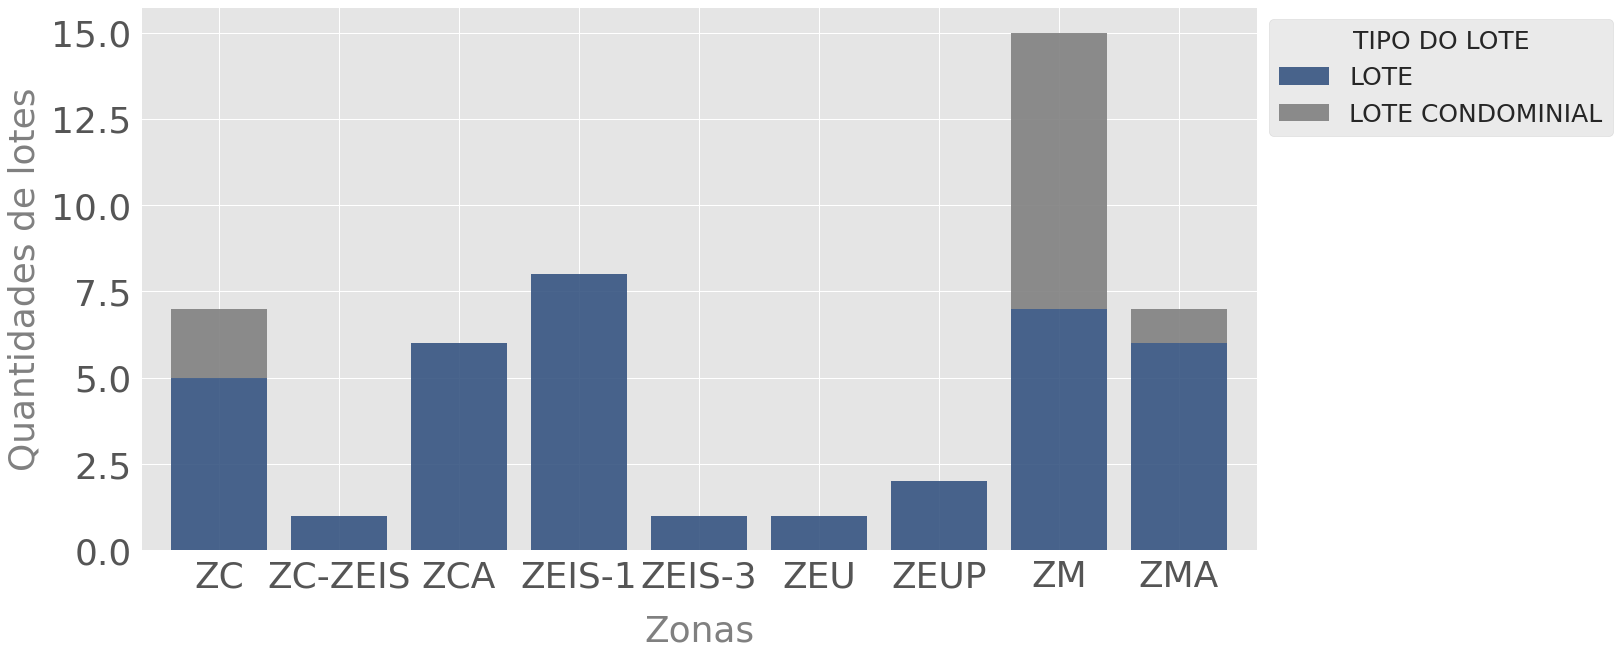

In [550]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MP = MP_Zonas.groupby(['SGL_ZONA_0', 'COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
MP = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MP = plt.xticks(rotation= 0 )
MP = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MP = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)